In [4]:
%reset -f

# Module imports
import seaborn as sns
from pandas import DataFrame, concat, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = 'EEGEyeState_Training.arff.csv'
lag = 0
df = pd.read_csv(path)
df_values = df.values
df_values_count = len(df_values)
df_headers = df.columns
df_header_count = len(df_headers)
print('DF size before outlier removal: ' + str(df_values_count))

DF size before outlier removal: 10000


# Data Representation

### Box Plot EEG Eye State data set representation

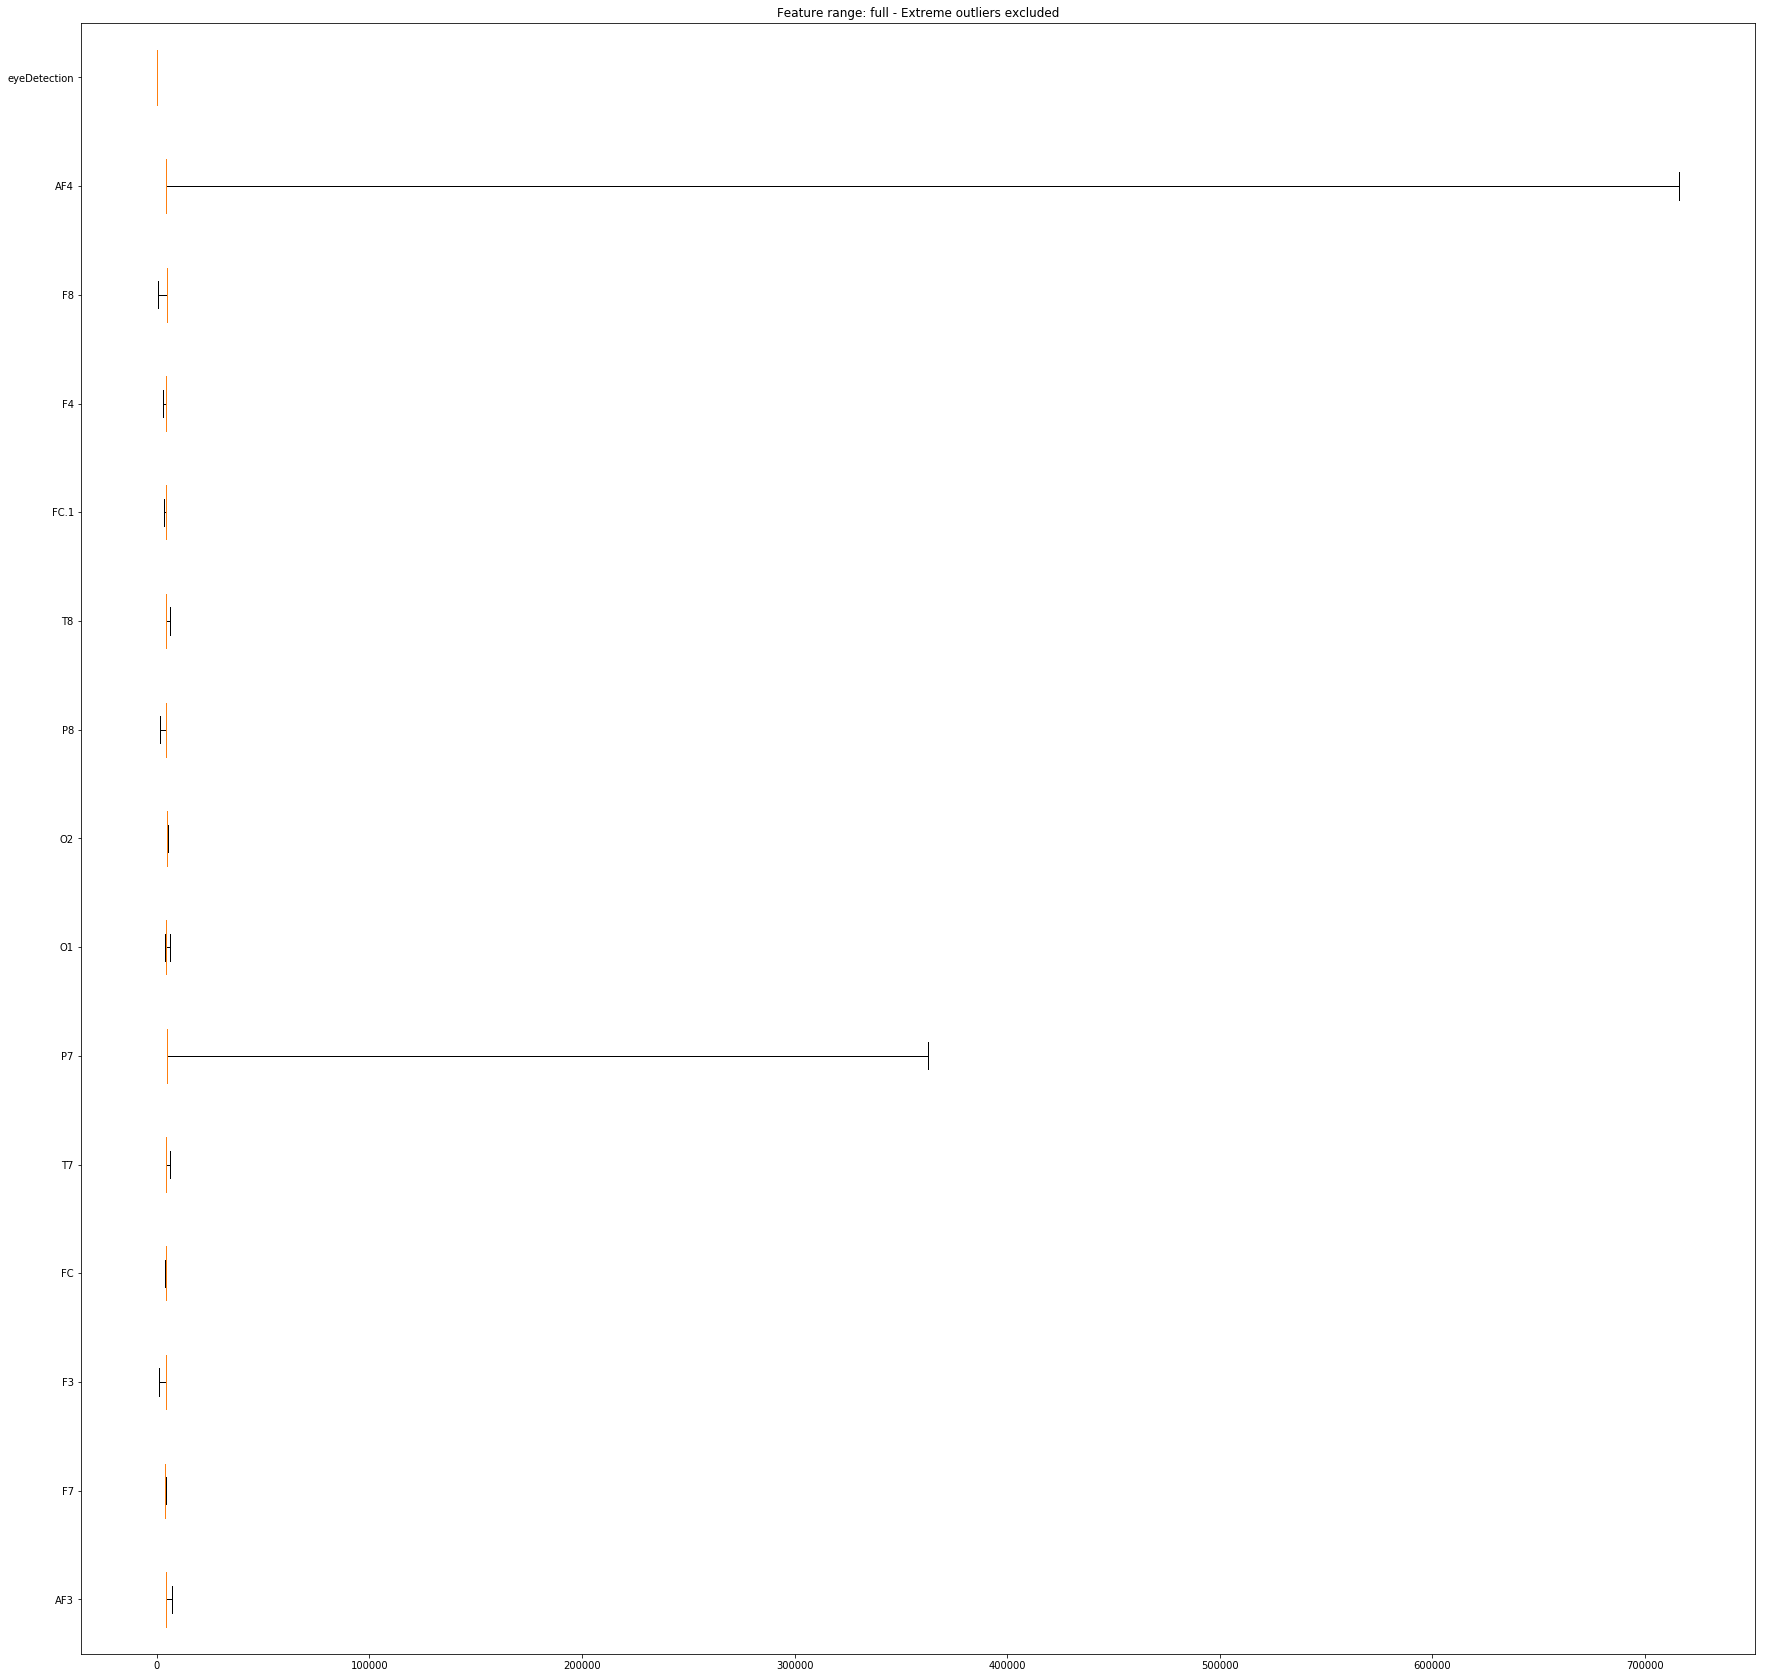

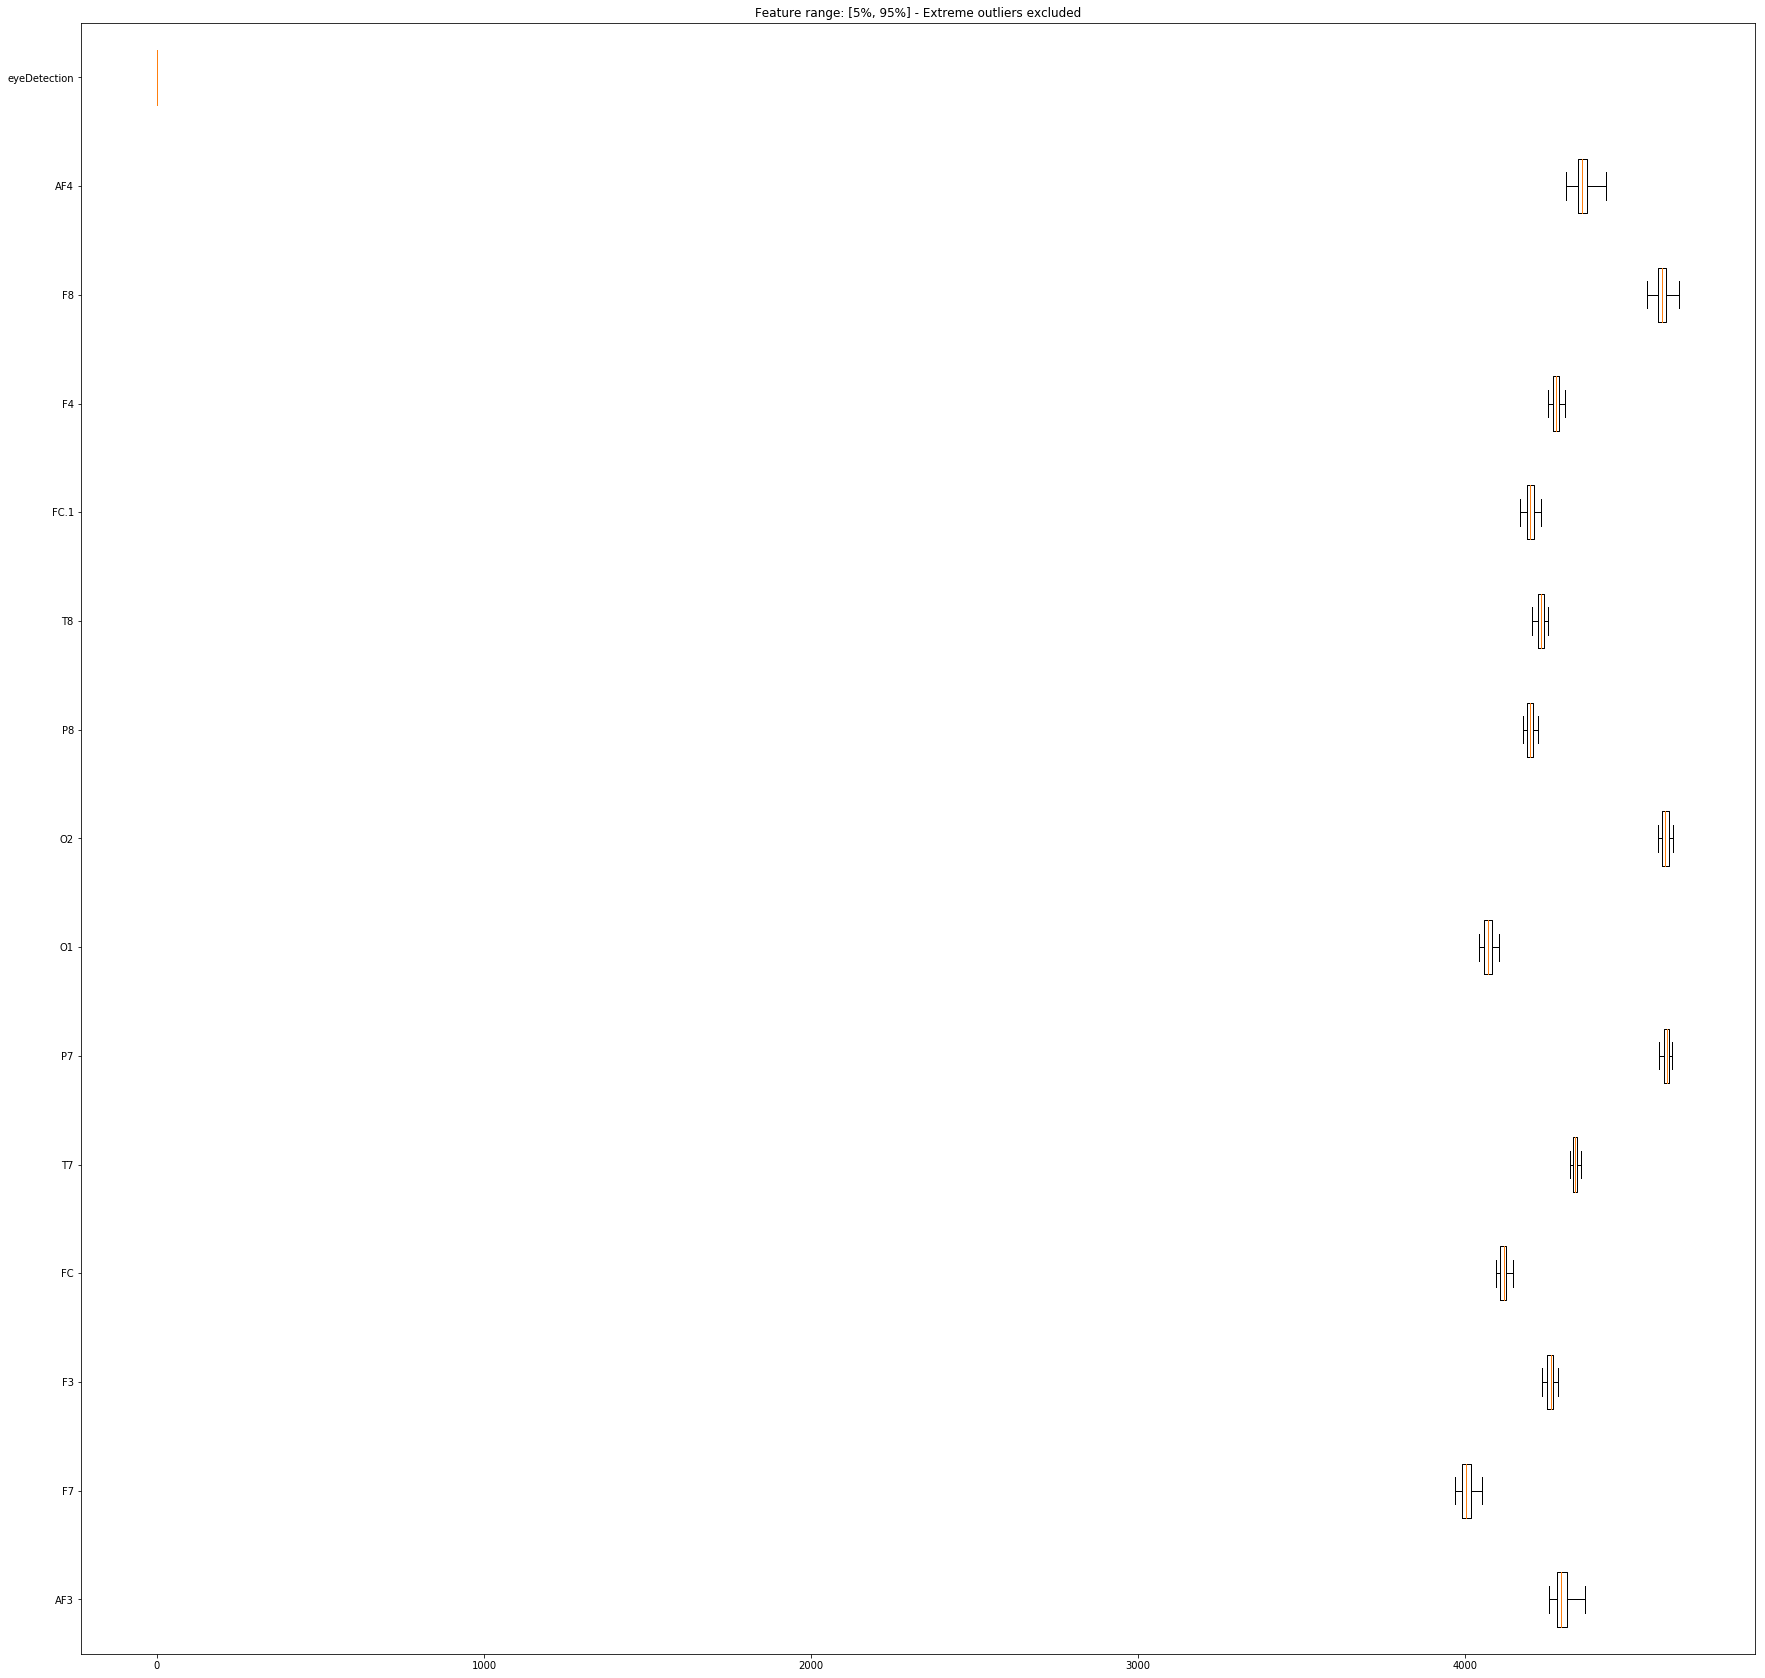

In [6]:
# Plot Box Plots
def plotBoxPlots(data, arrLabels, titleSuffix):
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(30)

    ax1 = fig.add_subplot(1, 1, 1)
    ax1.set_title('Feature range: full - ' + titleSuffix)
    suppress = ax1.boxplot(data
                           , sym='b.'
                           , vert=False
                           , whis='range'
                           , labels=arrLabels
                           , meanline=True
                           , showbox=True
                           , showfliers=True
                           )
    plt.show()
    #
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(30)
    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title('Feature range: [5%, 95%] - ' + titleSuffix)
    suppress = ax2.boxplot(data
                           , sym='b.'
                           , vert=False
                           , whis=[5, 95]
                           , labels=arrLabels
                           , meanline=True
                           , showbox=True
                           , showfliers=False
                           )
    plt.show()
#
# Plotting Box Plots
plotBoxPlots(df_values[:,0:df_header_count], df_headers, 'Extreme outliers excluded')

### Scatter Plot representation of the EEG Eye State data set 

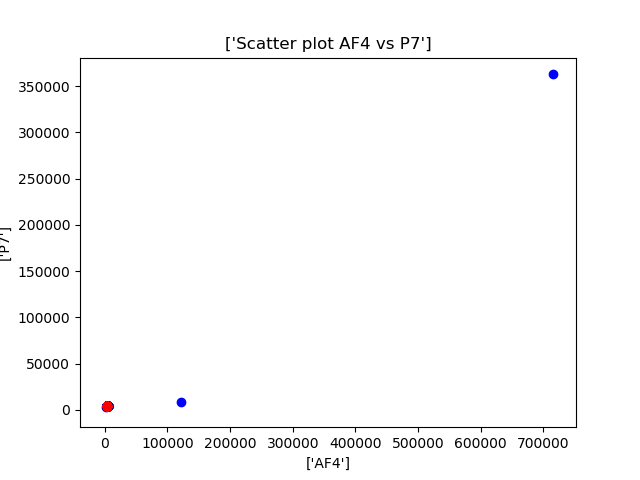

In [7]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['AF4'] vs ['P7'] Raw.png")

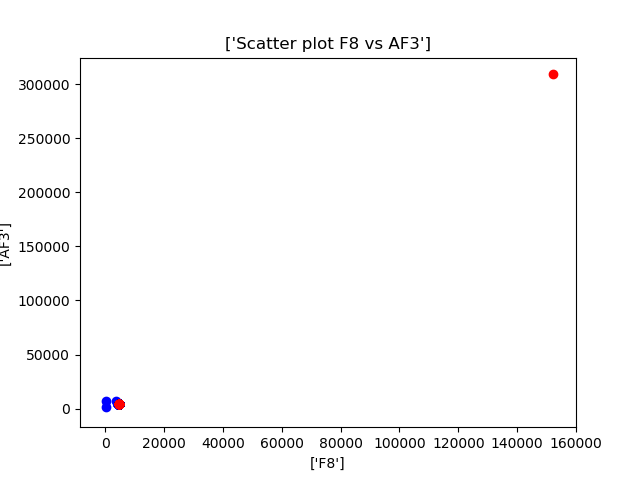

In [8]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['F8'] vs ['AF3'] Raw.png")

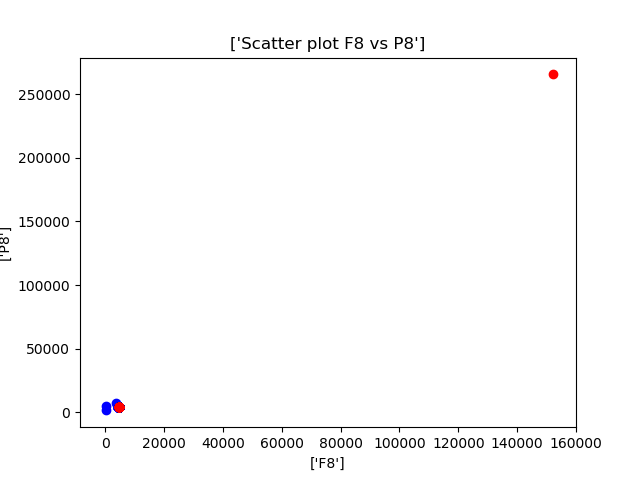

In [9]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['F8'] vs ['P8'] Raw.png")

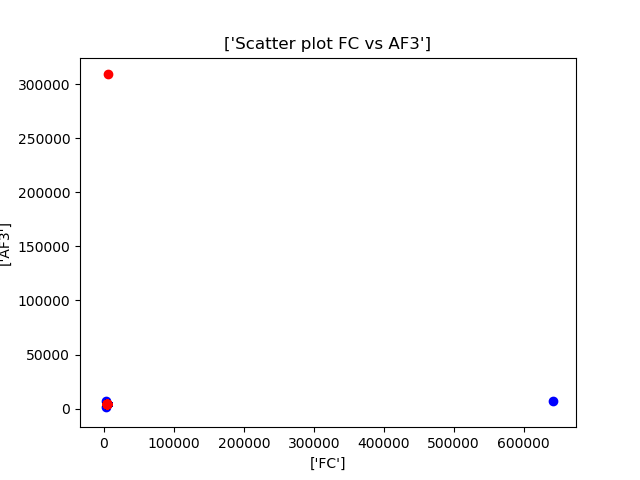

In [10]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['FC'] vs ['AF3'] Raw.png")

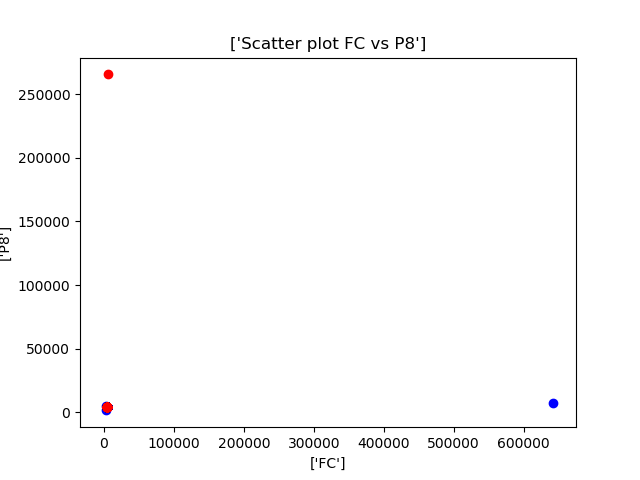

In [11]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['FC'] vs ['P8'] Raw.png")

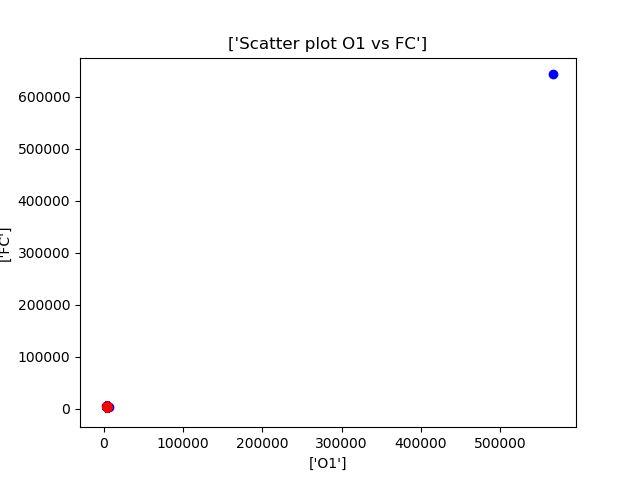

In [12]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['O1'] vs ['FC'] Raw.png")

# Data Representation

### Box Plots EEG Eye State data set excluding outliers

In [13]:
# Removing outliers
def get_outlier_indexes(df, df_col_count, outlier_value=5000):
    """ Takes a dataframe and returns the position of any outliers """
    outLierIndexes = set()
    upperLimit = outlier_value
    for x in range(df_col_count):
        df = np.array(df)
        outLiers = np.where(df[:, x] > upperLimit)[0]
        if len(outLiers) > 0:
            [(outLierIndexes.add(outLiers[i])) for i in range(len(outLiers))]
    #
    outLierIndexes = list(outLierIndexes)
    outLierIndexes.sort()
    return outLierIndexes
#
outlier_indexes = get_outlier_indexes(df_values, df_header_count)
print('Extreme outliers\nTotal:   ', len(outlier_indexes), \
    '\nIndexes: ', outlier_indexes)
# [(print(DataFrame(df).iloc[[outlier]])) for outlier in outlier_indexes]
df_values_pruned = np.delete(df_values, outlier_indexes, 0)
df_values_pruned_count = len(df_values_pruned)
df_pruned = pd.DataFrame(data=df_values_pruned, columns=df_headers)
#
print('DF size after outlier removal: ' + str(df_values_pruned_count))

('Extreme outliers\nTotal:   ', 1, '\nIndexes: ', [898])
DF size after outlier removal: 9999


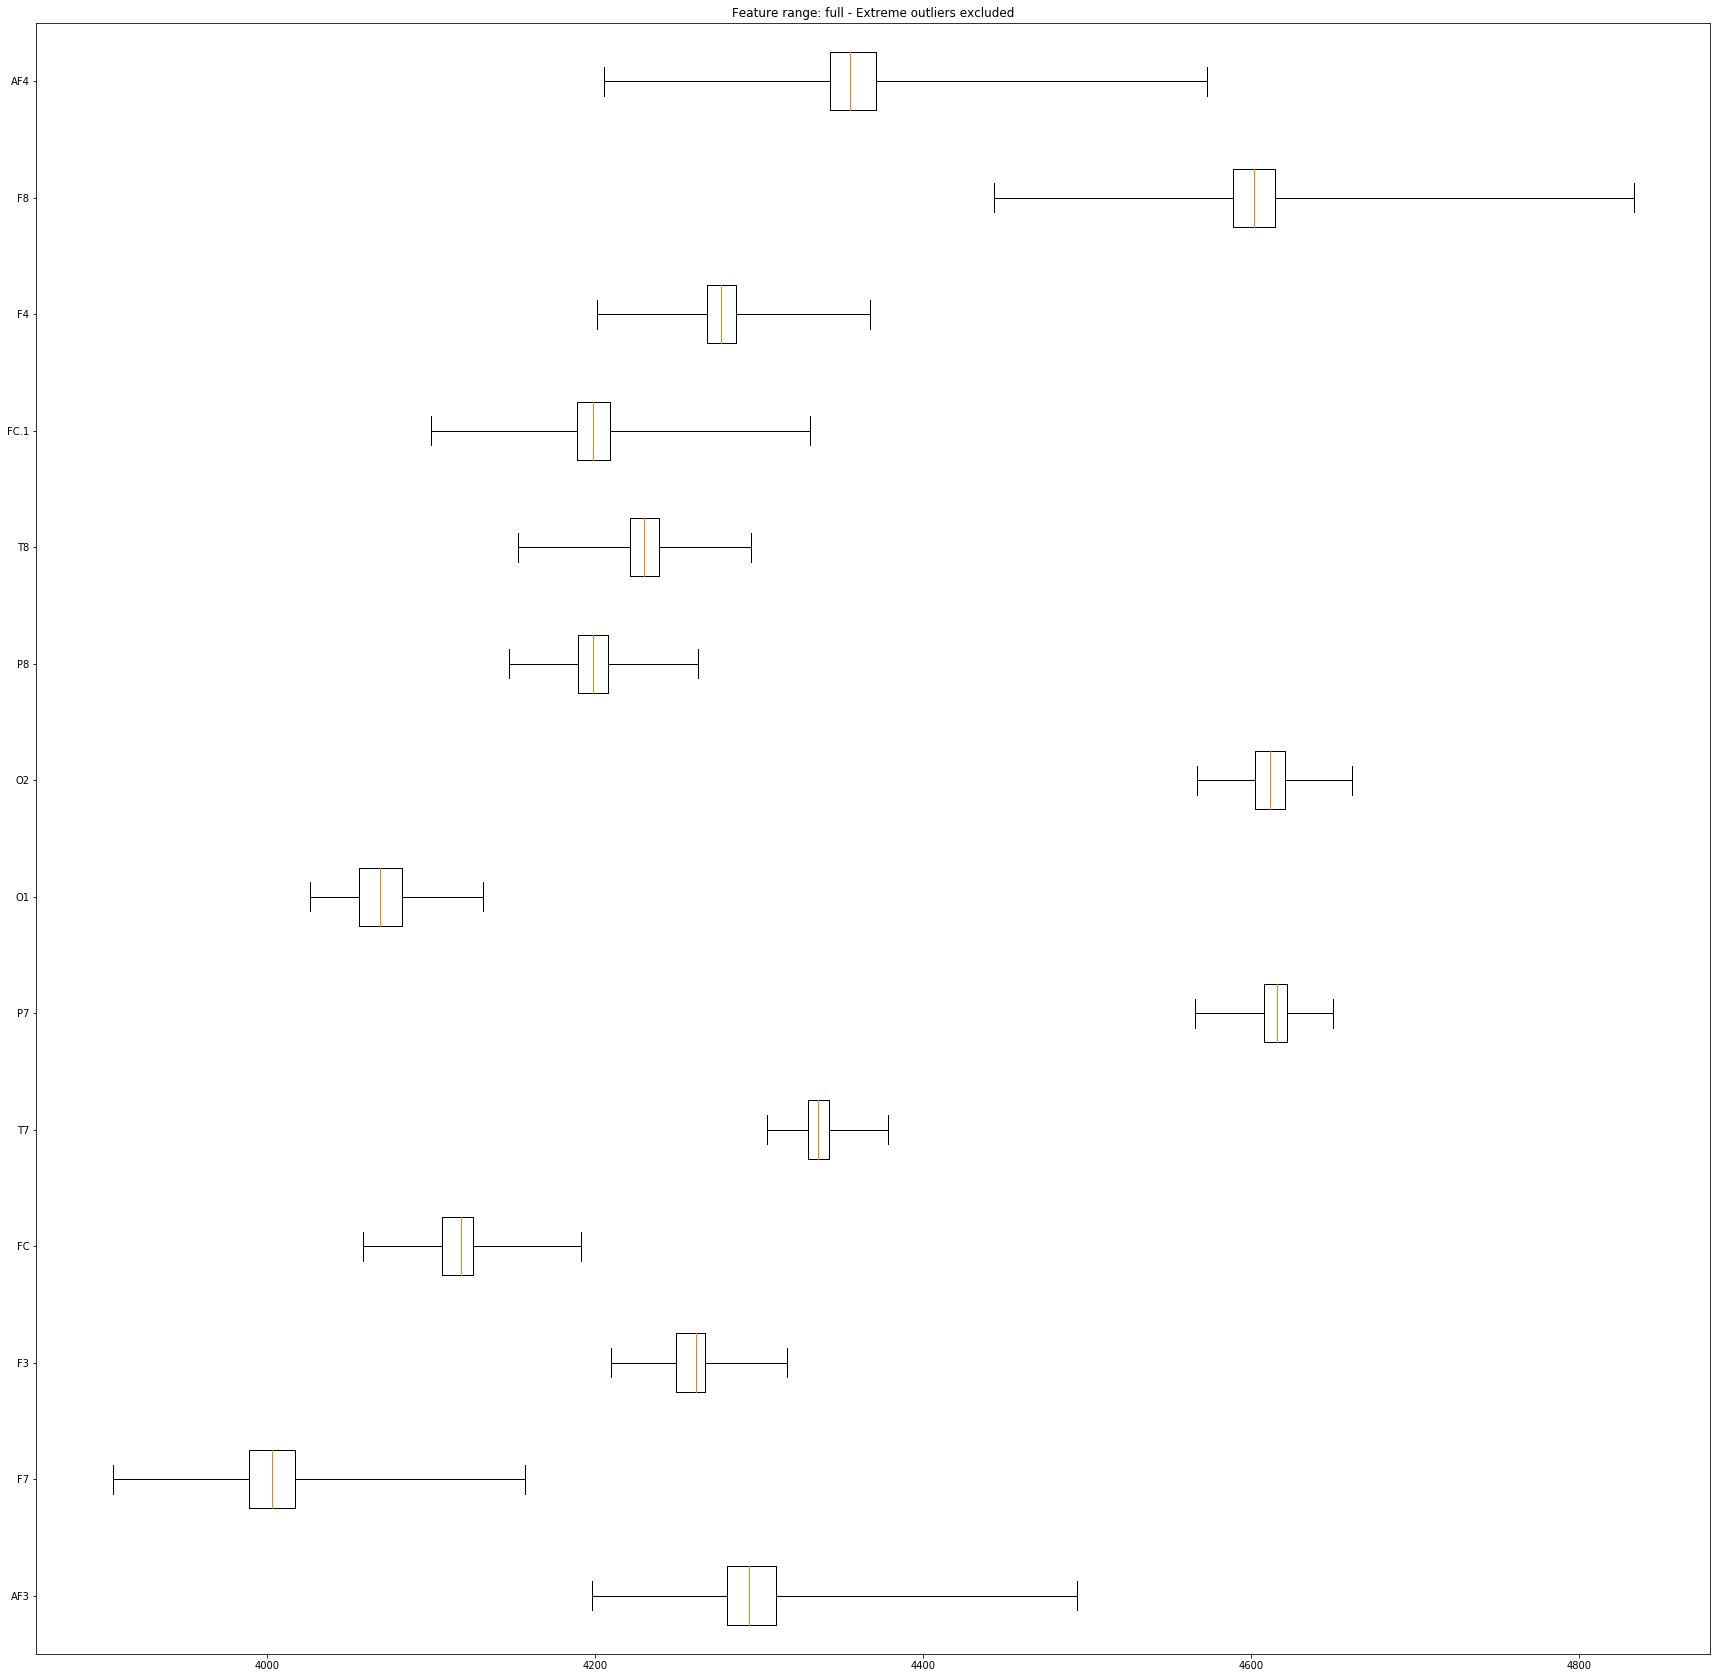

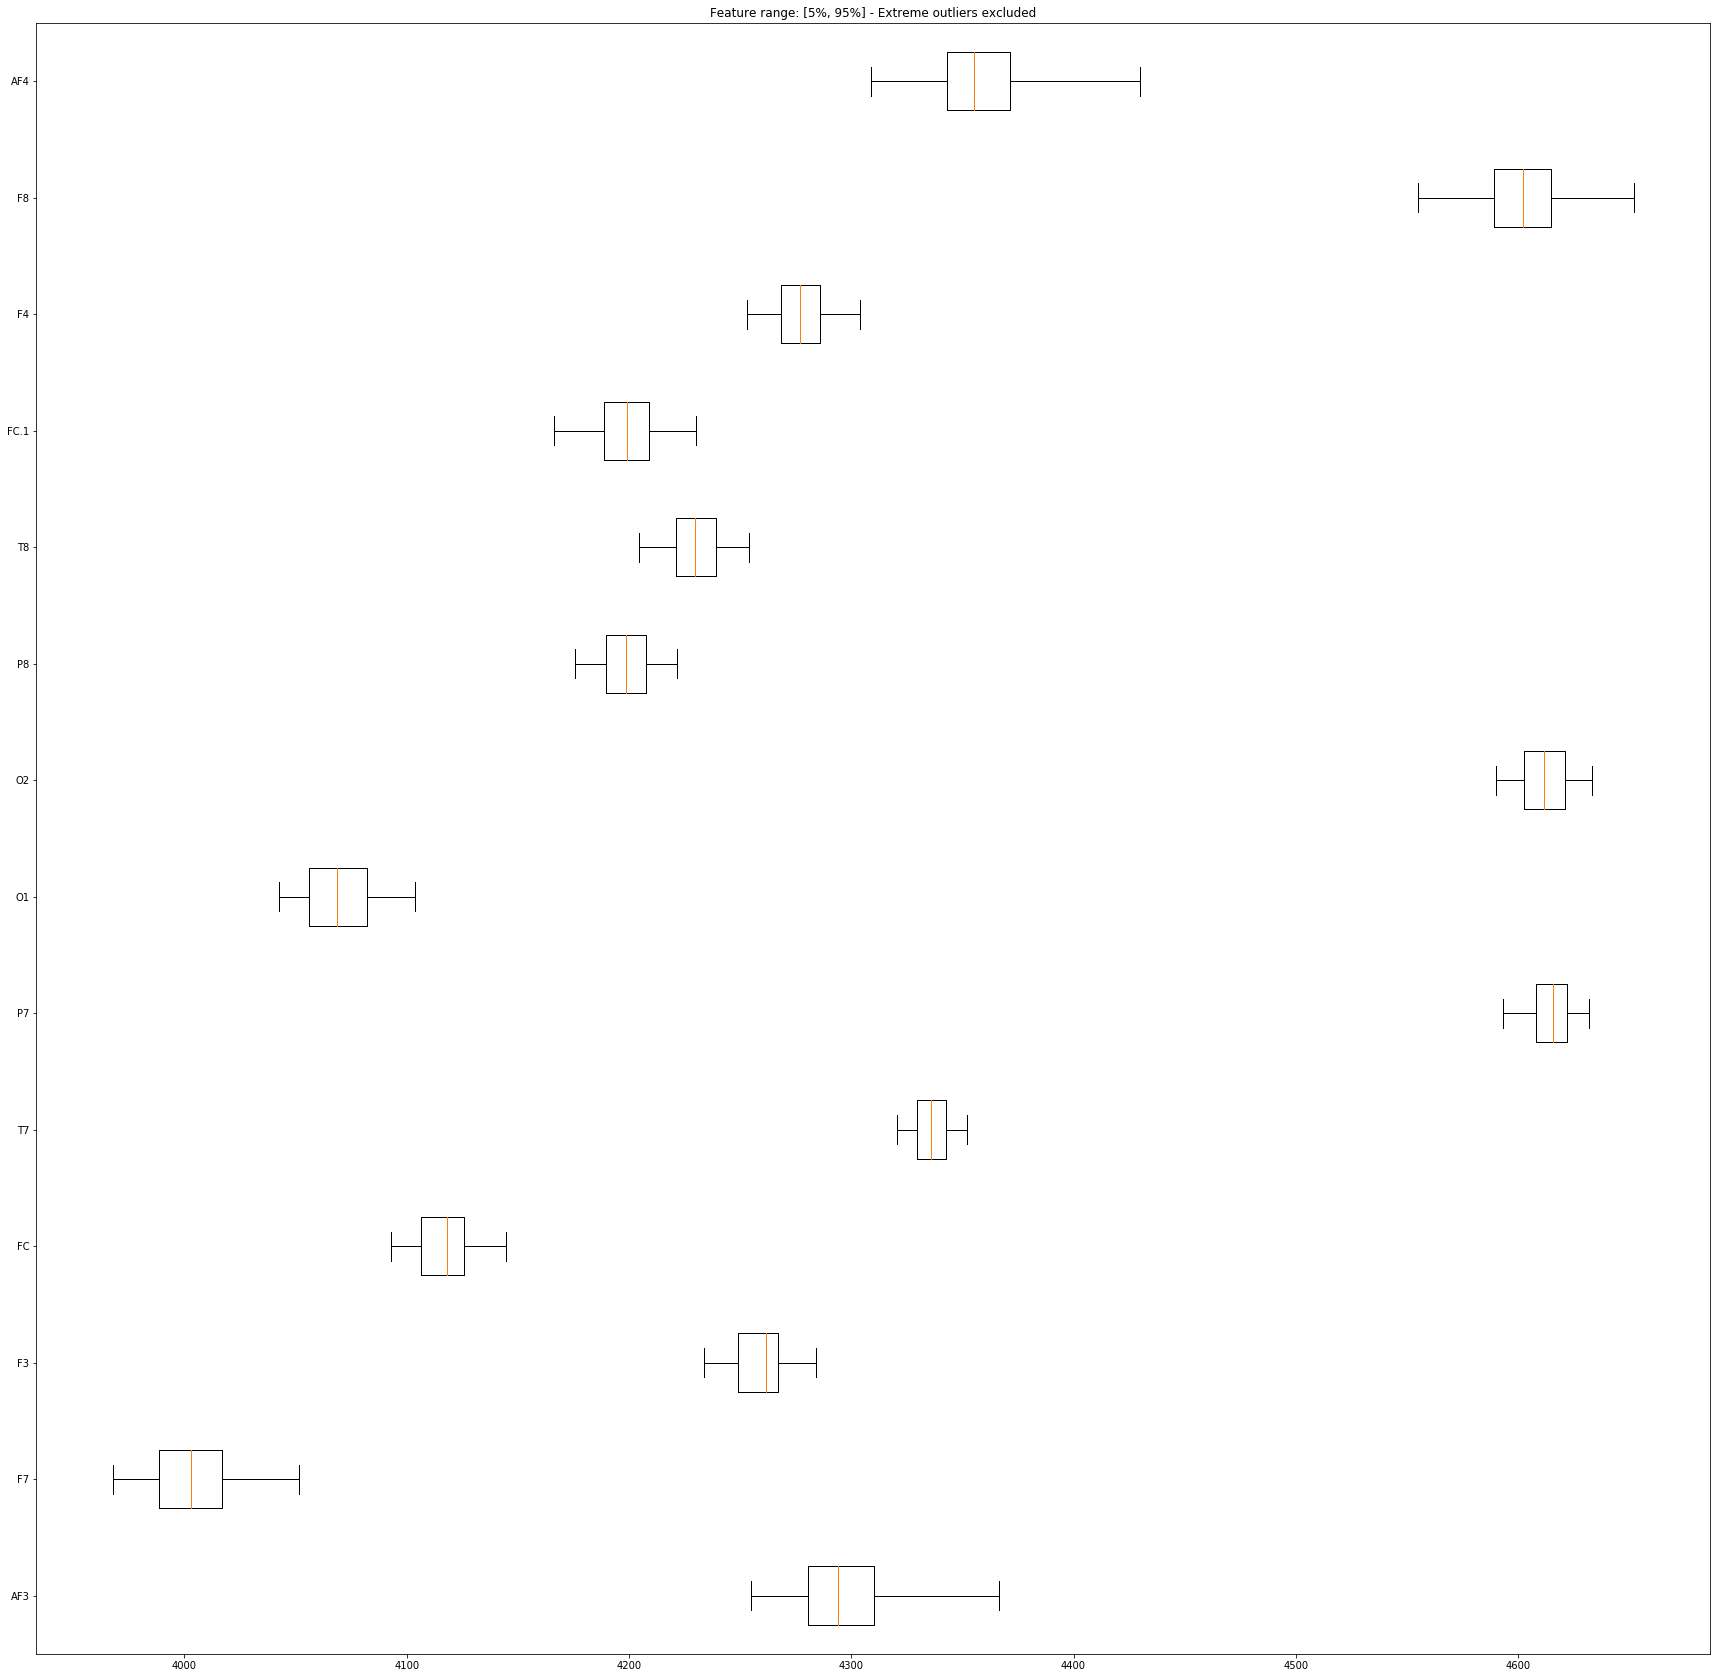

In [14]:
# Plot Box Plots
def plotBoxPlots(data, arrLabels, titleSuffix):
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(30)

    ax1 = fig.add_subplot(1, 1, 1)
    ax1.set_title('Feature range: full - ' + titleSuffix)
    suppress = ax1.boxplot(data
                           , sym='b.'
                           , vert=False
                           , whis='range'
                           , labels=arrLabels
                           , meanline=True
                           , showbox=True
                           , showfliers=True
                           )
    plt.show()
    #
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(30)
    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title('Feature range: [5%, 95%] - ' + titleSuffix)
    suppress = ax2.boxplot(data
                           , sym='b.'
                           , vert=False
                           , whis=[5, 95]
                           , labels=arrLabels
                           , meanline=True
                           , showbox=True
                           , showfliers=False
                           )
    plt.show()
#
# Plotting Box Plots
eegDataNoOutLiers_y = df_pruned['eyeDetection']
eegDataNoOutLiers_X = df_pruned.drop('eyeDetection', 1)
plotBoxPlots(eegDataNoOutLiers_X.values[:,0:len(eegDataNoOutLiers_X.columns)], eegDataNoOutLiers_X.columns, 'Extreme outliers excluded')

### Scatter Plot representation of the EEG Eye State data set (excluding outliers)

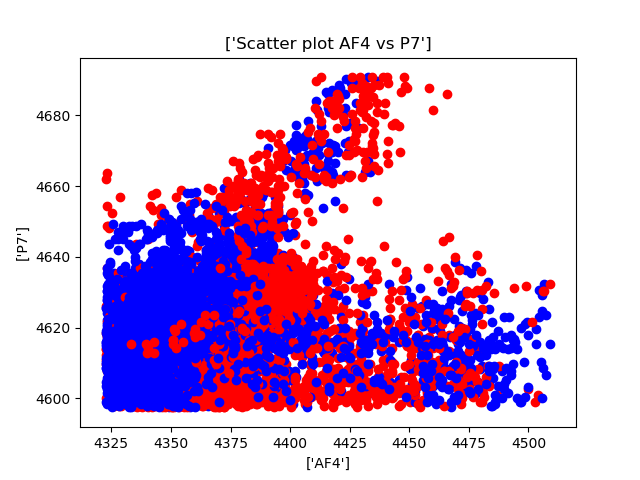

In [15]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['AF4'] vs ['P7'].png")

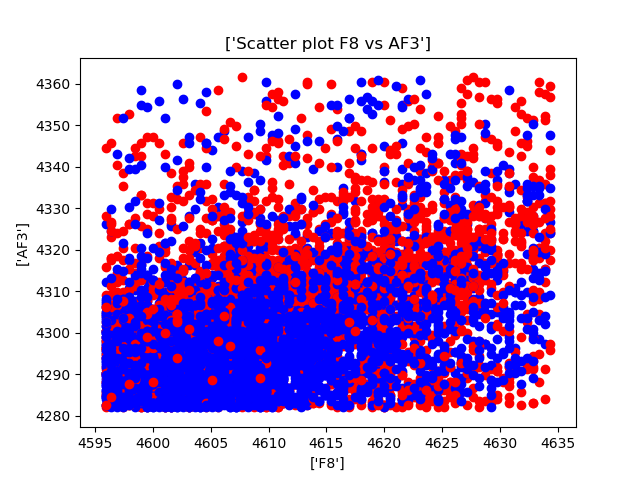

In [16]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['F8'] vs ['AF3'].png")

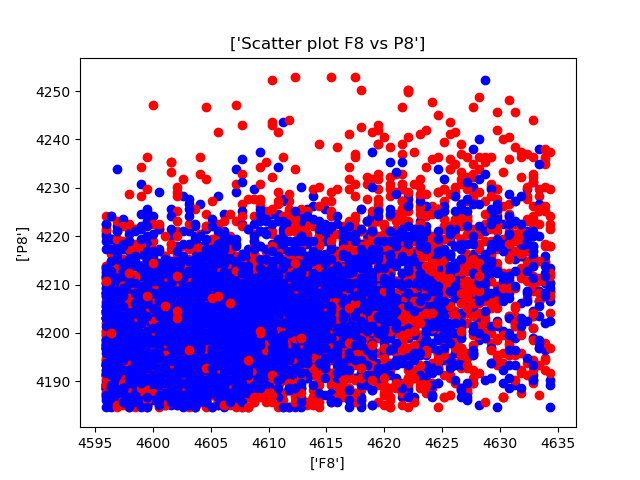

In [17]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['F8'] vs ['P8'].png")

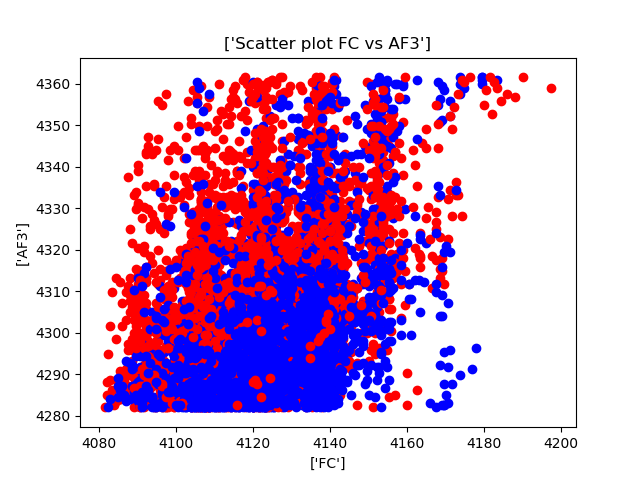

In [18]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['FC'] vs ['AF3'].png")

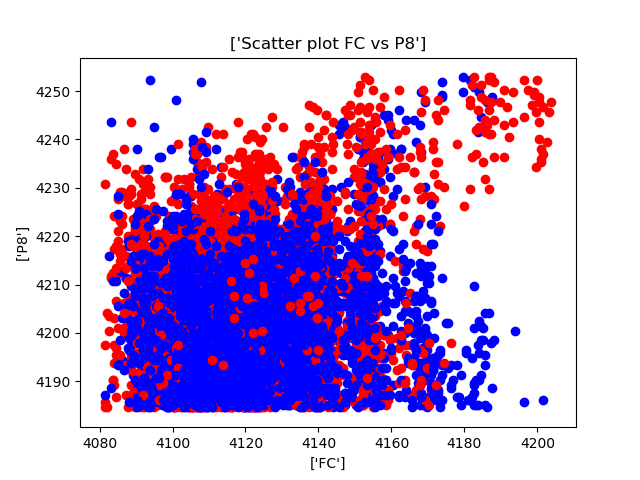

In [19]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['FC'] vs ['P8'].png")

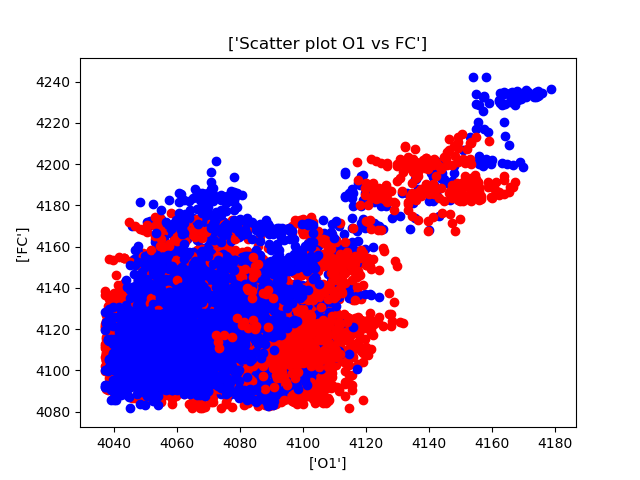

In [20]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['O1'] vs ['FC'].png")

# Time Series Analysis

### EEG Eye State data set time shifting (lag set to 0)

In [21]:
# Applying lag to timeseries data set, by shifting degree of n
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
#
# N-Step Univariate Forecasting Shift
df_pruned_shifted = series_to_supervised(data=df_pruned, n_in=lag, n_out=1, dropnan=True)
#
# Removing any lag variables of var15(t-lag) (label)
if lag > 0:
    for i in range(1,lag+1):
        df_pruned_shifted = df_pruned_shifted.drop('var15(t-' + str(i) + ')', 1)
df_pruned_shifted_headers = df_pruned_shifted.columns
df_pruned_shifted_header_count = len(df_pruned_shifted_headers)
print(df_pruned_shifted_headers)

Index([u'var1(t)', u'var2(t)', u'var3(t)', u'var4(t)', u'var5(t)', u'var6(t)',
       u'var7(t)', u'var8(t)', u'var9(t)', u'var10(t)', u'var11(t)',
       u'var12(t)', u'var13(t)', u'var14(t)', u'var15(t)'],
      dtype='object')


### Line plots of feature readings over time (117 seconds)

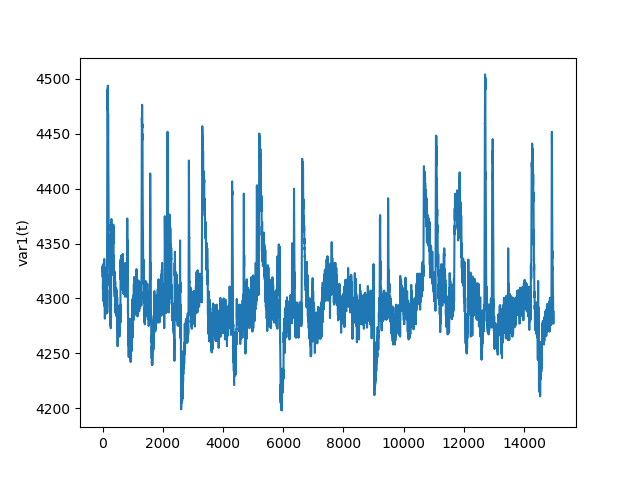

In [22]:
# AF3 line graph
Image(filename="Images/AF3.png")

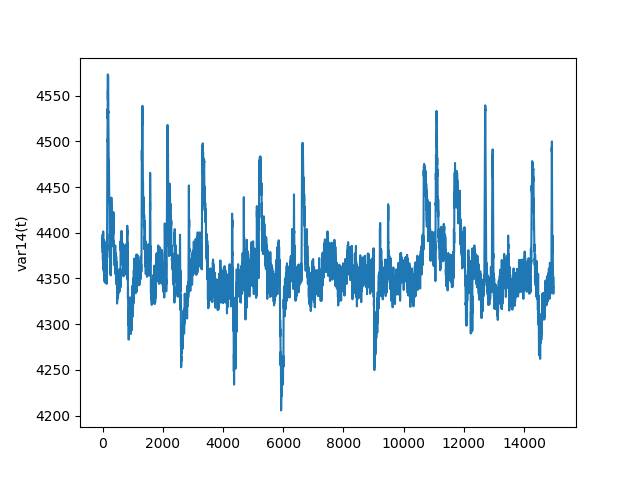

In [23]:
# AF4 line graph
Image(filename="Images/AF4.png")

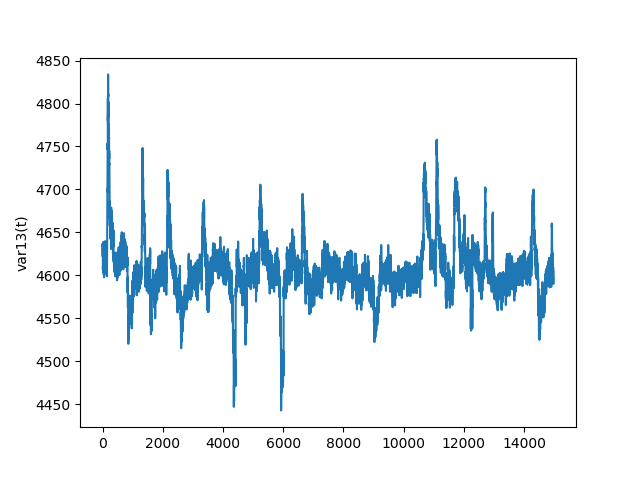

In [24]:
# F8 line graph
Image(filename="Images/F8.png")

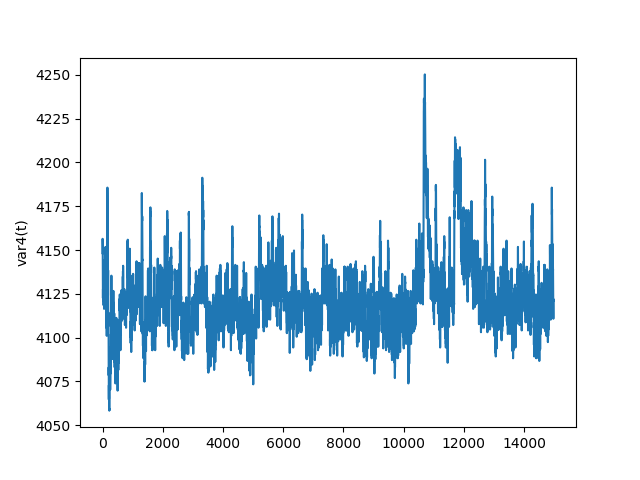

In [25]:
# FC line graph
Image(filename="Images/FC.png")

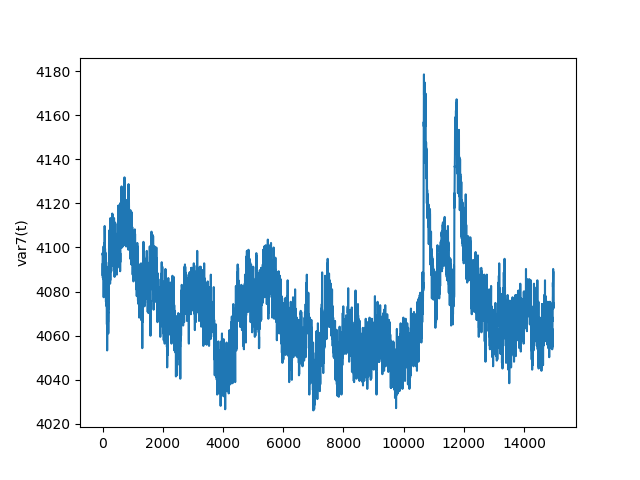

In [26]:
# O1 line graph
Image(filename="Images/O1.png")

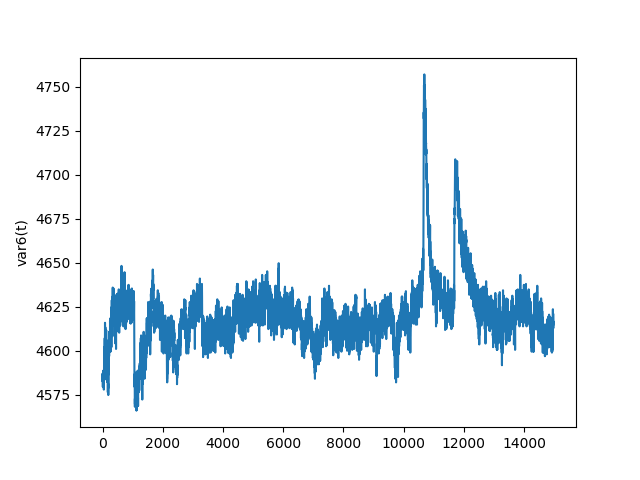

In [27]:
# P7 line graph
Image(filename="Images/P7.png")

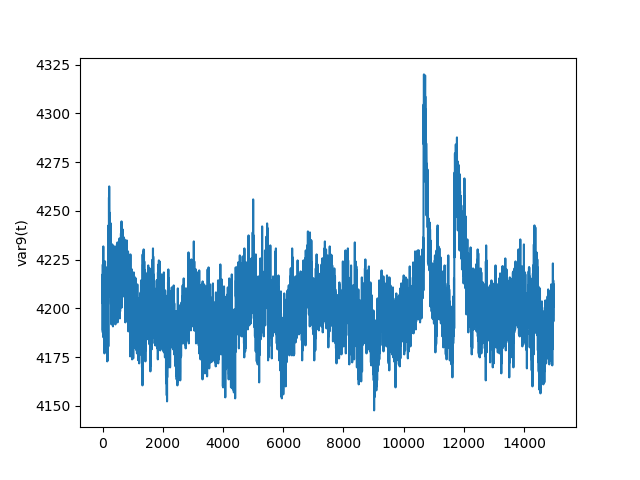

In [28]:
# P8 line graph
Image(filename="Images/P8.png")

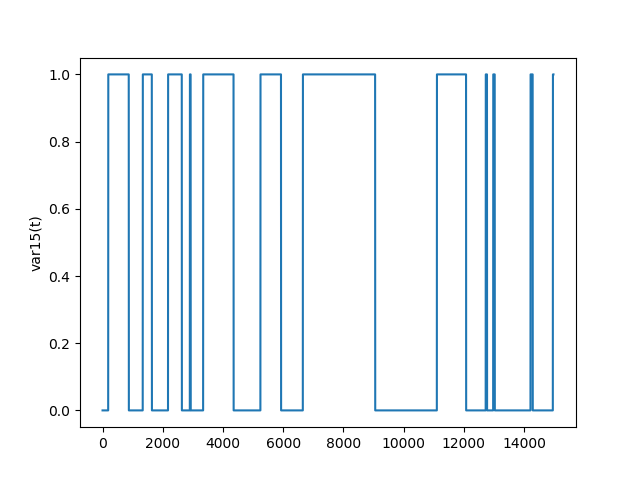

In [29]:
# eyeDetection line graph
Image(filename="Images/eyeDetection.png")

# Feature Selection - Filter Methods

###  Pearson Correlation Matrix

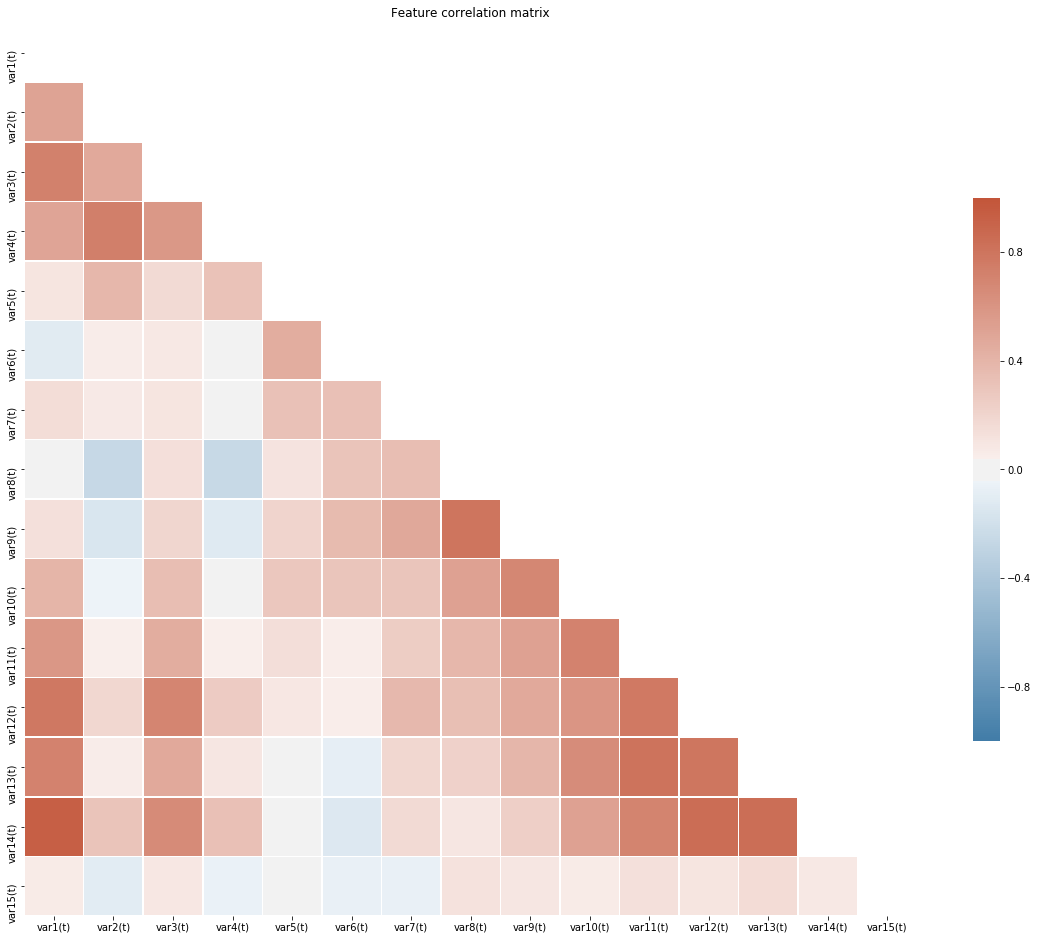

In [30]:
# Plot Pearson's Correlation Matrix for shifted_df
eegDF = pd.DataFrame(data=df_pruned_shifted, columns=df_pruned_shifted_headers)
#
# Compute the correlation matrix
corr = eegDF.corr()
#
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#
# Set up the matplotlib figure
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
#
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Feature correlation matrix")
#
# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 20, as_cmap=True)
#
# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#
# Store the upper triangle of the correlation matrix into an Excel sheet
corrUpperTri = corr.where(mask)
writer = pd.ExcelWriter('EEG_Shifted_Correlation_Matrix.xlsx')
corrUpperTri.to_excel(writer, 'CorrelationMatrix')
writer.save()

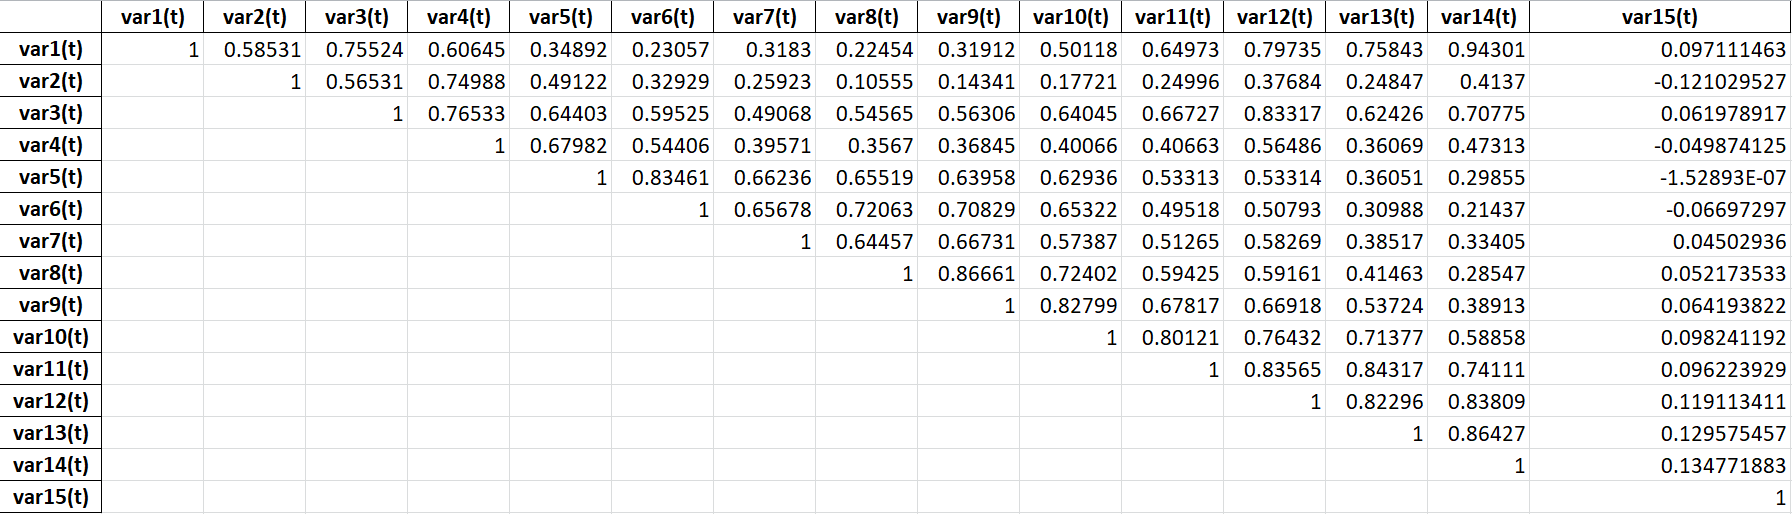

In [31]:
# Pearson's Correlation Matrix
Image(filename="Images/Correlation Matrix Excluding Outliers.png")

### Auto Correlation Plot for time series analysis

/usr/local/lib/python2.7/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[ 4009.23  4004.62  4006.67 ...,  4009.23  4003.59  3997.95]


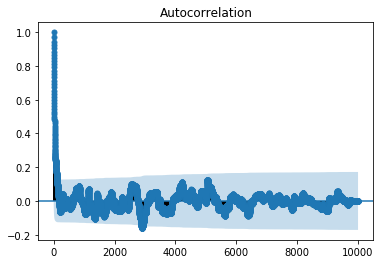

In [32]:
#
# Autocorrelation Plot
series = Series.from_csv(path, header=0)
print(series.values)
from statsmodels.graphics.tsaplots import plot_acf
if lag == 0:
    lag = None
plot_acf(series, lags=lag)
plt.show()

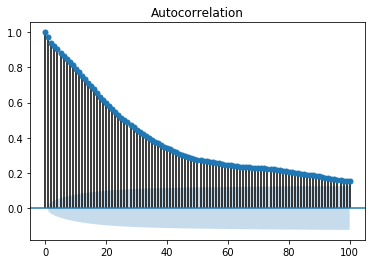

In [33]:
# Limited to lag 100
plot_acf(series, lags=100)
plt.show()

### Filter Methods (Mutual Information Scoring)

In [34]:
from sklearn.metrics import mutual_info_score
import operator
mi_scores = {}
for column in df_pruned_shifted_headers:
    if column != 'var15(t)':
        mi_scores[column] = mutual_info_score(df_pruned_shifted[column], df_pruned_shifted['var15(t)'])
print('Mutual Information: ')
print(sorted(mi_scores.items(), key=operator.itemgetter(1), reverse=True))

Mutual Information: 
[('var1(t)', 0.068001631969438509), ('var14(t)', 0.061312983255733783), ('var6(t)', 0.056815681032305346), ('var13(t)', 0.056309625332207881), ('var7(t)', 0.04282873920644046), ('var11(t)', 0.040537269025248061), ('var2(t)', 0.03461132683140055), ('var12(t)', 0.0283772790896249), ('var9(t)', 0.02320555796089771), ('var3(t)', 0.020713608072078921), ('var4(t)', 0.02026262824227585), ('var10(t)', 0.020162418824560796), ('var8(t)', 0.019820144087840025), ('var5(t)', 0.0086360493779071828)]


### Data normalization, and cross validation splits of 80/20%

In [35]:
#
# Cross-validating of dataset: Splitting dataset into sub samples for training and validation purposes
from sklearn.model_selection import train_test_split
df_pruned_shifted_Y = df_pruned_shifted['var15(t)']
df_pruned_shifted_X = df_pruned_shifted.drop('var15(t)', 1)
#
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X, df_pruned_shifted_Y, test_size=0.2, random_state=0)
#
# L2 Normalization
from sklearn.preprocessing import normalize
# X_train = normalize(X_train, norm='l2')
# X_test = normalize(X_test, norm='l2')
#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#
print(X_train)
print(X_test)

[[ 0.34689722  0.35379033  0.49766748 ...,  0.46873857  0.41442686
   0.44240104]
 [ 0.35576724  0.40287913  0.46893077 ...,  0.4968312   0.44784796
   0.42531414]
 [ 0.36284255  0.32723213  0.48805747 ...,  0.52809263  0.38635001
   0.47369005]
 ..., 
 [ 0.38938359  0.43151095  0.34456055 ...,  0.4749543   0.42378581
   0.46373194]
 [ 0.27963001  0.25768633  0.49281582 ...,  0.33747715  0.39036471
   0.38123769]
 [ 0.26903431  0.35175659  0.37805561 ...,  0.46246191  0.37031727
   0.33713351]]
[[ 0.32393834  0.32851215  0.3585779  ...,  0.38980698  0.41364982
   0.40324241]
 [ 0.17607882  0.40082994  0.32824503 ...,  0.29494976  0.24651693
   0.22579631]
 [ 0.41020976  0.43181177  0.49497735 ...,  0.45425701  0.38719752
   0.47801224]
 ..., 
 [ 0.28171238  0.30163974  0.46464448 ...,  0.2779614   0.33288069
   0.36655801]
 [ 0.18840331  0.31199388  0.22729959 ...,  0.31868059  0.30778632
   0.28446846]
 [ 0.55281678  0.4648886   0.5757337  ...,  0.5152697   0.48885147
   0.60705095]]


# Feature Selection - Wrapper Methods

### Random Forest Feature Importance Ranking

In [33]:
#
# Feature importance ranked using RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
df_pruned_shifted_Y = df_pruned_shifted['var15(t)']
df_pruned_shifted_X = df_pruned_shifted.drop('var15(t)', 1)
#
rf.fit(df_pruned_shifted_X, df_pruned_shifted_Y)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = df_pruned_shifted_X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
print('Random Forest Classification For Feature Selection: ')
print(feature_importances)
#
# Plot the feature importance of the forest
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.title("RandomForest Feature importance")
objects = list(feature_importances.axes[0])
y_pos = np.arange(len(objects))
feature_importance = np.array(feature_importances)
plt.bar(y_pos, feature_importance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

Random Forest Classification For Feature Selection: 
          importance
var6(t)     0.112511
var7(t)     0.100417
var2(t)     0.094903
var13(t)    0.088314
var1(t)     0.079704
var14(t)    0.076010
var4(t)     0.069245
var11(t)    0.067911
var12(t)    0.061874
var3(t)     0.056911
var5(t)     0.052163
var10(t)    0.051266
var8(t)     0.050217
var9(t)     0.038553


TypeError: only length-1 arrays can be converted to Python scalars

### Gradient Boosting Feature Importance Ranking

          importance
feature             
var6(t)     0.138812
var2(t)     0.137319
var13(t)    0.125576
var7(t)     0.102618
var14(t)    0.074886
var4(t)     0.071142
var12(t)    0.060371
var1(t)     0.056389
var5(t)     0.053045
var3(t)     0.047553
var10(t)    0.045104
var11(t)    0.043450
var8(t)     0.037160
var9(t)     0.006573


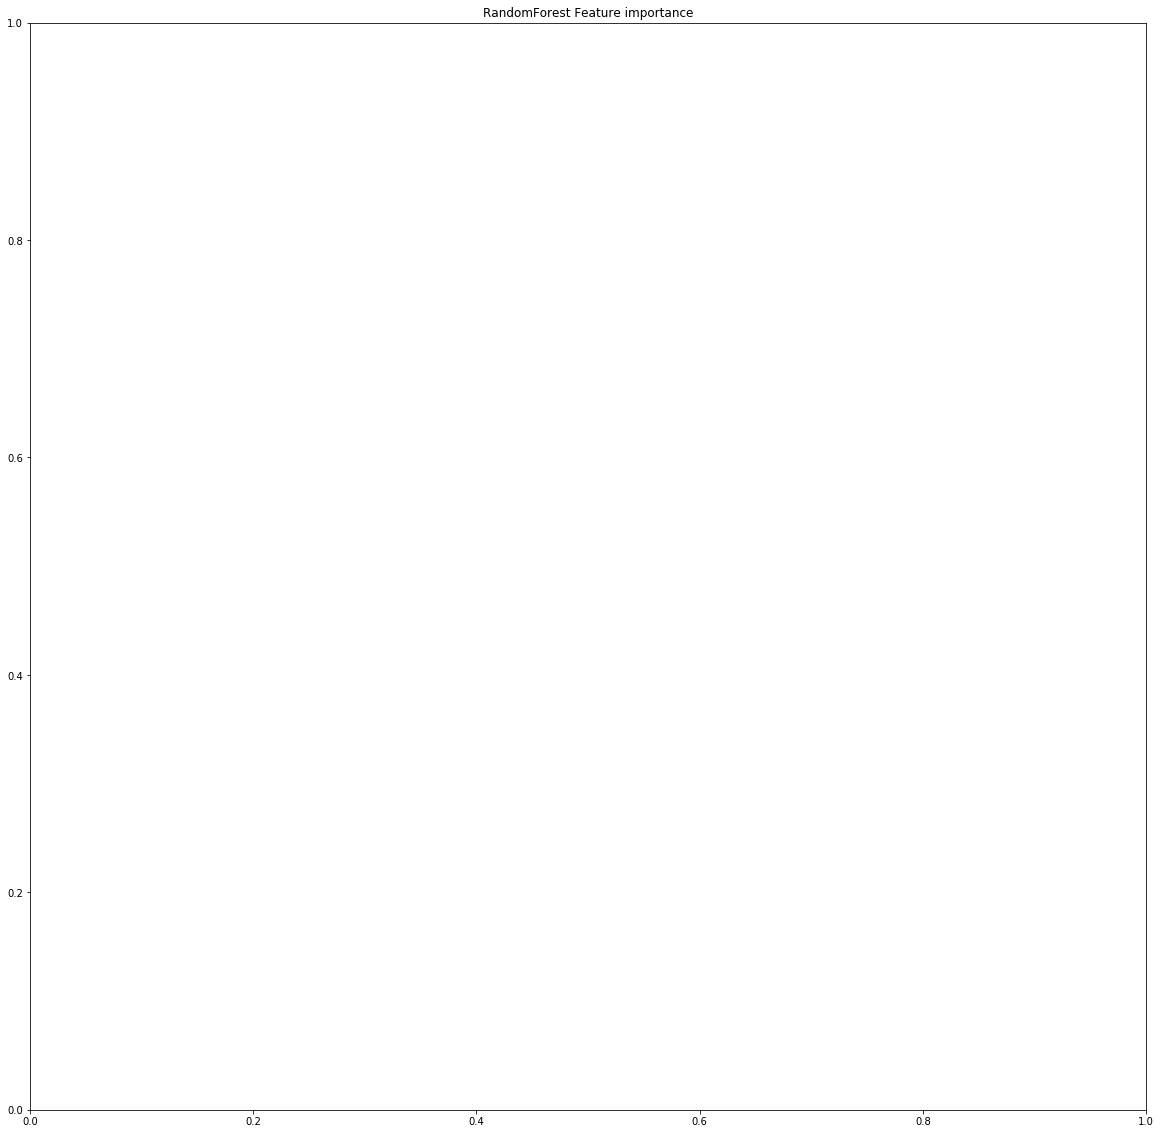

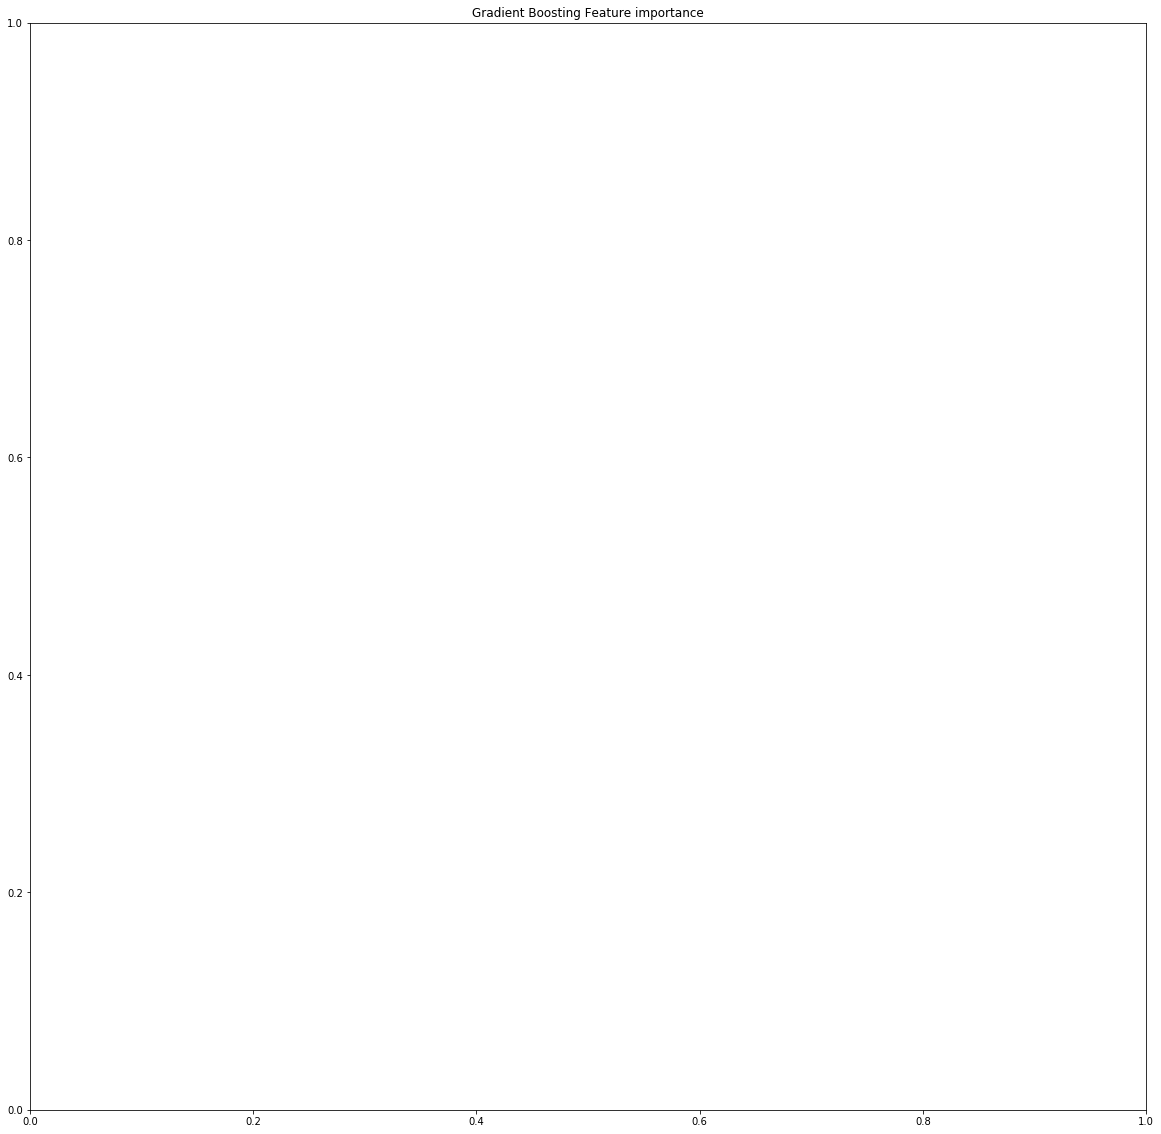

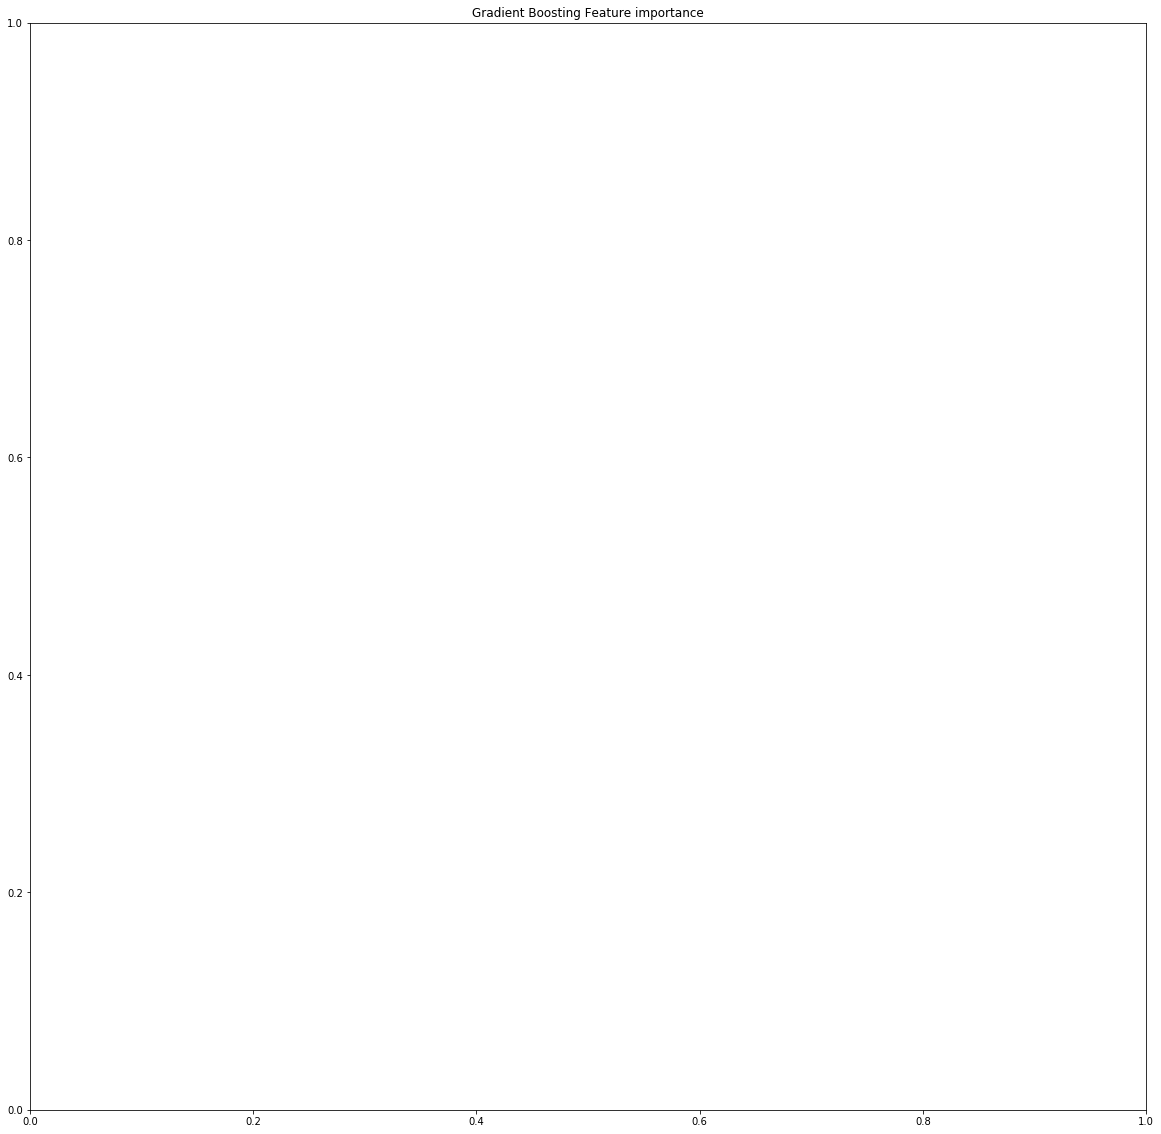

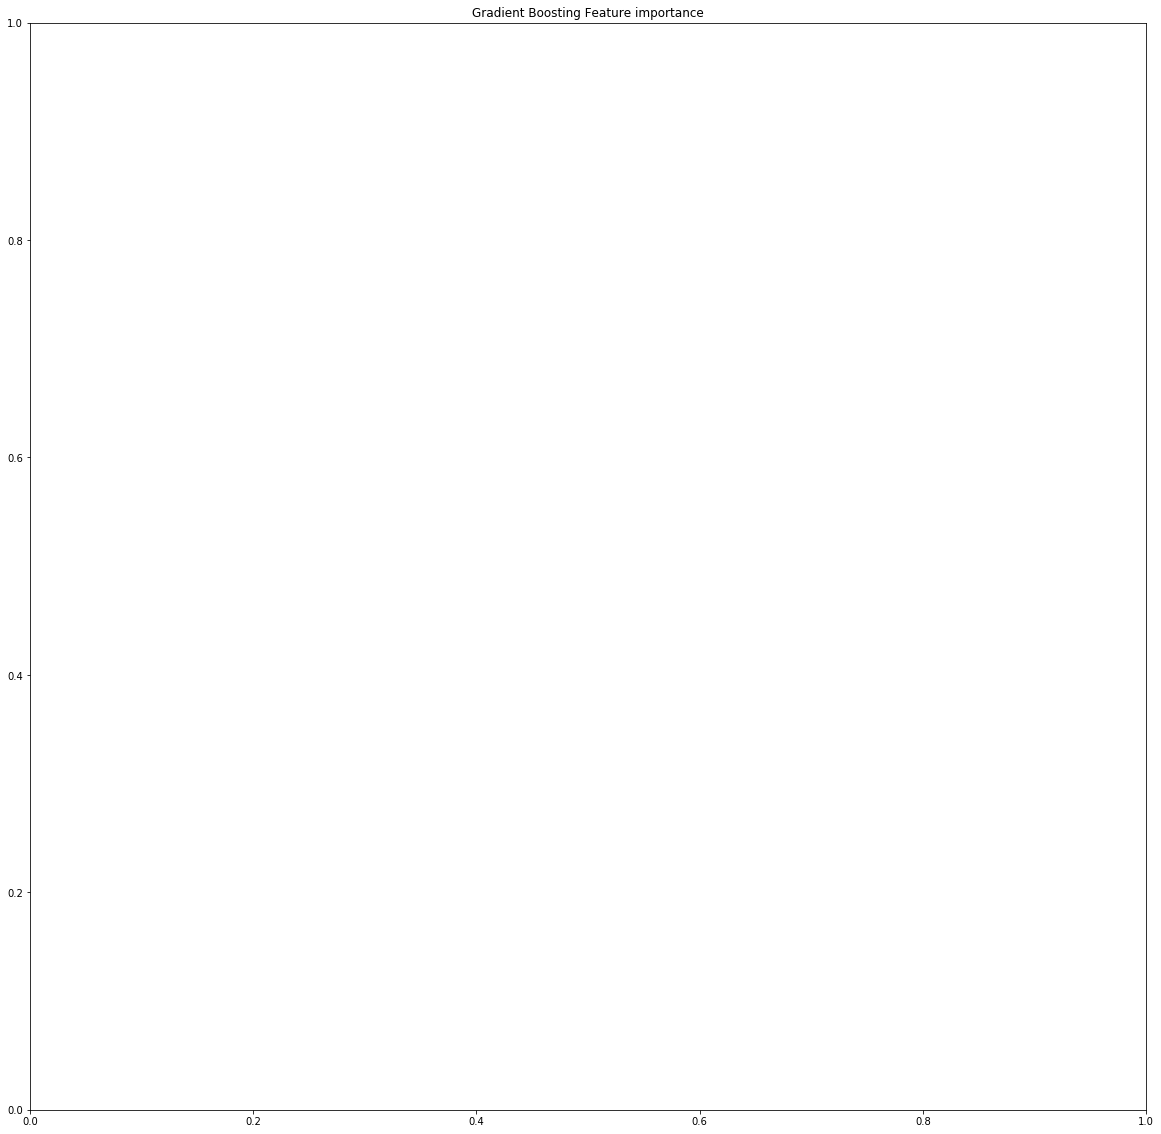

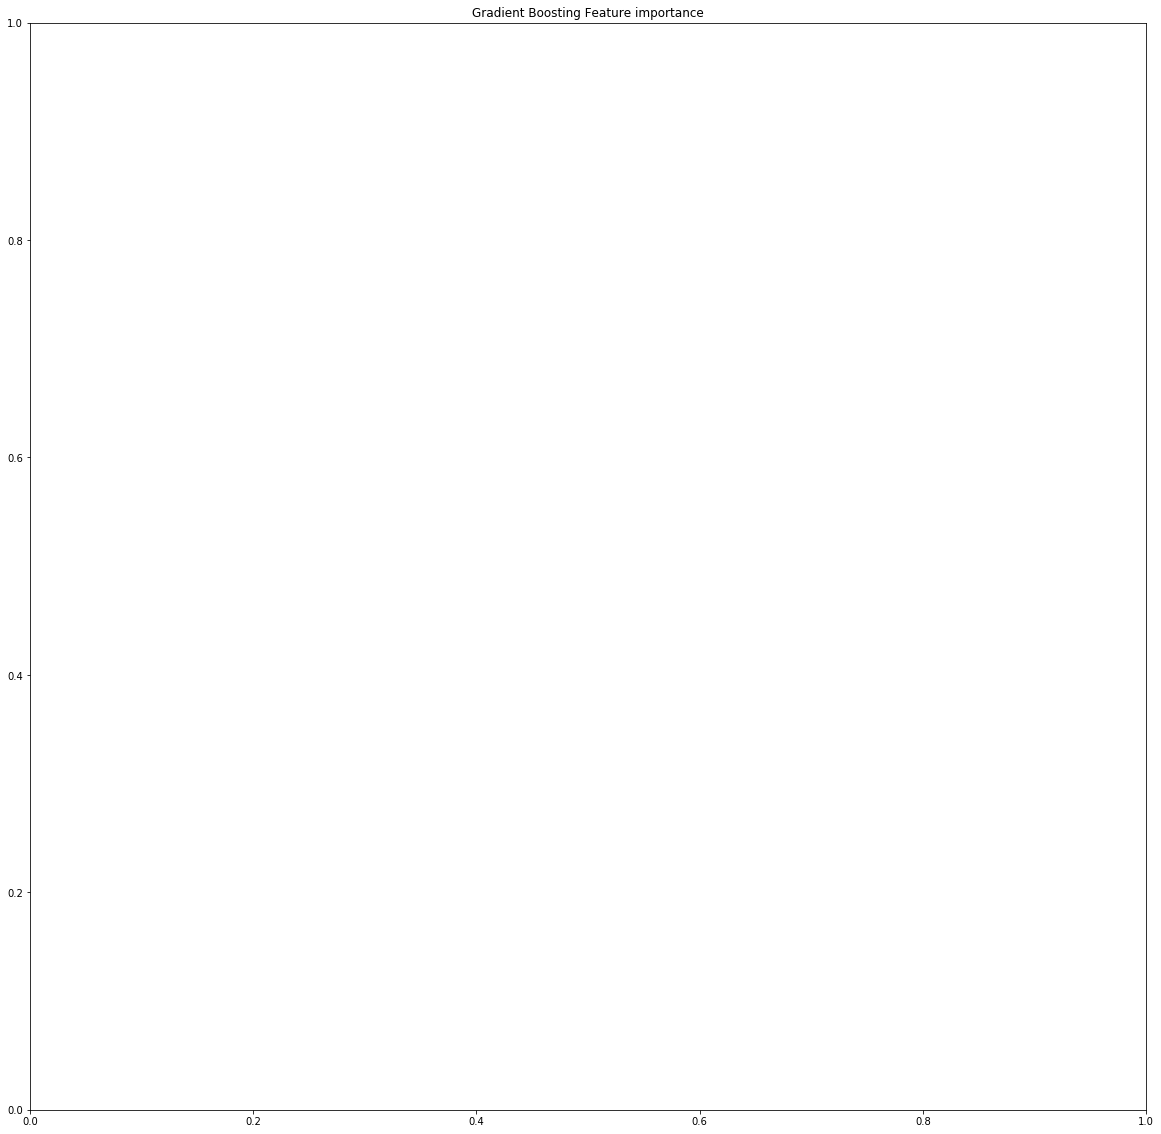

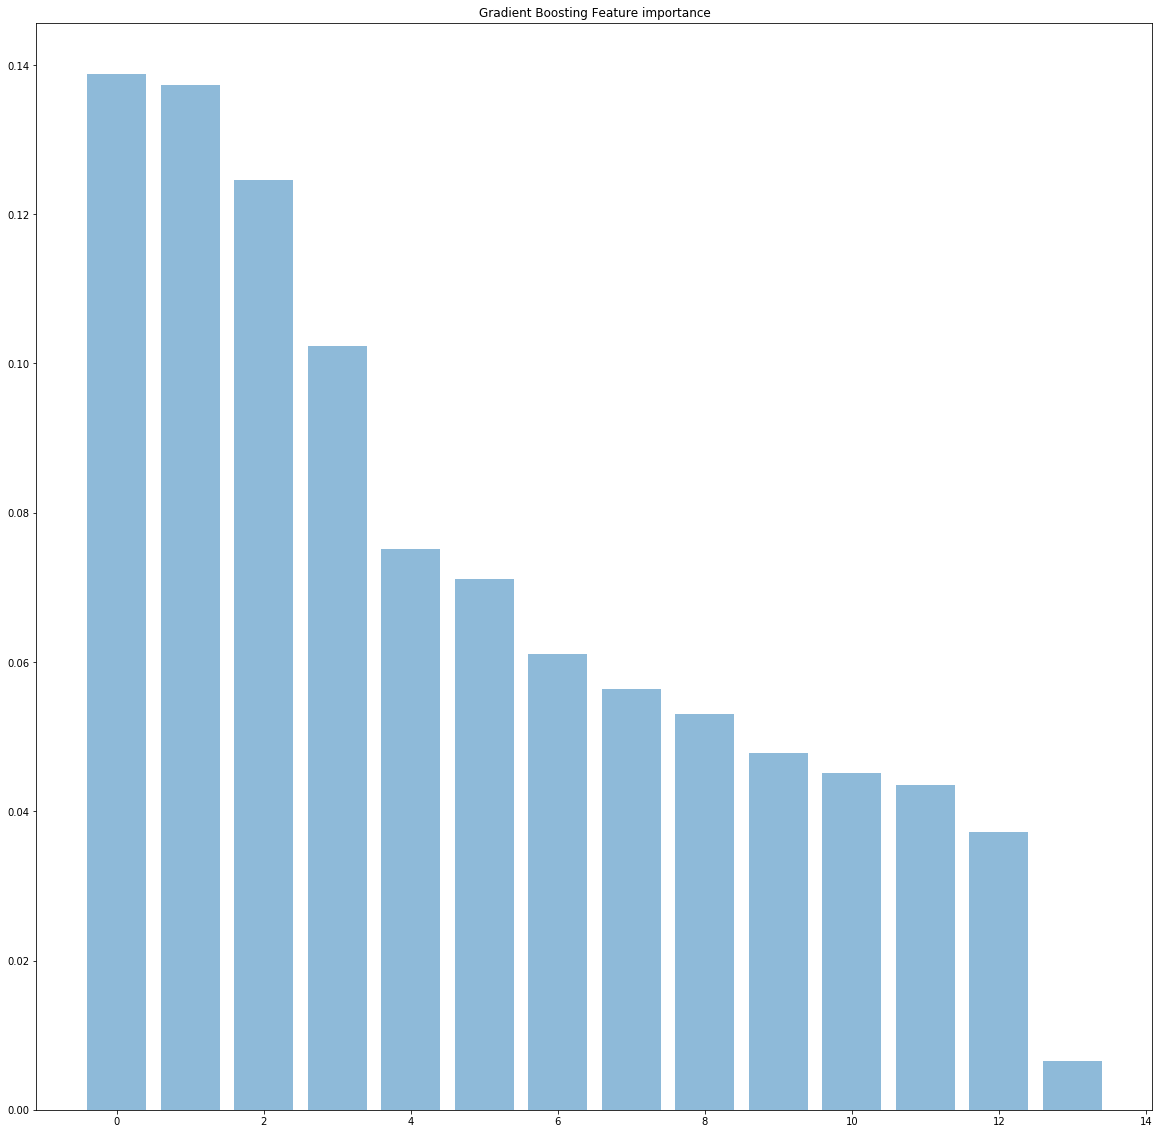

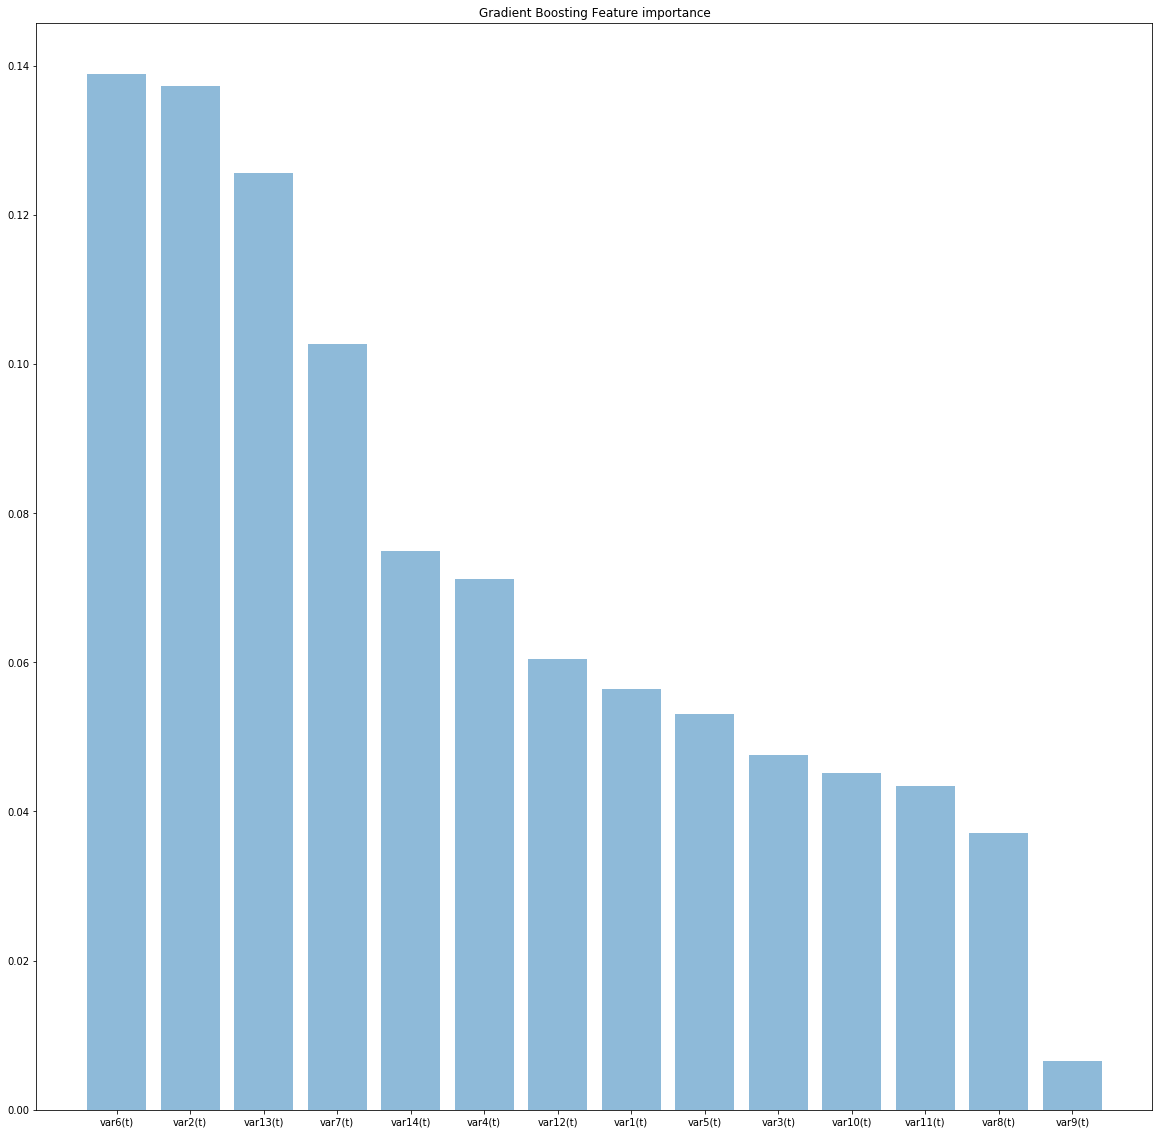

(14,)
(14, 1)


In [84]:
#
# Feature importance ranked using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': df_pruned_shifted_X.columns, 'importance': np.round(gbc.feature_importances_, 6)})
feature_importances = feature_importances.sort_values('importance', ascending=False).set_index('feature')
#
print(feature_importances)
#
# Plot the feature importance of the forest
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.title("Gradient Boosting Feature importance")
objects = list(feature_importances.axes[0])
y_pos = np.arange(len(objects))
feature_importance = np.array(feature_importances)
plt.bar(y_pos, feature_importance[:, 0], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

### Support Vector Machine Feature Importance Ranking

In [35]:
# Feature importance ranked by linear SVM
from sklearn import svm
#
svm = svm.SVC(kernel='linear')
svm.fit(df_pruned_shifted_X, df_pruned_shifted_Y)
df_pruned_shifted_X_columns = df_pruned_shifted_X.columns
feature_importances = pd.DataFrame(svm.coef_[0],
                                   index = df_pruned_shifted_X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
print('SVM Classification For Feature Selection: ')
print(feature_importances)
#
# Plot the feature importance of the SVM
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.title("Feature importance (Ranked by SVM)")
objects = list(feature_importances.axes[0])
y_pos = np.arange(len(objects))
feature_importance = np.array(feature_importances)
plt.bar(y_pos, feature_importance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

SVM Classification For Feature Selection: 
          importance
var5(t)    11.694125
var13(t)    7.525286
var8(t)     5.975246
var3(t)     5.314409
var9(t)     4.265117
var1(t)     3.896053
var4(t)    -0.847930
var11(t)   -1.239499
var12(t)   -1.900737
var2(t)    -4.547331
var7(t)    -4.769462
var6(t)    -4.930598
var14(t)   -4.970558
var10(t)   -8.795545


TypeError: only length-1 arrays can be converted to Python scalars

# Evaluation Metrics

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
#
class Scoring_Functions():
    #
    def __init__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
    #
    def accuracy(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
        return str(accuracy_score(self.y_true, self.y_pred) * 100) + "%"
    #
    def precision(self):
        # http: // scikit - learn.org / stable / modules / generated / sklearn.metrics.precision_score.html  # sklearn.metrics.precision_score
        return str(precision_score(self.y_true, self.y_pred, average='weighted')* 100) + '%'
    #
    def recall(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
        return str(recall_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'
    #
    def f_measure(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
        return str(f1_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'
    #
    def scoring_results(self):
        return "Accuracy: " + str(self.accuracy()) + "\nPrecision: " + str(self.precision()) + "\nRecall: " + str(self.recall()) + "\nFMeasure: " + str(self.f_measure())

### Random Forest Feature Importance Ranking (considering feature combinations)

In [37]:
# Wrapper Method - Random Forest Feature Selection
from sklearn.ensemble import RandomForestClassifier
from numpy import sort
from sklearn.feature_selection import SelectFromModel
#
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': df_pruned_shifted_X.columns, 'importance': np.round(rfc.feature_importances_, 6)})
feature_importances = feature_importances.sort_values('importance', ascending=False).set_index('feature')
from sklearn.feature_selection import SelectFromModel
#
model = RandomForestClassifier()
model.fit(X_train, y_train)
#
# make predictions for test data and evaluate
pred_y = model.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("RFC Accuracy: ")
print(sf.scoring_results())
print('-------------------------')
#
# fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_train_x = selection.transform(X_train)
    #
    # training model
    selection_model = RandomForestClassifier()
    selection_model.fit(select_train_x, y_train)
    #
    # evaluating model
    select_test_x = selection.transform(X_test)
    pred_y = selection_model.predict(select_test_x)
    sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
    print('Threshold: ' + str(thresh))
    print('Feature Count: ' + str(select_train_x.shape[1]))
    print(sf.scoring_results())
    print('-------------------------')

RFC Accuracy: 
Accuracy: 79.25%
Precision: 81.2756311493%
Recall: 79.25%
FMeasure: 79.3427306428%
-------------------------
Threshold: 0.044306835255
Feature Count: 14
Accuracy: 79.55%
Precision: 81.1840625%
Recall: 79.55%
FMeasure: 79.655636379%
-------------------------
Threshold: 0.0512778199084
Feature Count: 13
Accuracy: 79.75%
Precision: 81.3568738258%
Recall: 79.75%
FMeasure: 79.8554069924%
-------------------------
Threshold: 0.0522606243134
Feature Count: 12
Accuracy: 80.3%
Precision: 81.811526577%
Recall: 80.3%
FMeasure: 80.404972409%
-------------------------
Threshold: 0.0528657007247
Feature Count: 11
Accuracy: 77.5%
Precision: 79.6428535512%
Recall: 77.5%
FMeasure: 77.5933678205%
-------------------------
Threshold: 0.0540824497626
Feature Count: 10
Accuracy: 77.45%
Precision: 79.4499774016%
Recall: 77.45%
FMeasure: 77.5507747468%
-------------------------
Threshold: 0.0609434955632
Feature Count: 9
Accuracy: 77.0%
Precision: 78.7412347045%
Recall: 77.0%
FMeasure: 77.1141

### Gradient Boosting Feature Importance Ranking (considering feature combinations)

In [38]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#
# make predictions for test data and evaluate
pred_y = model.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("GBC Accuracy: ")
print(sf.scoring_results())
print('-------------------------')
#
# fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_train_x = selection.transform(X_train)
    #
    # training model
    selection_model = GradientBoostingClassifier()
    selection_model.fit(select_train_x, y_train)
    #
    # evaluating model
    select_test_x = selection.transform(X_test)
    pred_y = selection_model.predict(select_test_x)
    sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
    print('Threshold: ' + str(thresh))
    print('Feature Count: ' + str(select_train_x.shape[1]))
    print(sf.scoring_results())
    print('-------------------------')

GBC Accuracy: 
Accuracy: 78.65%
Precision: 79.690805769%
Recall: 78.65%
FMeasure: 78.7690205547%
-------------------------
Threshold: 0.00656089517952
Feature Count: 14
Accuracy: 78.65%
Precision: 79.690805769%
Recall: 78.65%
FMeasure: 78.7690205547%
-------------------------
Threshold: 0.037160269949
Feature Count: 13
Accuracy: 78.9%
Precision: 79.6741277368%
Recall: 78.9%
FMeasure: 79.0129559431%
-------------------------
Threshold: 0.0438477014694
Feature Count: 12
Accuracy: 76.0%
Precision: 77.2860493611%
Recall: 76.0%
FMeasure: 76.1324505706%
-------------------------
Threshold: 0.0451143724268
Feature Count: 11
Accuracy: 77.1%
Precision: 78.2447679029%
Recall: 77.1%
FMeasure: 77.2277298725%
-------------------------
Threshold: 0.0481417483612
Feature Count: 10
Accuracy: 75.45%
Precision: 76.8453221055%
Recall: 75.45%
FMeasure: 75.5832439216%
-------------------------
Threshold: 0.0530447473534
Feature Count: 9
Accuracy: 74.65%
Precision: 76.354667955%
Recall: 74.65%
FMeasure: 74.

# Implementation

### Logistic Regression (Using Grid Search)

In [39]:
#
# Logistic Regression
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X_temp, df_pruned_shifted_Y, test_size=0.2, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#
# using a grid search to find optimum hyper parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ('l1', 'l2'), 'C':[10,11,12,13],'intercept_scaling': [1.1,1.2,1.3], 'fit_intercept':(True,False)}
clf = LogisticRegression()
clf = GridSearchCV(clf, parameters, cv=2)
print(clf)
clf.fit(X_train,y_train)
print(clf.best_params_)
#
penalty=clf.best_params_['penalty']
C=clf.best_params_['C']
intercept_scaling=clf.best_params_['intercept_scaling']
fit_intercept=clf.best_params_['fit_intercept']
print(penalty)
print(C)
print(intercept_scaling)
print(fit_intercept)
clf = LogisticRegression(penalty=penalty,C=C,intercept_scaling=intercept_scaling,fit_intercept=fit_intercept)
clf.fit(X_train, y_train)
print(clf)
#
# make predictions for test data and evaluate
pred_y = clf.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("Logistic Regression Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': [10, 11, 12, 13], 'intercept_scaling': [1.1, 1.2, 1.3], 'fit_intercept': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
{'penalty': 'l2', 'C': 10, 'intercept_scaling': 1.1, 'fit_intercept': True}
l2
10
1.1
True
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1.1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Logistic Regression Accuracy: 
Accu

### Linear Discriminant Analysis Classification

In [40]:
#
# Linear Discriminant Analysis
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X
# df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
# df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
# ... No features were dropped for LDA, as tests showed that LDA achieved greatest accuracy with all features being input
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X_temp, df_pruned_shifted_Y, test_size=0.2, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
#
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
print(clf)
#
# make predictions for test data and evaluate
pred_y = clf.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("LDA Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
LDA Accuracy: 
Accuracy: 64.7%
Precision: 64.2830205443%
Recall: 64.7%
FMeasure: 63.210812767%
-------------------------


### Random Forest Classification (Using Grid Search)

In [41]:
#
# Random Forest Classification
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X
# df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
# df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
#df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
#
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X_temp, df_pruned_shifted_Y, test_size=0.2, random_state=0)
#
#Random Forest Classification based on acquired feature analysis
n_estimators = 10000
max_features = 'sqrt'
criterion = 'gini'
clf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, n_jobs=6)
clf.fit(X_train, y_train)
#
print(clf)
#
# make predictions for test data and evaluate
pred_y = clf.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("Random Forest Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Random Forest Accuracy: 
Accuracy: 94.2%
Precision: 94.2024521019%
Recall: 94.2%
FMeasure: 94.1895238095%
-------------------------


### SVM Grid search using an RBF Kernel

In [42]:
from sklearn import svm
#
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X
# df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
# df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X_temp, df_pruned_shifted_Y, test_size=0.4, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# parameters = {'C': (1, 2, 3, 4, 5, 6, 7), 'gamma':[40, 35, 30, 27, 25, 23, 20]}
# clf = svm.SVC()
# clf = GridSearchCV(clf, parameters)
# clf.fit(X_train, y_train)
# print(clf.best_params_)
kernel = 'rbf'
C = 3
gamma = 30
degree = 3
clf = svm.SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
clf.fit(X_train, y_train)
print(clf)
#
# make predictions for validation data and evaluate
pred_y = clf.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("SVM Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVM Accuracy: 
Accuracy: 95.6%
Precision: 95.60496515%
Recall: 95.6%
FMeasure: 95.5936527284%
-------------------------


# Test File Evaluation

In [43]:
path = 'EEGEyeState_Testing.arff.csv'
lag = 0
df = pd.read_csv(path)
df_values = df.values
df_values_count = len(df_values)
df_headers = df.columns
df_header_count = len(df_headers)
print('DF size before outlier removal: ' + str(df_values_count))
#
# Removing any lag variables of var15(t-lag) (label)
if lag > 0:
    for i in range(1,lag+1):
        df_pruned_shifted = df_pruned_shifted.drop('var15(t-' + str(i) + ')', 1)
df_pruned_shifted_headers = df_pruned_shifted.columns
df_pruned_shifted_header_count = len(df_pruned_shifted_headers)
#
# Cross-validating of dataset: Splitting dataset into sub samples for training and validation purposes
from sklearn.model_selection import train_test_split
df_pruned_shifted_Y = df_pruned_shifted['var15(t)']
df_pruned_shifted_X = df_pruned_shifted.drop('var15(t)', 1)
#
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X
# df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
# df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
df_pruned_shifted_X_temp = scaler.fit_transform(df_pruned_shifted_X_temp)
# Value prediction using RBF Kernel SVM
pred_y = clf.predict(df_pruned_shifted_X_temp)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=df_pruned_shifted_Y)
print("SVM Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

DF size before outlier removal: 4980
SVM Accuracy: 
Accuracy: 98.1898189819%
Precision: 98.1909622974%
Recall: 98.1898189819%
FMeasure: 98.1890271093%
-------------------------


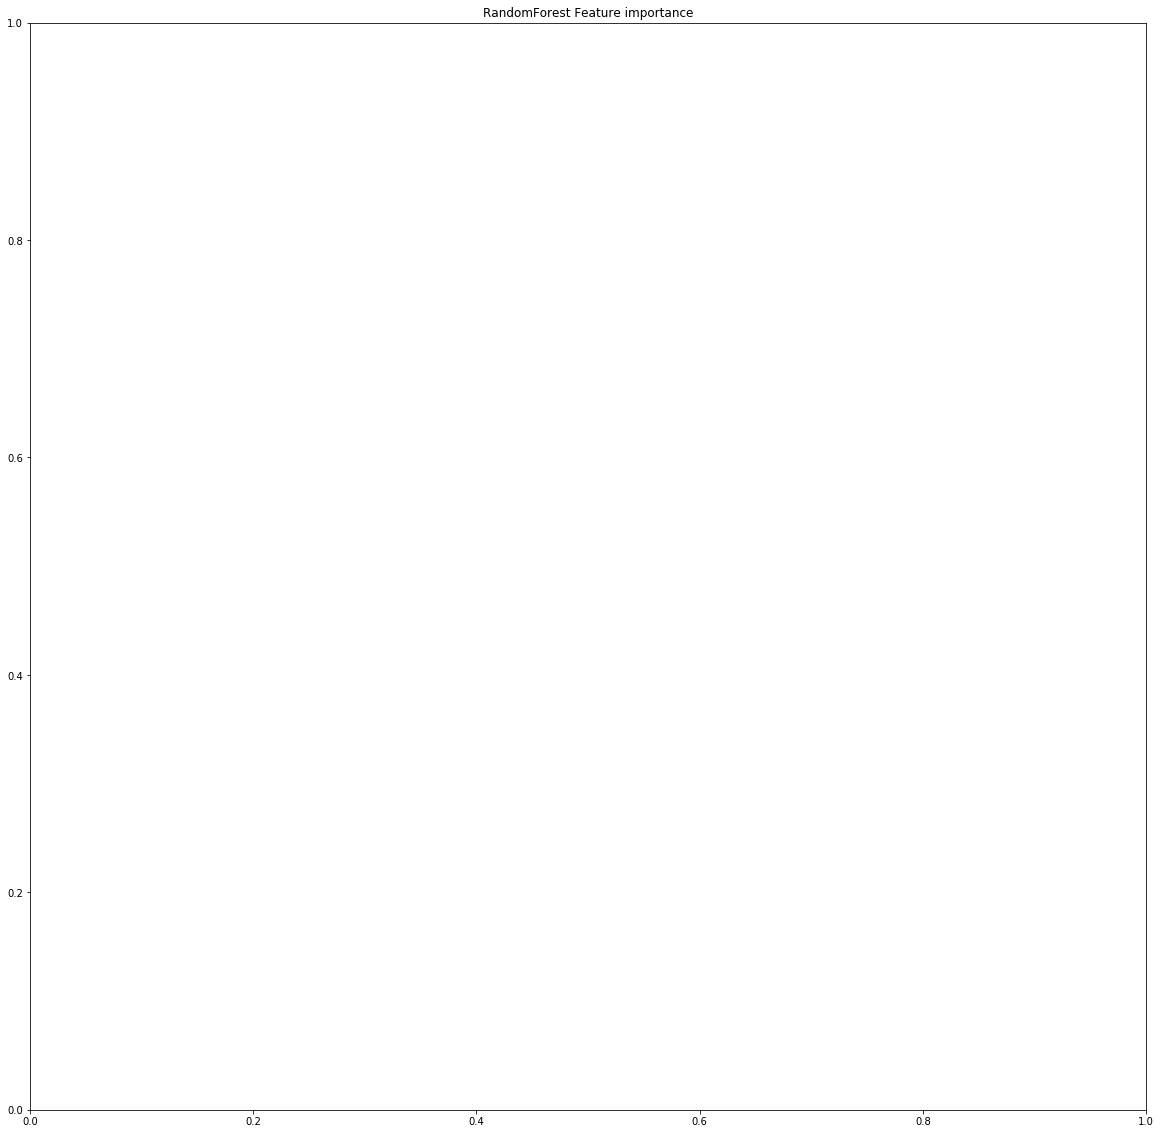

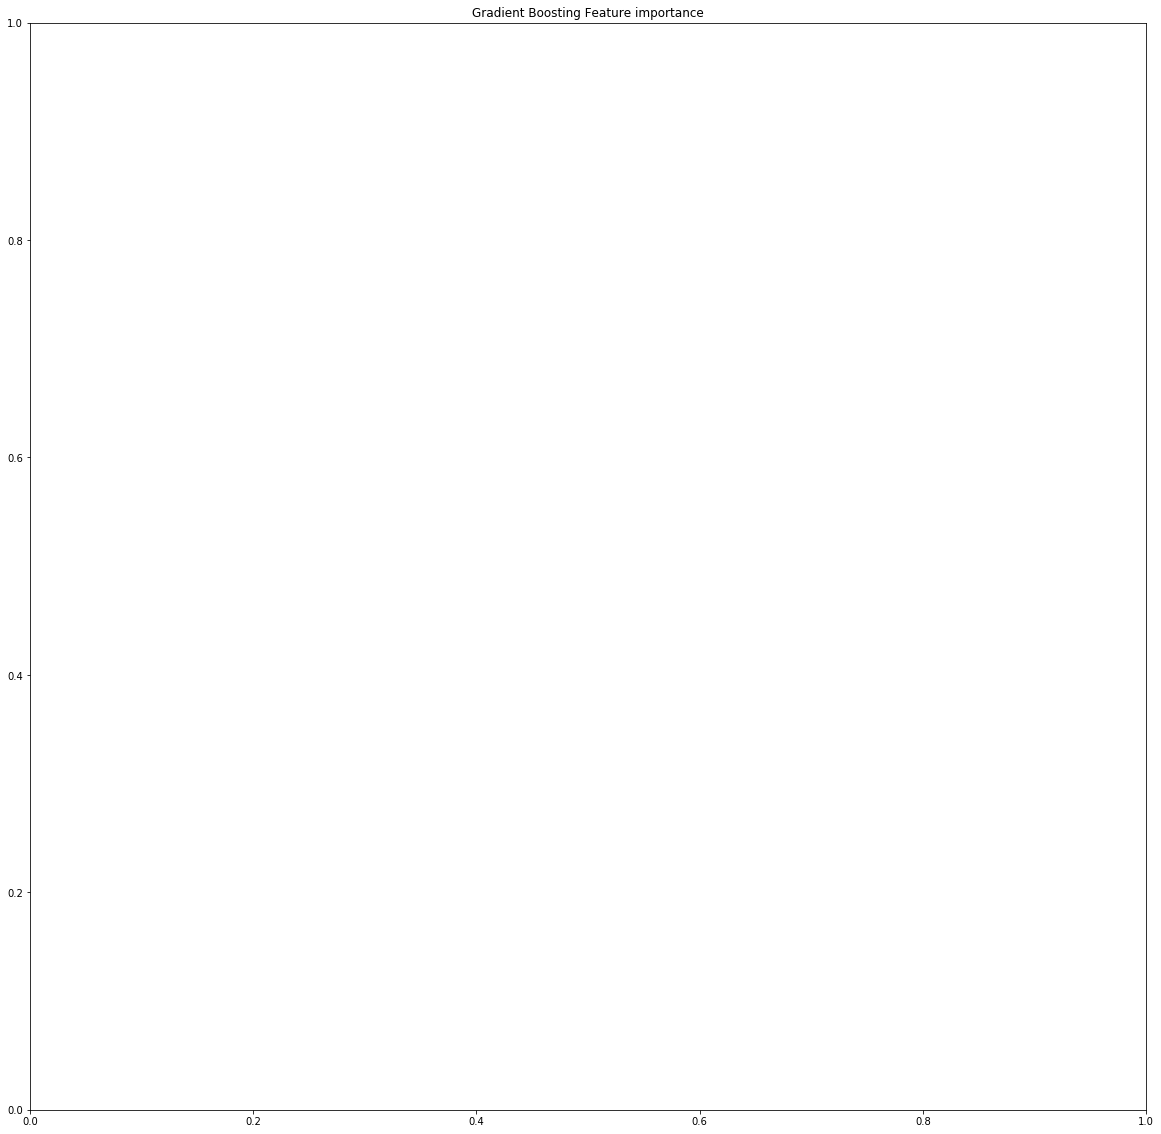

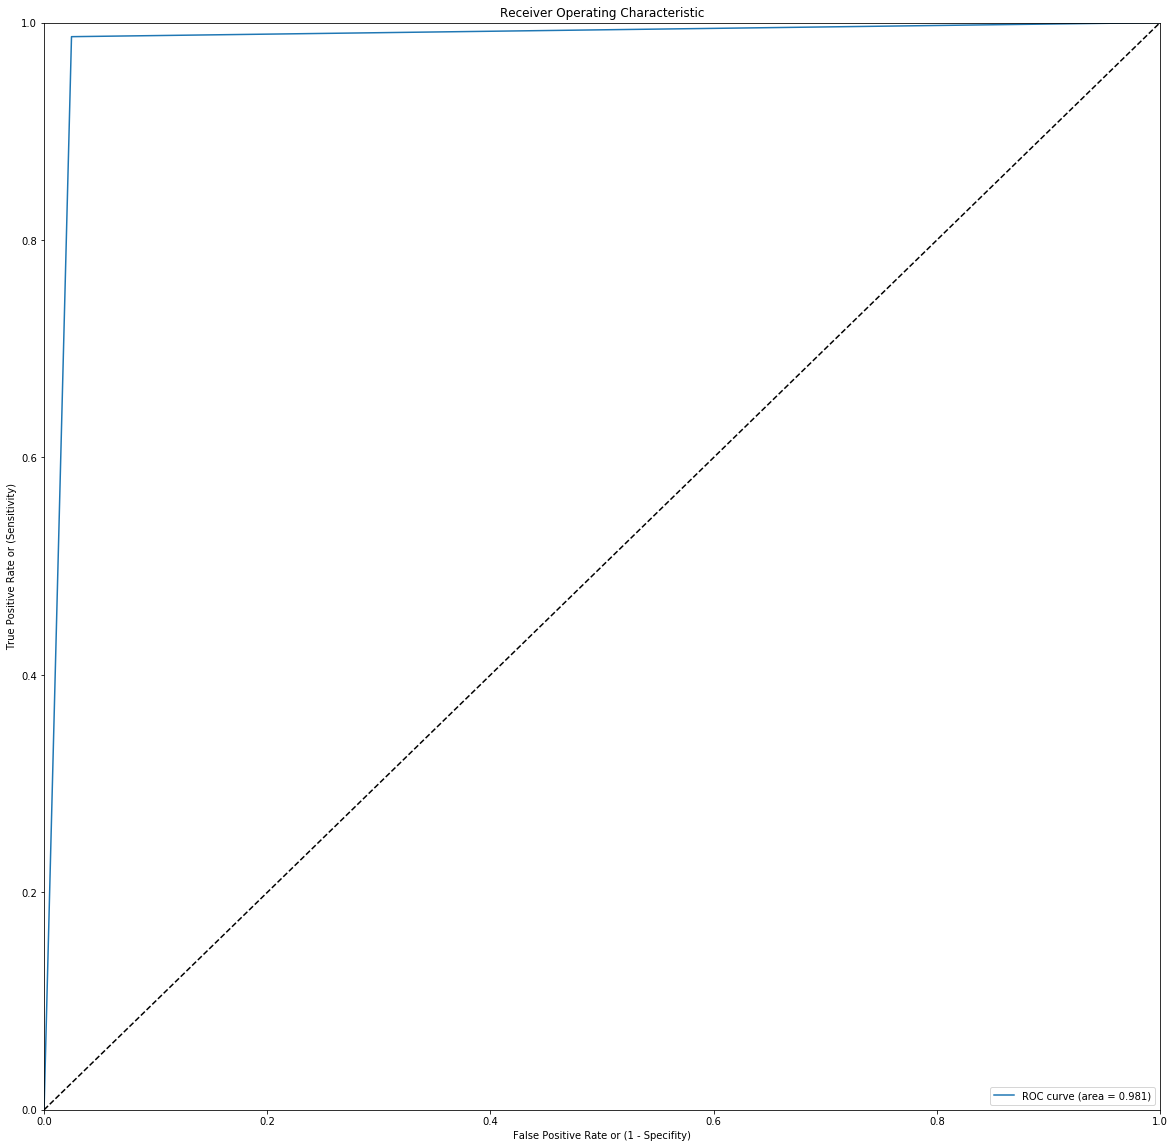

In [44]:
from sklearn.metrics import roc_curve, auc
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(df_pruned_shifted_Y, pred_y)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# LSTM Predictor

In [36]:
%reset -f
testID = 0

import os
import shutil

import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import plot_model

# SkLearn
import sklearn.preprocessing as SklPreProcessing
import sklearn.metrics as SklMetrics
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


%matplotlib inline

In [37]:
class Scoring_Functions():
    #
    def __init__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
    #
    def accuracy(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
        return str(accuracy_score(self.y_true, self.y_pred) * 100) + "%"
    #
    def precision(self):
        # http: // scikit - learn.org / stable / modules / generated / sklearn.metrics.precision_score.html  # sklearn.metrics.precision_score
        return str(precision_score(self.y_true, self.y_pred, average='weighted')* 100) + '%'
    #
    def recall(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
        return str(recall_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'
    #
    def f_measure(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
        return str(f1_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'
    #
    def scoring_results(self):
        return "Accuracy: " + str(self.accuracy()) + "\nPrecision: " + str(self.precision()) + "\nRecall: " + str(self.recall()) + "\nFMeasure: " + str(self.f_measure())

In [59]:
class LSTMPredictor:
    ############################
    # MetaData
    __testID = None
    __cmdCount = 0
    __cmdHistory = ''
    __resultsRootDir = 'results'
    ############################
    # Dataset info
    __eegData = None
    __eegHeader = None
    __testDataIndex = 0
    __trainDataFileName = None
    __testDataFileName = None
    ############################
    # ML model info
    __model = None
    __trainTestMap = None
    ############################
   
    def __init__(self, testID, trainFilename, testFilename):
        self.__testID = str(testID).zfill(5)
        self.__createTestResultsDir()
        self.__trainDataFileName = trainFilename
        self.__testDataFileName = testFilename
        self.ResetState()
        
    def ResetState(self):
        tmpFileName = ''
        self.__cmdHistory = ''
        self.__cmdCount = 0
        self.__loadData()
    
    ###########################################################################
    # Plot methods
    def PlotFeatures(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('PlotFeatures_filePrefix:' + str(filePrefix))
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)
        
        featureCount = len(self.__eegHeader) - 1
        idxSubplot = 0
        
        for itr in range(featureCount):
            idxSubplot = idxSubplot + 1
            currAx = fig.add_subplot(featureCount + 1, 1, idxSubplot)
            currAx.grid()
            currAx.plot(self.__eegData[:, itr])
            currAx.set_title(self.__eegHeader[itr])
        
        idxSubplot = idxSubplot + 1
        currAx = fig.add_subplot(featureCount + 1, 1, idxSubplot)
        currAx.grid()
        currAx.plot(self.__eegData[:, -1])
        currAx.set_title(self.__eegHeader[-1])

        if filePrefix is None:
            plt.show()
        else:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)
            
    def PlotBoxPlots(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('PlotBoxPlots_filePrefix:' + str(filePrefix))
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)
        
        ax1 = fig.add_subplot(2, 1, 1)
        ax1.set_title('Feature range: Full')
        ax1.boxplot(self.__eegData[:, :-1]
                    , sym='b.'
                    , vert=False
                    , whis='range'
                    , labels=self.__eegHeader[:-1]
                    , meanline=True
                    , showbox=True
                    , showfliers=True)
        
        ax2 = fig.add_subplot(2, 1, 2)
        ax2.set_title('Feature range: [5%, 95%]')
        ax2.boxplot(self.__eegData[:, :-1]
                    , sym='b.'
                    , vert=False
                    , whis=[5, 95]
                    , labels=self.__eegHeader[:-1]
                    , meanline=True
                    , showbox=True
                    , showfliers=False)
        
        if filePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)
            
    def PlotMeanDistribution(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('PlotMeanDistribution_filePrefix:' + str(filePrefix))
        idxEyeClosed = np.where(self.__eegData[:, -1] == 1)[0]
        idxEyeOpened = np.where(self.__eegData[:, -1] == 0)[0]
        
        featureCount = len(self.__eegHeader) - 1
        xTick = np.array(range(featureCount))
        
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)

        ax = fig.add_subplot(1, 1, 1)
        ax.grid()
        ax.set_title('Mean Distribution')
        ax.set_xticklabels(self.__eegHeader[0:-1])
        ax.set_xticks(xTick)

        ax.plot(xTick, self.__eegData[idxEyeOpened][:, 0:featureCount].mean(axis=0), 'bo')
        ax.plot(xTick, self.__eegData[idxEyeClosed][:, 0:featureCount].mean(axis=0), 'ro')
        ax.plot(xTick, self.__eegData[:, 0:featureCount].mean(axis=0), 'go')

        ax.legend(['Eye Open', 'Eye Closed', 'Both'])
        
        if filePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)

    def PlotStdDevDistribution(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('PlotStdDevDistribution_filePrefix:' + str(filePrefix))
        idxEyeClosed = np.where(self.__eegData[:, -1] == 1)[0]
        idxEyeOpened = np.where(self.__eegData[:, -1] == 0)[0]
        
        featureCount = len(self.__eegHeader) - 1
        xTick = np.array(range(featureCount))
        
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)

        ax = fig.add_subplot(1, 1, 1)
        ax.grid()
        ax.set_title('Standard Deviation Distribution')
        ax.set_xticklabels(self.__eegHeader[0:-1])
        ax.set_xticks(xTick)

        ax.plot(xTick, self.__eegData[idxEyeOpened][:, 0:featureCount].std(axis=0), 'bo')
        ax.plot(xTick, self.__eegData[idxEyeClosed][:, 0:featureCount].std(axis=0), 'ro')
        ax.plot(xTick, self.__eegData[:, 0:featureCount].std(axis=0), 'go')

        ax.legend(['Eye Open', 'Eye Closed', 'Both'])
        
        if filePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)
            
    def FeatureCorrelationMatrix(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('FeatureCorrelationMatrix_filePrefix:' + str(filePrefix))
        # Compute the correlation matrix
        corr = pd.DataFrame(data=self.__eegData[:, :-1], columns=list(self.__eegHeader[:-1])).corr()
        
        # Generate a mask for the upper triangle
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        
        # Set up the matplotlib figure
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)
        
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title("Feature correlation matrix")
        
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(240, 10, as_cmap=True)
        
        # Draw the heatmap
        sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
        
        if filePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)

    ###########################################################################
    # Getters
    def GetFeatureNames(self):
        return self.__eegHeader[:-1]
    
    def GetCmdHistory(self):
        return self.__cmdHistory
    ###########################################################################
    # Dataset operations
    def RemoveFeatures(self, indices):
        assert isinstance(indices, list), 'Parameter must be a list'

        self.__addToHistory('RemoveFeatures:' + ','.join(str(x) for x in indices))
        self.__eegHeader = np.delete(self.__eegHeader, indices)
        self.__eegData = np.delete(self.__eegData, indices, axis=1)
    
    def RemoveOutliers(self, upperLimit=None, lowerLimit=None):
        outLierIndexes = set()
        result = {}
        result['upper'] = set()
        result['lower'] = set()
        
        self.__addToHistory('RemoveOutliers_Upper:' + str(upperLimit)
                            + '_Lower:' + str(lowerLimit))
        featureCount = len(self.__eegHeader) - 1

        if upperLimit is not None:
            for itr in range(featureCount):
                outLiers = np.where(self.__eegData[:, itr] > upperLimit)[0]
                if len(outLiers) > 0:
                    for i in xrange(len(outLiers)):
                        result['upper'].add(outLiers[i])

        if lowerLimit is not None:
            for itr in range(featureCount):
                outLiers = np.where(self.__eegData[:, itr] < lowerLimit)[0]
                if len(outLiers) > 0:
                    for i in xrange(len(outLiers)):
                        result['lower'].add(outLiers[i])
                        
        deleteIndexes = list(result['upper'].union(result['lower']))
        self.__eegData = np.delete(self.__eegData, deleteIndexes, axis=0)
        
        return result

    def NormalizeData(self, normFunc='MinMax'):
        self.__addToHistory('NormalizeData_Func:' + normFunc)
        
        if normFunc == 'MinMax':
            scaler = SklPreProcessing.MinMaxScaler(feature_range=(0, 1))
            self.__eegData = scaler.fit_transform(self.__eegData)
        else:
            self.__eegData = normalize(self.__eegData, norm=normFunc)
        
    ###########################################################################
    # Keras LSTM model
    def CompileModel(self, lagCount, neuronCount, dropOut,
                     modelArchitectureFilename,
                     lstmStackCount=1, useLaggedOutput=True,
                     lossFunc='mae', optimizerFunc='adam'):
        assert lstmStackCount > 0, 'lstmStackCount must be > 0'
        self.__addToHistory('CompileModel_Lag:' + str(lagCount)
                            + '_NeuronCount:' + str(neuronCount)
                            + '_DropOut:' + str(dropOut)
                            + '_useLaggedOutput:' + str(useLaggedOutput)
                            + '_LossFunc:' + str(lossFunc)
                            + '_OptimizerFunc:' + str(optimizerFunc)
                            + '_lstmStackCount:' + str(lstmStackCount))
        
        supervisedDataset = self.__timeSeriesToSupervised(lagCount, useLaggedOutput)
        featureCount = len(self.__eegHeader) - 1
        
        values = supervisedDataset.values
        
        trainingSet = values[:self.__testDataIndex, :]
        testingSet = values[self.__testDataIndex:, :]
        
        pastInputCount = (featureCount + 1) * lagCount
        self.__trainTestMap = {}

        self.__trainTestMap['trainingSet_inFeatures'] = trainingSet[:, :pastInputCount]
        self.__trainTestMap['trainingSet_outFeature'] = trainingSet[:, -1]
        
        self.__trainTestMap['testingSet_inFeatures'] = testingSet[:, :pastInputCount]
        self.__trainTestMap['testingSet_outFeature'] = testingSet[:, -1]
        
        # Reshape input to be 3D [samples, timesteps, features]
        featureDimSize = (featureCount + 1)
        
        self.__trainTestMap['trainingSet_inFeatures_reShaped'] = self.__trainTestMap['trainingSet_inFeatures'].reshape(
            (self.__trainTestMap['trainingSet_inFeatures'].shape[0], lagCount, featureDimSize))
        
        self.__trainTestMap['testingSet_inFeatures_reShaped'] = self.__trainTestMap['testingSet_inFeatures'].reshape(
            (self.__trainTestMap['testingSet_inFeatures'].shape[0], lagCount, featureDimSize))
        
        # Design network
        self.__model = Sequential()
        
        if lstmStackCount == 1:
            self.__model.add(
                LSTM(neuronCount,
                     input_shape=(
                         self.__trainTestMap['trainingSet_inFeatures_reShaped'].shape[1],
                         self.__trainTestMap['trainingSet_inFeatures_reShaped'].shape[2])
                    )
            )
        else:
            self.__model.add(
                LSTM(neuronCount,
                     input_shape=(
                         self.__trainTestMap['trainingSet_inFeatures_reShaped'].shape[1],
                         self.__trainTestMap['trainingSet_inFeatures_reShaped'].shape[2]),
                     return_sequences=True)
            )
            
            for i in range(lstmStackCount - 1):
                returnSequence = (i != (lstmStackCount - 2))
                self.__model.add(LSTM(neuronCount, return_sequences=returnSequence))
        
        self.__model.add(Dense(1))
        self.__model.compile(loss=lossFunc, optimizer=optimizerFunc)
        
        # Visualize LSTM network
        pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + modelArchitectureFilename
        plot_model(self.__model, to_file=pathToFile, show_shapes=True)
        
    def FitModel(self, epochCount, batchSize,
                 resultsFile,
                 lossFuncFilePrefix=None,
                 predictionFilePrefix=None,
                 figWidth=20, figHeight=20, verbosity=2):
        assert self.__model != None, 'Model not compiled'
        
        self.__addToHistory('FitModel_EpochCount:' + str(epochCount)
                            + '_BatchSize:' + str(batchSize)
                            + '_lossFuncFilePrefix:' + str(lossFuncFilePrefix)
                            + '_predictionFilePrefix:' + str(predictionFilePrefix))
        
        # Fit model
        start = timer()
        history = self.__model.fit(self.__trainTestMap['trainingSet_inFeatures_reShaped'],
                                 self.__trainTestMap['trainingSet_outFeature'],
                                 epochs=epochCount,
                                 batch_size=batchSize,
                                 validation_data=(
                                     self.__trainTestMap['trainingSet_inFeatures_reShaped'][8000:, :],
                                     self.__trainTestMap['trainingSet_outFeature'][8000:],
#                                      self.__trainTestMap['testingSet_inFeatures_reShaped'],
#                                      self.__trainTestMap['testingSet_outFeature']
                                 ),
                                 verbose=verbosity, shuffle=False)
        end = timer()
        
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)

        ax = fig.add_subplot(1, 1, 1)
        ax.grid()
        ax.set_title('Loss Function')
        ax.plot(history.history['loss'], label='train')
        ax.plot(history.history['val_loss'], label='test')
        plt.legend(['train', 'test'])
                    
        if lossFuncFilePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + lossFuncFilePrefix
            plt.savefig(pathToFile)

        testDataPrediction = self.__model.predict_classes(self.__trainTestMap['testingSet_inFeatures_reShaped'])
        testDataPredictionRaw = self.__model.predict(self.__trainTestMap['testingSet_inFeatures_reShaped'])
        scoringMetrics = Scoring_Functions(testDataPrediction, self.__trainTestMap['testingSet_outFeature'])
        
        validationDataPrediction = self.__model.predict_classes(self.__trainTestMap['trainingSet_inFeatures_reShaped'][8000:, :])
        scoringMetricsValidation = Scoring_Functions(validationDataPrediction, self.__trainTestMap['trainingSet_outFeature'][8000:])
        
        results = scoringMetrics.scoring_results()
        results += '\n\nValidation data results:\n'
        results += scoringMetricsValidation.scoring_results()
        results += '\n\nExecution time: '
        results += str(end - start)
        results += 'secs'
        self.__writeResultsToFile(resultsFile, results)
        print 'Results:\n' + results

        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)
        
        ax1 = fig.add_subplot(3, 1, 1)
        ax1.grid()
        ax1.set_title('Expected')
        ax1.plot(self.__trainTestMap['testingSet_outFeature'])

        ax2 = fig.add_subplot(3, 1, 2)
        ax2.grid()
        ax2.set_title('Prediction - With rounding')
        ax2.plot(testDataPrediction)

        ax3 = fig.add_subplot(3, 1, 3)
        ax3.grid()
        ax3.set_title('Prediction - Without rounding')
        ax3.plot(testDataPredictionRaw)

        if predictionFilePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + predictionFilePrefix
            plt.savefig(pathToFile)

        # Reset __model
        self.__model = None
        self.__trainTestMap = None
    
    ###########################################################################
    # Private methods
    def __createTestResultsDir(self):
        dirName = "%s/%s" % (self.__resultsRootDir, self.__testID)
        if os.path.exists(dirName):
            shutil.rmtree(dirName)
        os.makedirs(dirName)
        
    def __loadData(self):
        self.__eegHeader = np.genfromtxt(self.__trainDataFileName, delimiter=',', max_rows=1, dtype=str)
        self.__eegData = np.genfromtxt(self.__trainDataFileName, delimiter=',', skip_header=1)
        testDataSet = np.genfromtxt(self.__testDataFileName, delimiter=',', skip_header=1)
        
        self.__testDataIndex = self.__eegData.shape[0]
        self.__eegData = np.append(self.__eegData, testDataSet, axis=0)

    def __timeSeriesToSupervised(self, lagCount, useLaggedOutput):
        featureCount = len(self.__eegHeader) - 1

        cols, names = list(), list()
        dfInput = pd.DataFrame(self.__eegData[:, :-1])
        dfOutput = pd.DataFrame(self.__eegData[:, -1])
        
        for i in range(lagCount, 0, -1):
            cols.append(dfInput.shift(i))
            if useLaggedOutput:
                cols.append(dfOutput.shift(i))
            else:
                # Set the lagged output variable to a constant 0.5
                tmp = len(dfOutput.shift(i))
                cols.append(pd.DataFrame(np.ones(tmp) * 0.5))
            
            names += [('%s(t-%d)' % (self.__eegHeader[j], i)) for j in range(featureCount)]
            names += [('%s(t-%d)' % (self.__eegHeader[-1], i))]

        cols.append(dfInput)
        cols.append(dfOutput)
        names += [('%s(t)' % self.__eegHeader[j]) for j in range(featureCount)]
        names += [('%s(t)' % self.__eegHeader[-1])]

        agg = pd.concat(cols, axis=1)
        agg.columns = names

        # Drop rows containing NaN values
        agg.dropna(inplace=True)
        return agg
    
    def __addToHistory(self, newCmd):
        tmpStr = ''
        if self.__cmdCount > 0:
            tmpStr += '\n'
            for itr in range(self.__cmdCount):
                tmpStr += '+'
                
        tmpStr += newCmd
        self.__cmdHistory += tmpStr
        self.__cmdCount += 1
        
    def __writeResultsToFile(self, resFilename, results):
        pathToResultsFile = self.__resultsRootDir + "/" + self.__testID + "/" + resFilename
        resString = ''
        
        if os.path.exists(pathToResultsFile):
            resString = '\n\n-----------------------------------------------------------------\n'
            fileMode = 'a' # Append
        else:
            fileMode = 'w' # Create
        
        text_file = open(pathToResultsFile, fileMode)
        
        resString += 'Results:\n'
        resString += results
        resString += '\n\nCommand history:\n----------------\n'
        resString += self.__cmdHistory        

        text_file.write(resString)
        text_file.close()
    ###########################################################################

### Dataset analysis plots

TestID:  1


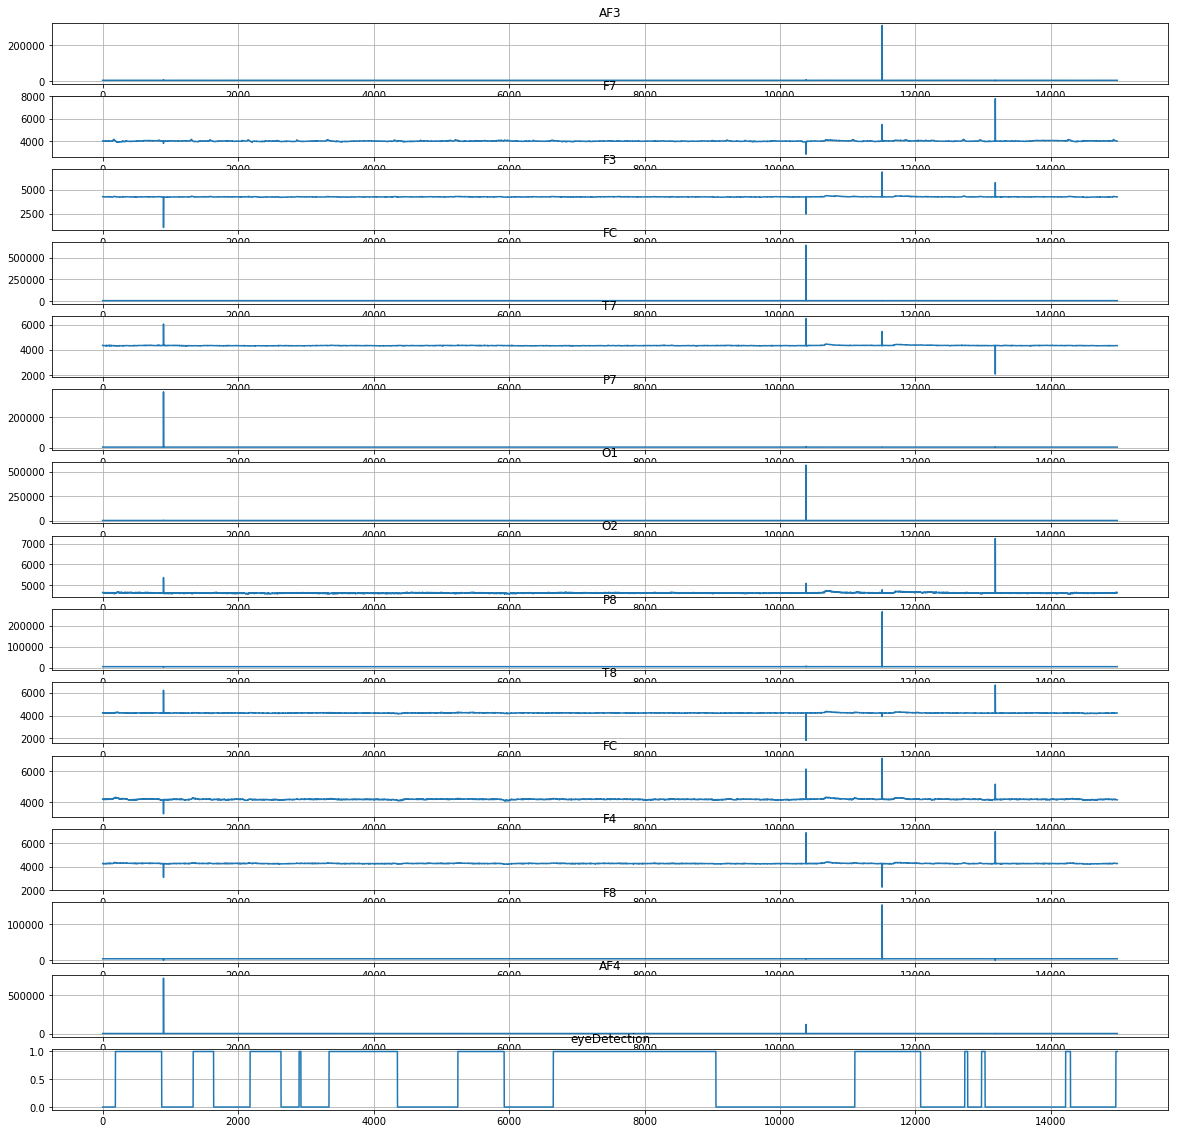

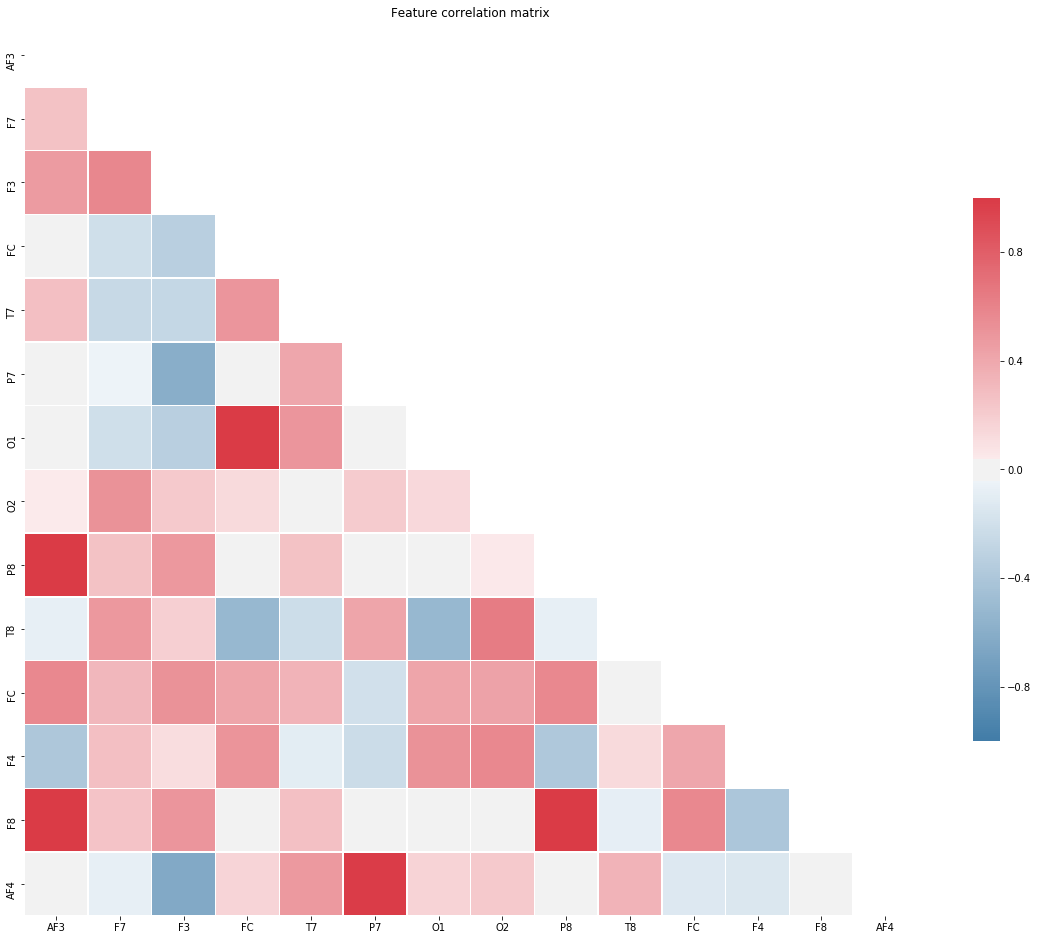

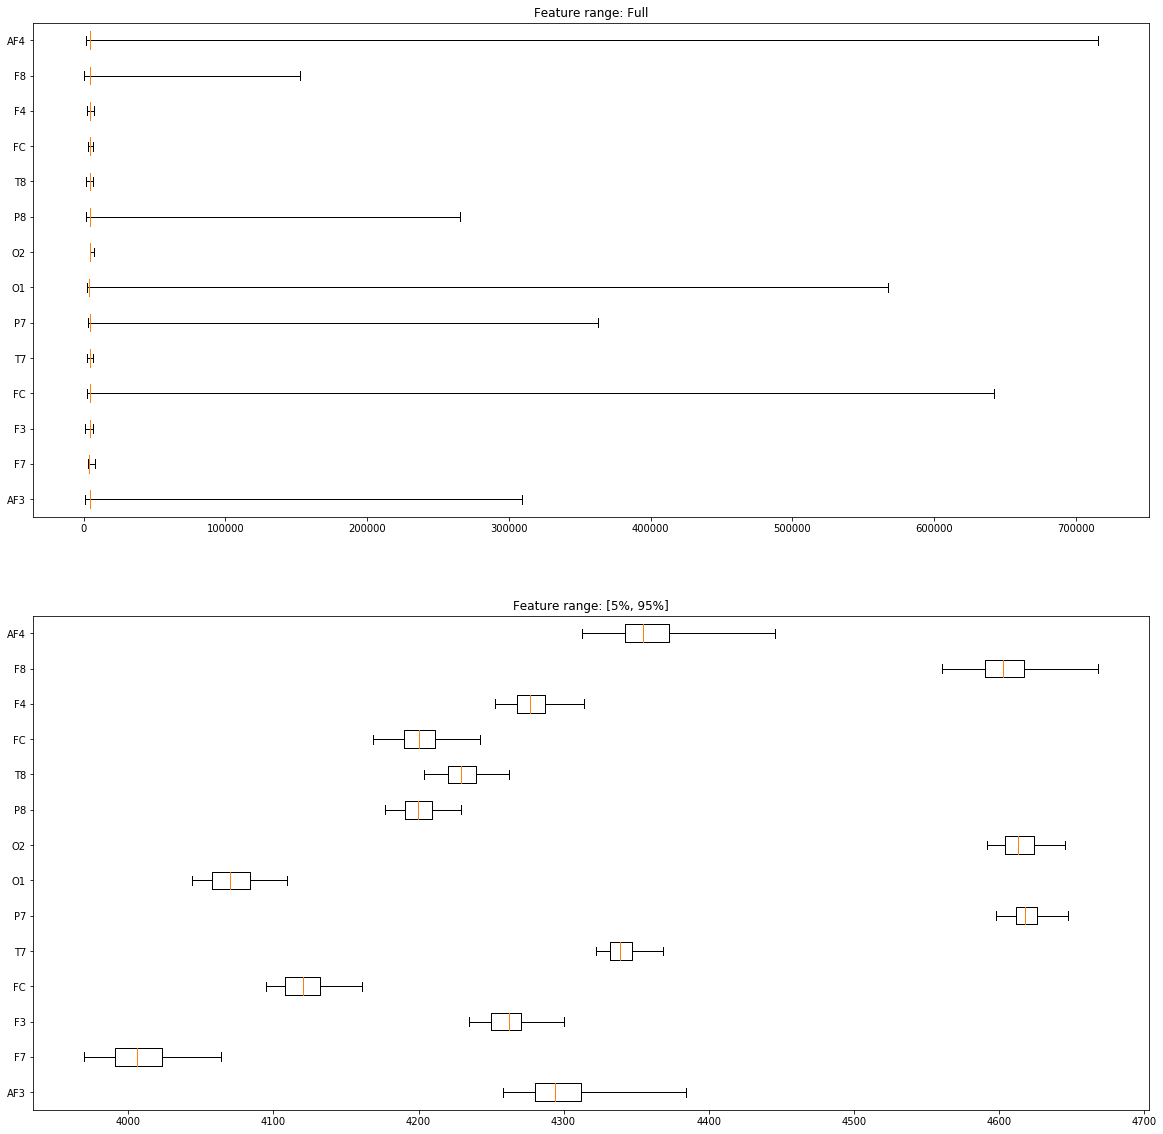

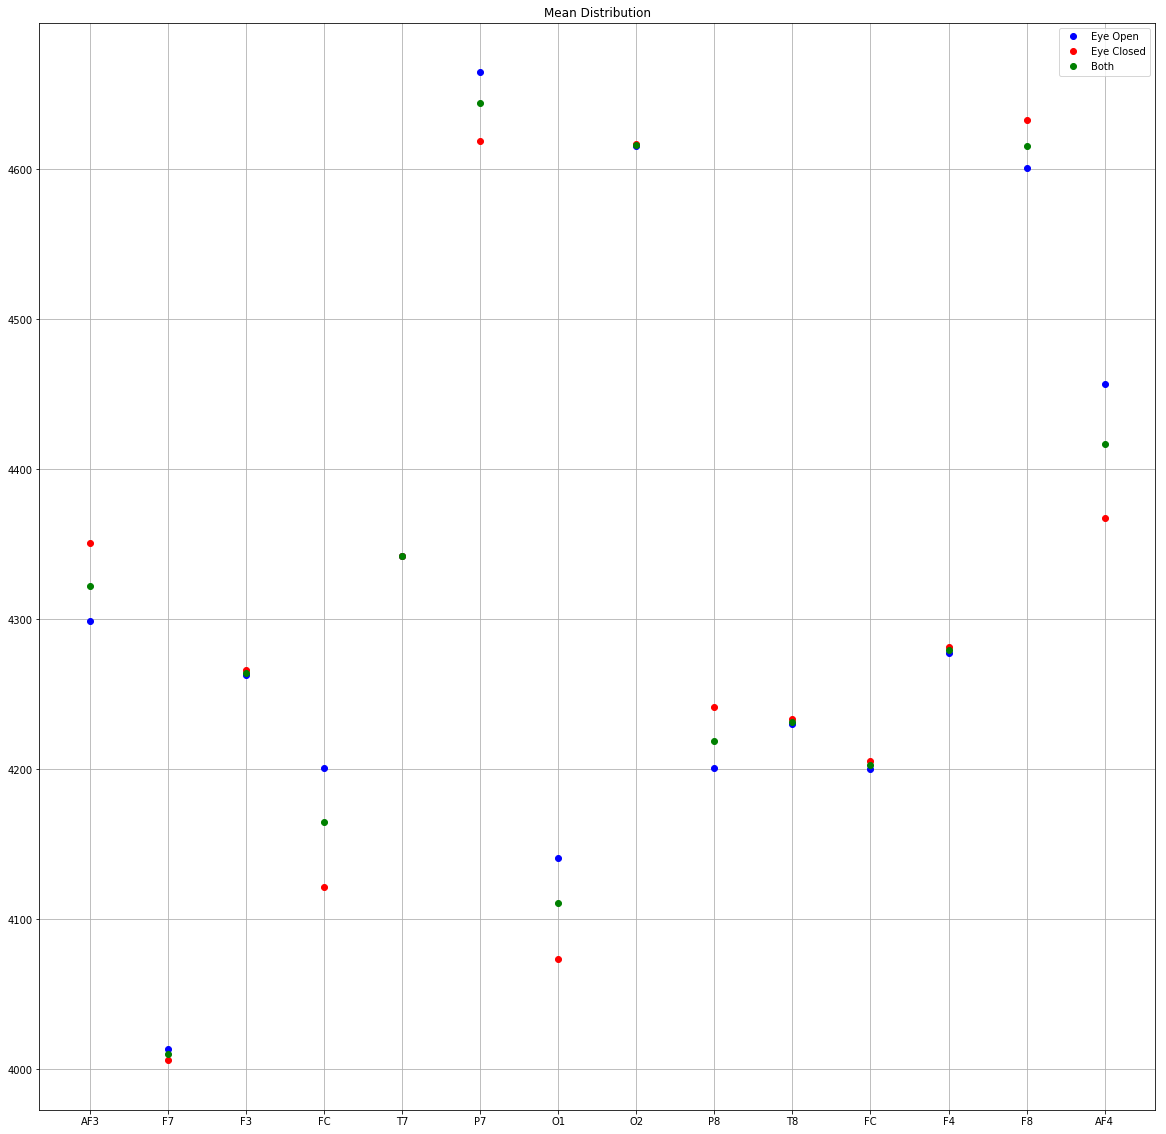

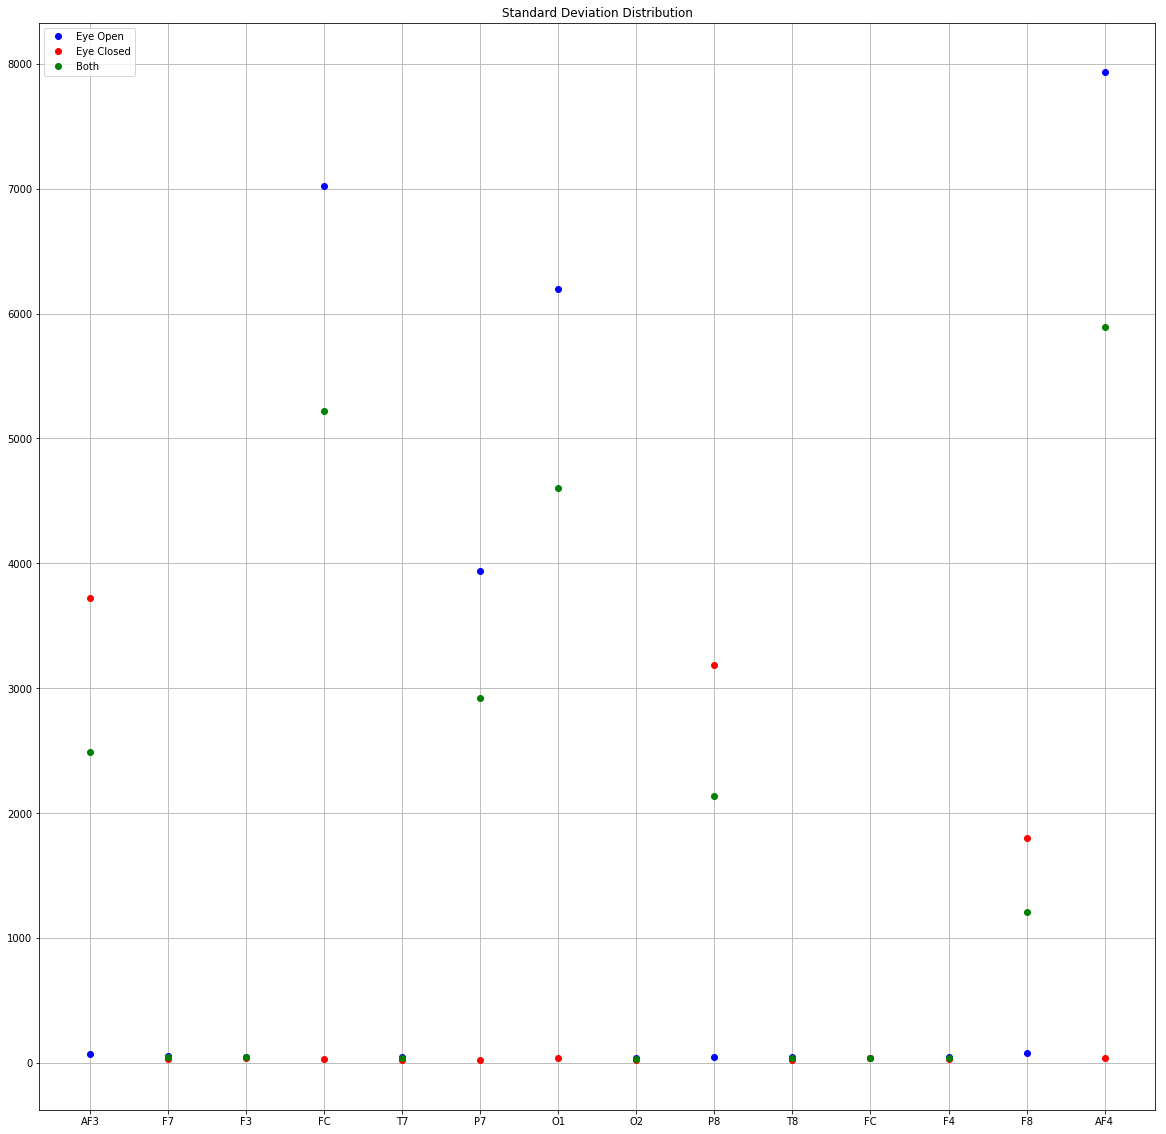

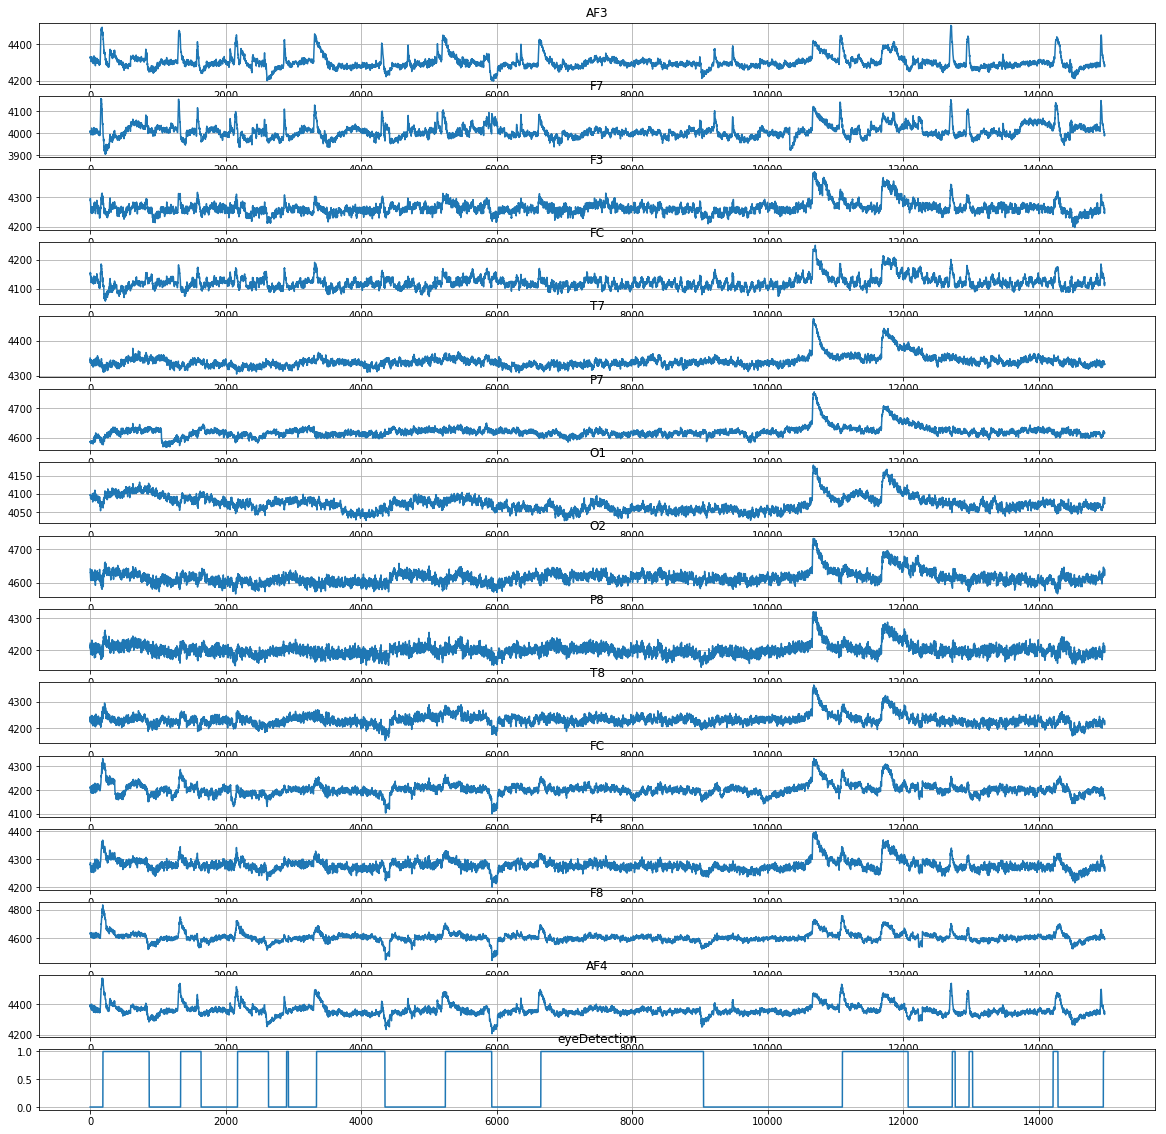

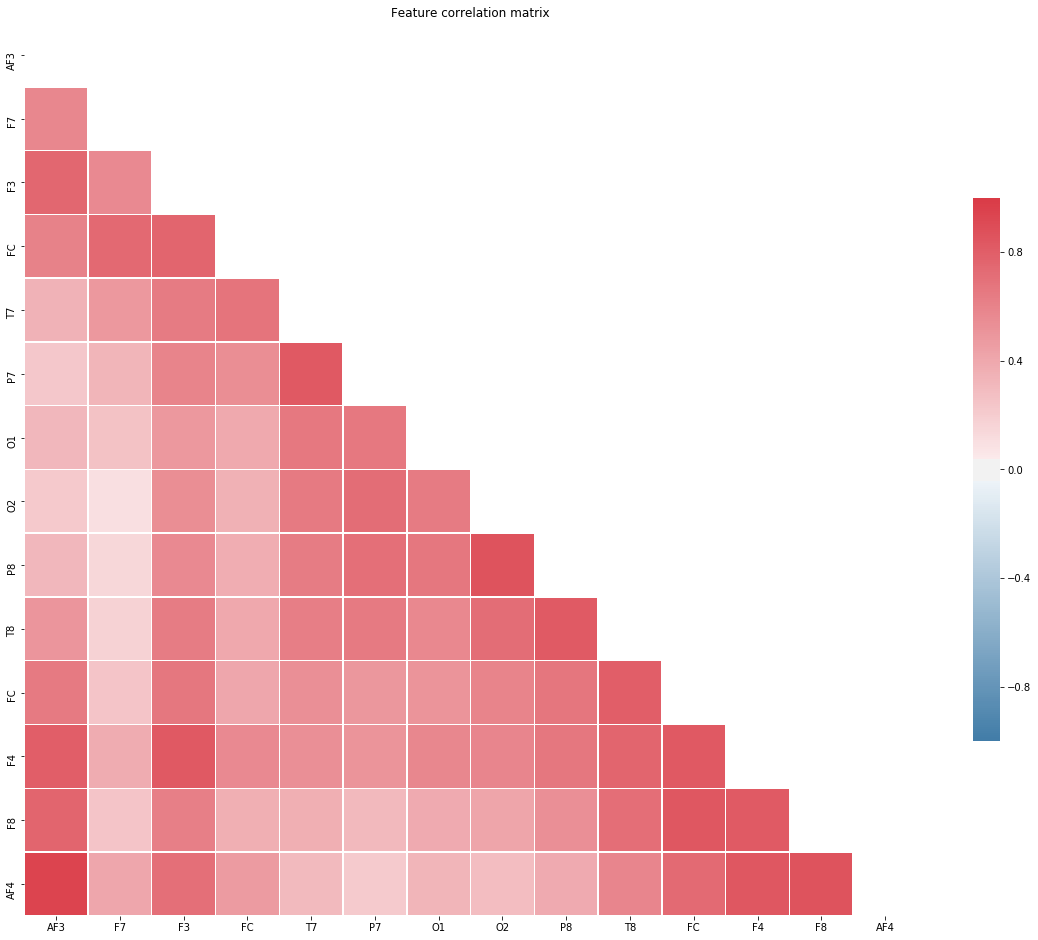

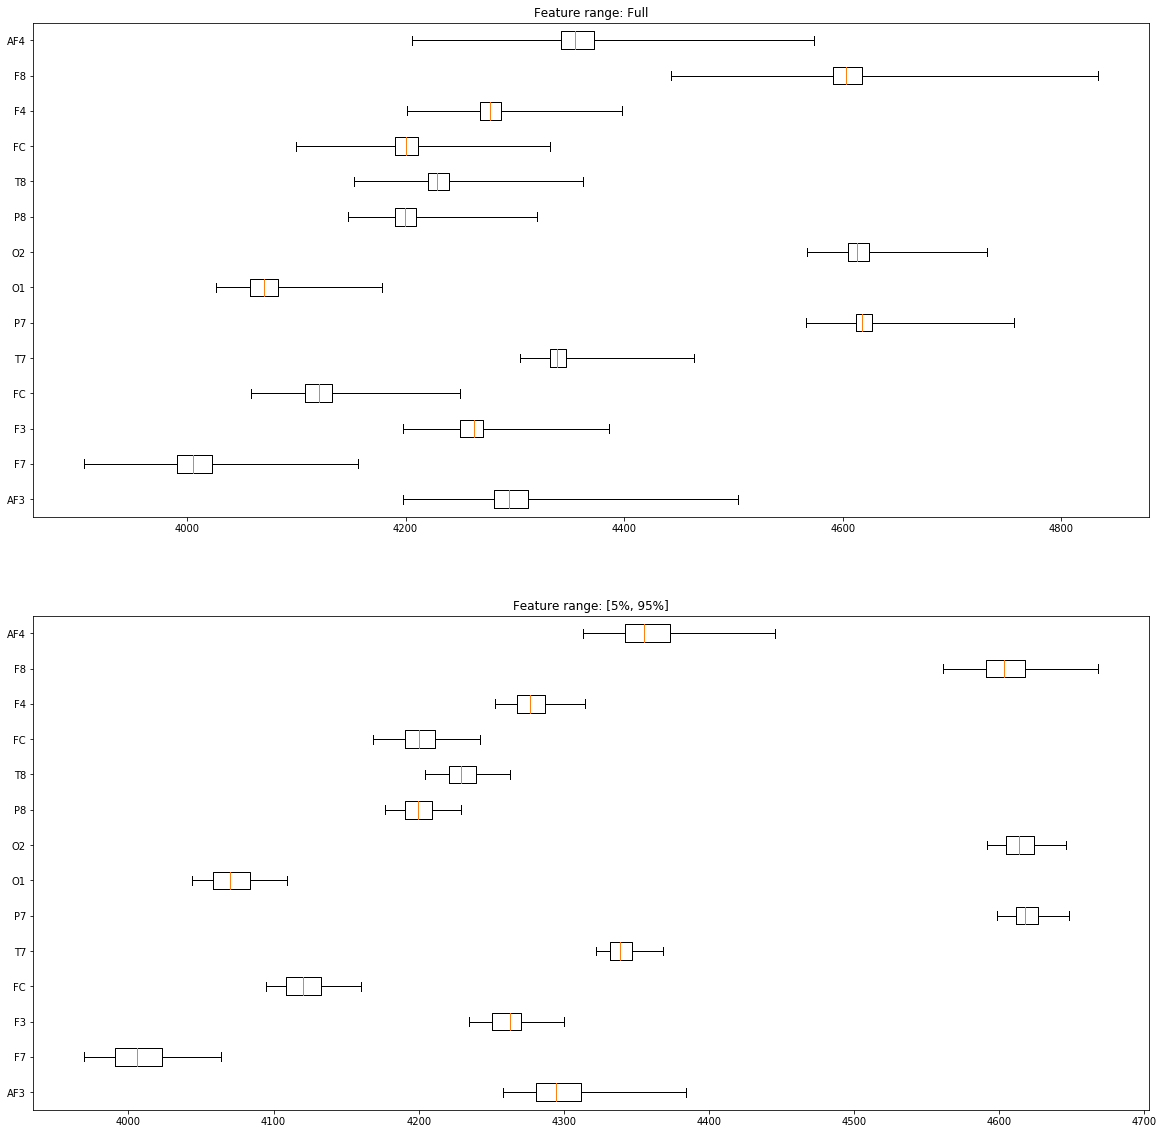

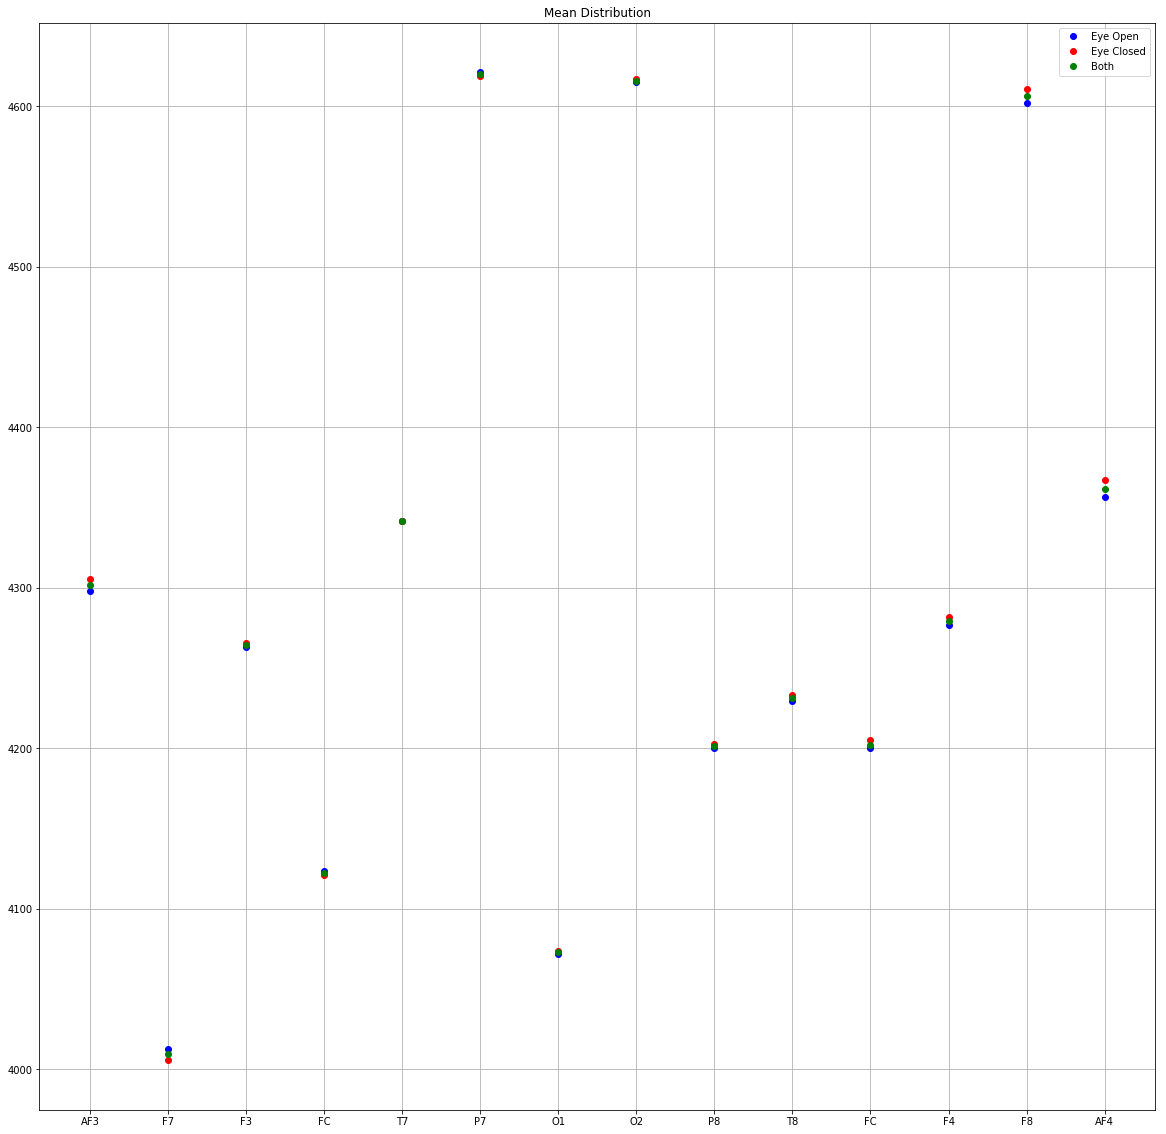

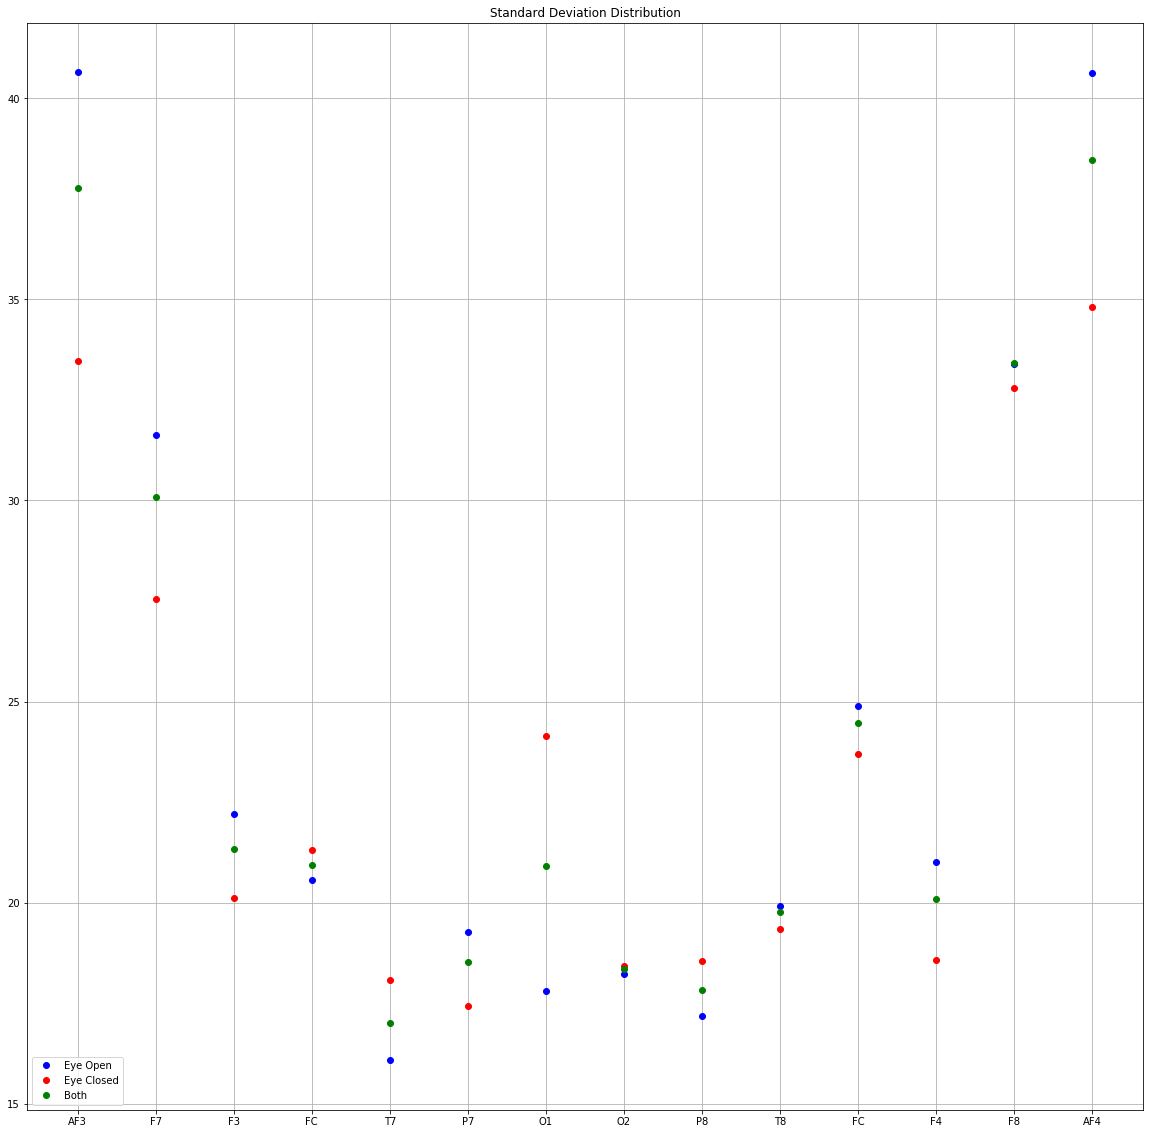

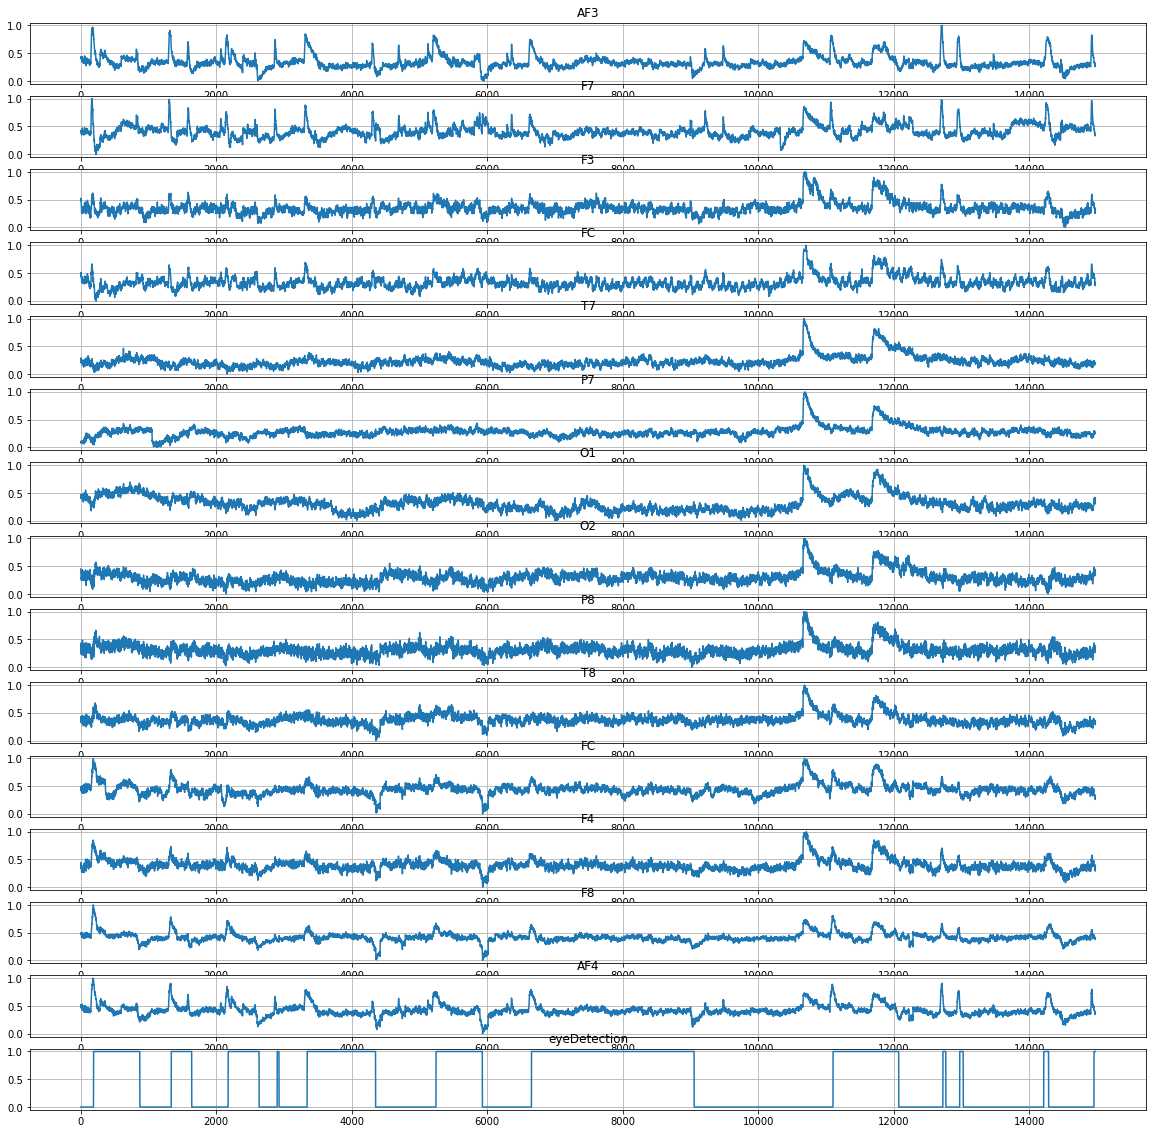

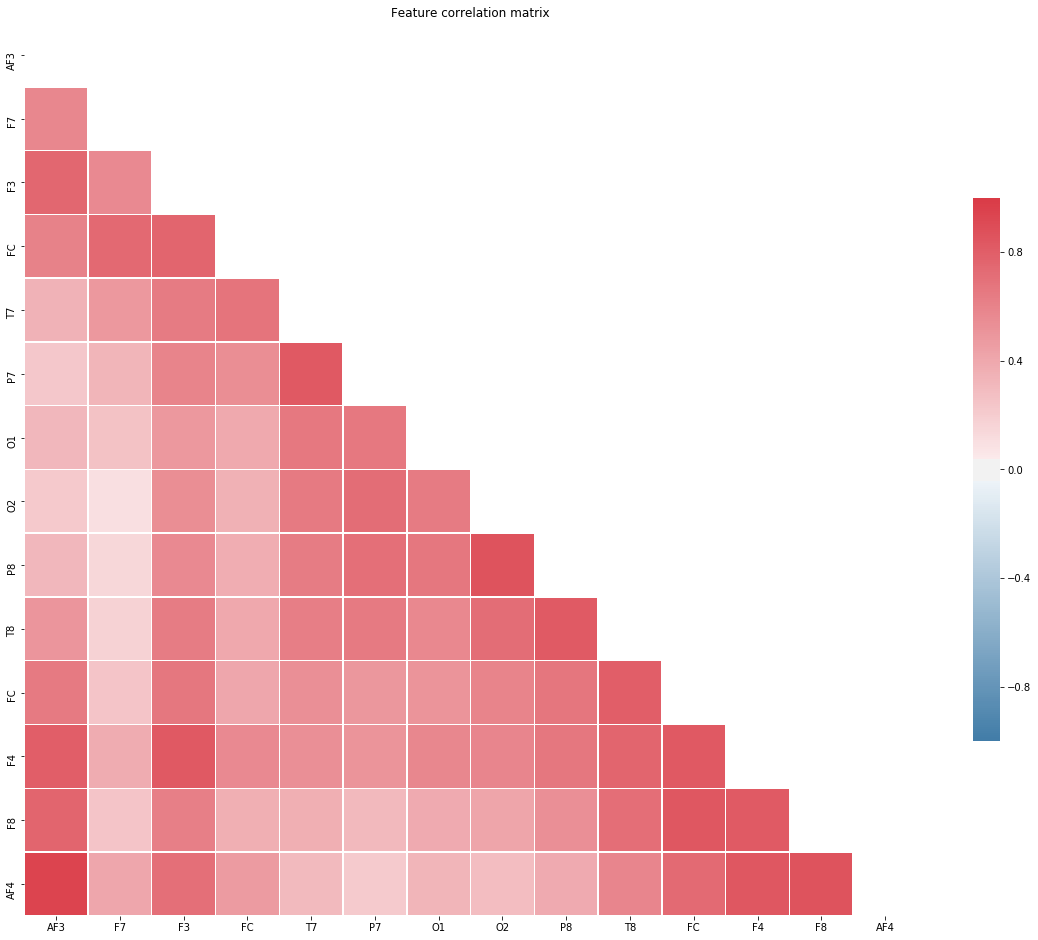

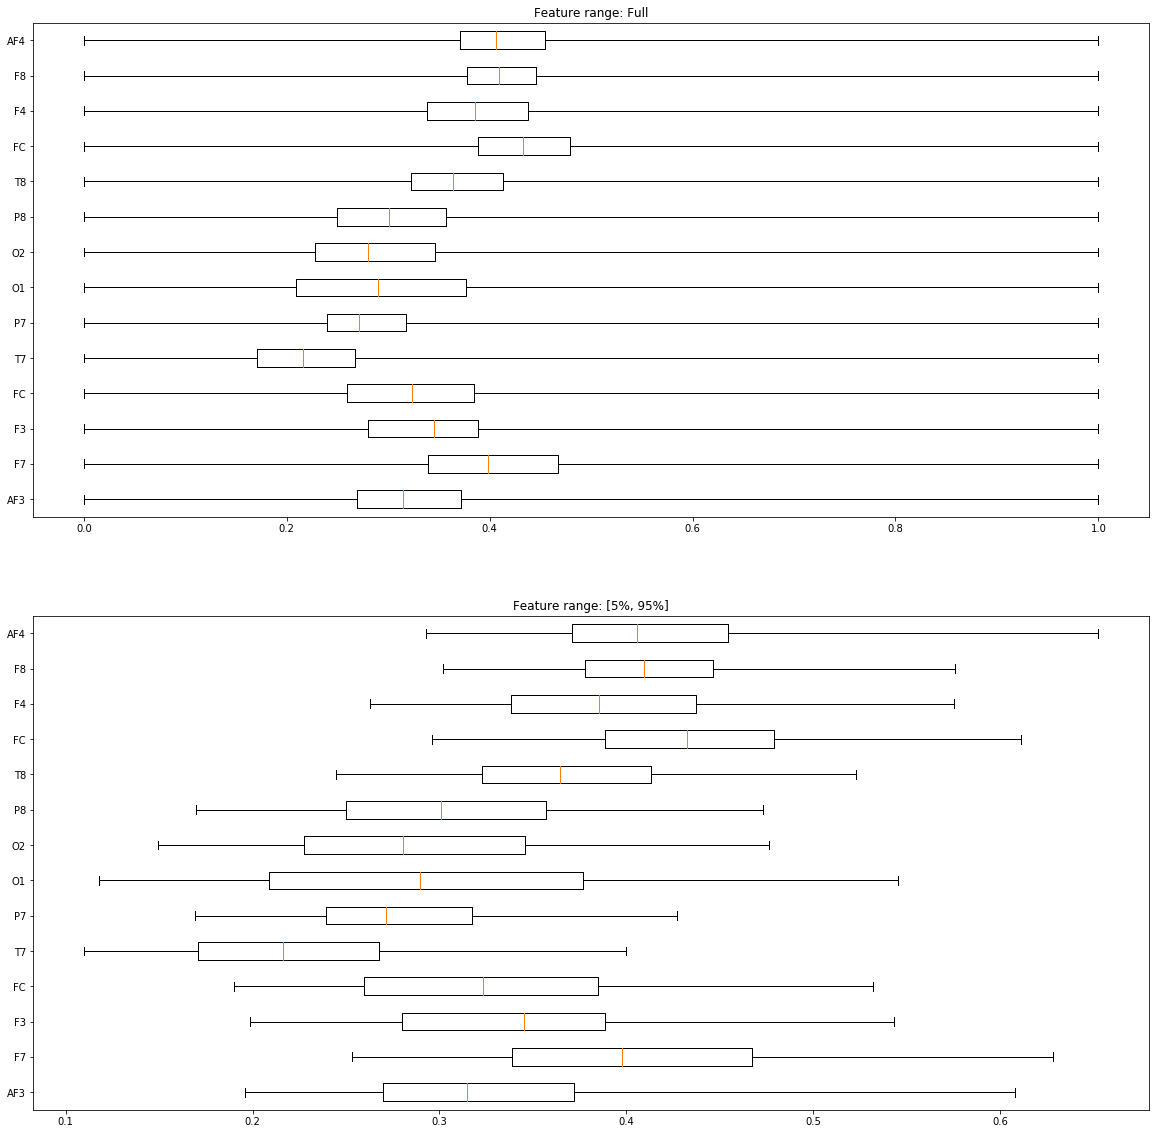

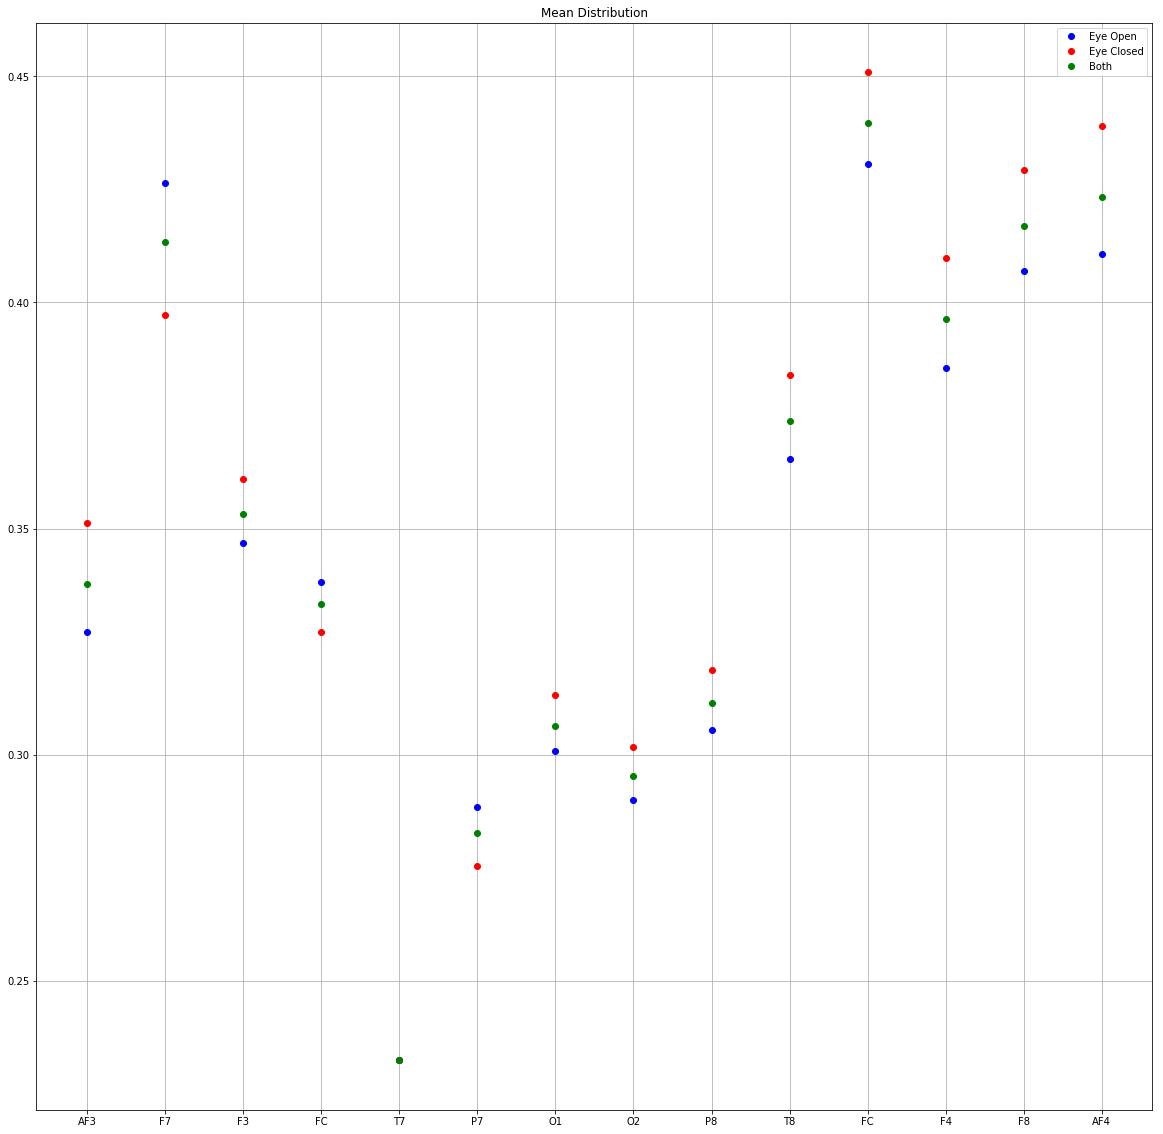

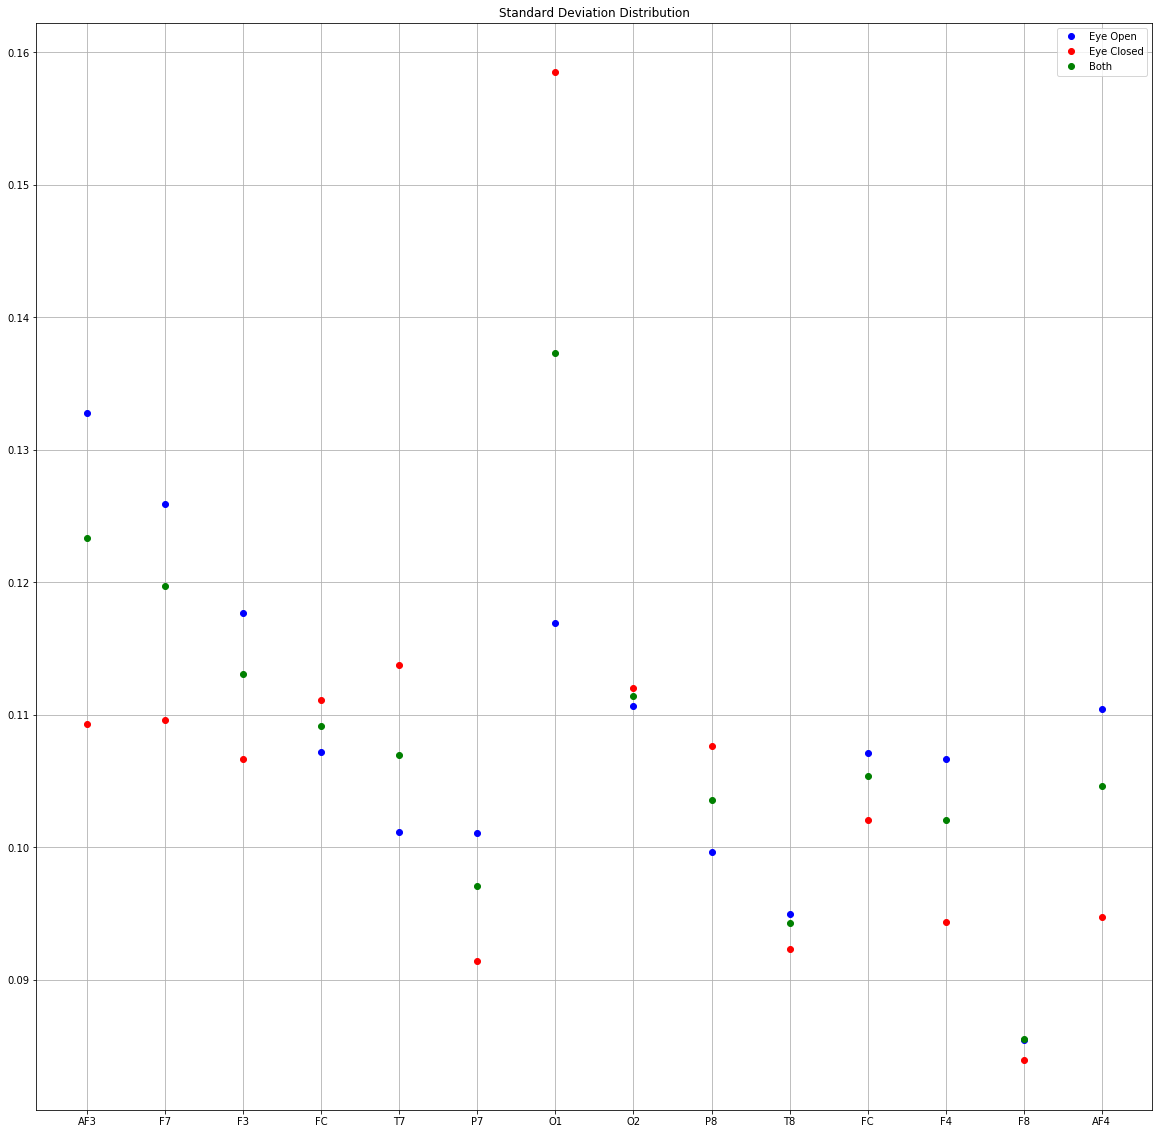

In [39]:
testID = 1

print "TestID: ", testID
predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

predictor.PlotFeatures(filePrefix='01_01_RawData')
predictor.FeatureCorrelationMatrix(filePrefix='01_02_CorrelationMatrix_RawData')
predictor.PlotBoxPlots(filePrefix='01_03_BoxPlot_RawData')
predictor.PlotMeanDistribution('01_04_MeanDistribution_RawData')
predictor.PlotStdDevDistribution('01_05_StdDevDistribution_RawData')

res = predictor.RemoveOutliers(upperLimit=5000)
predictor.PlotFeatures(filePrefix='02_01_RemovedOutliers')
predictor.FeatureCorrelationMatrix(filePrefix='02_02_CorrelationMatrix_OutliersRemoved')
predictor.PlotBoxPlots(filePrefix='02_03_BoxPlot_OutliersRemove')
predictor.PlotMeanDistribution('02_04_MeanDistribution_OutliersRemove')
predictor.PlotStdDevDistribution('02_05_StdDevDistribution_OutliersRemove')

predictor.NormalizeData()
predictor.PlotFeatures(filePrefix='03_01_NormalizedData')
predictor.FeatureCorrelationMatrix(filePrefix='03_02_CorrelationMatrix_NormalizedData')
predictor.PlotBoxPlots(filePrefix='03_03_BoxPlot_NormalizedData')
predictor.PlotMeanDistribution('03_04_MeanDistribution_NormalizedData')
predictor.PlotStdDevDistribution('03_05_StdDevDistribution_NormalizedData')

### Prediction
- Outliers not removed
- Data not normalized
- lagValue = 1
- epochCount = 50
- batchSize = 50

TestID:  2
Train on 10000 samples, validate on 4979 samples
Epoch 1/50
 - 1s - loss: 0.5747 - val_loss: 0.3738
Epoch 2/50
 - 0s - loss: 0.5426 - val_loss: 0.4612
Epoch 3/50
 - 0s - loss: 0.5241 - val_loss: 0.5487
Epoch 4/50
 - 0s - loss: 0.5056 - val_loss: 0.6361
Epoch 5/50
 - 0s - loss: 0.4871 - val_loss: 0.7236
Epoch 6/50
 - 0s - loss: 0.4578 - val_loss: 0.7092
Epoch 7/50
 - 0s - loss: 0.4662 - val_loss: 0.7258
Epoch 8/50
 - 0s - loss: 0.4585 - val_loss: 0.7063
Epoch 9/50
 - 0s - loss: 0.4677 - val_loss: 0.7296
Epoch 10/50
 - 0s - loss: 0.4578 - val_loss: 0.7097
Epoch 11/50
 - 0s - loss: 0.4662 - val_loss: 0.7263
Epoch 12/50
 - 0s - loss: 0.4585 - val_loss: 0.7068
Epoch 13/50
 - 0s - loss: 0.4677 - val_loss: 0.7301
Epoch 14/50
 - 0s - loss: 0.4578 - val_loss: 0.7102
Epoch 15/50
 - 0s - loss: 0.4662 - val_loss: 0.7268
Epoch 16/50
 - 0s - loss: 0.4586 - val_loss: 0.7073
Epoch 17/50
 - 0s - loss: 0.4677 - val_loss: 0.7306
Epoch 18/50
 - 0s - loss: 0.4571 - val_loss: 0.7039
Epoch 19/50
 

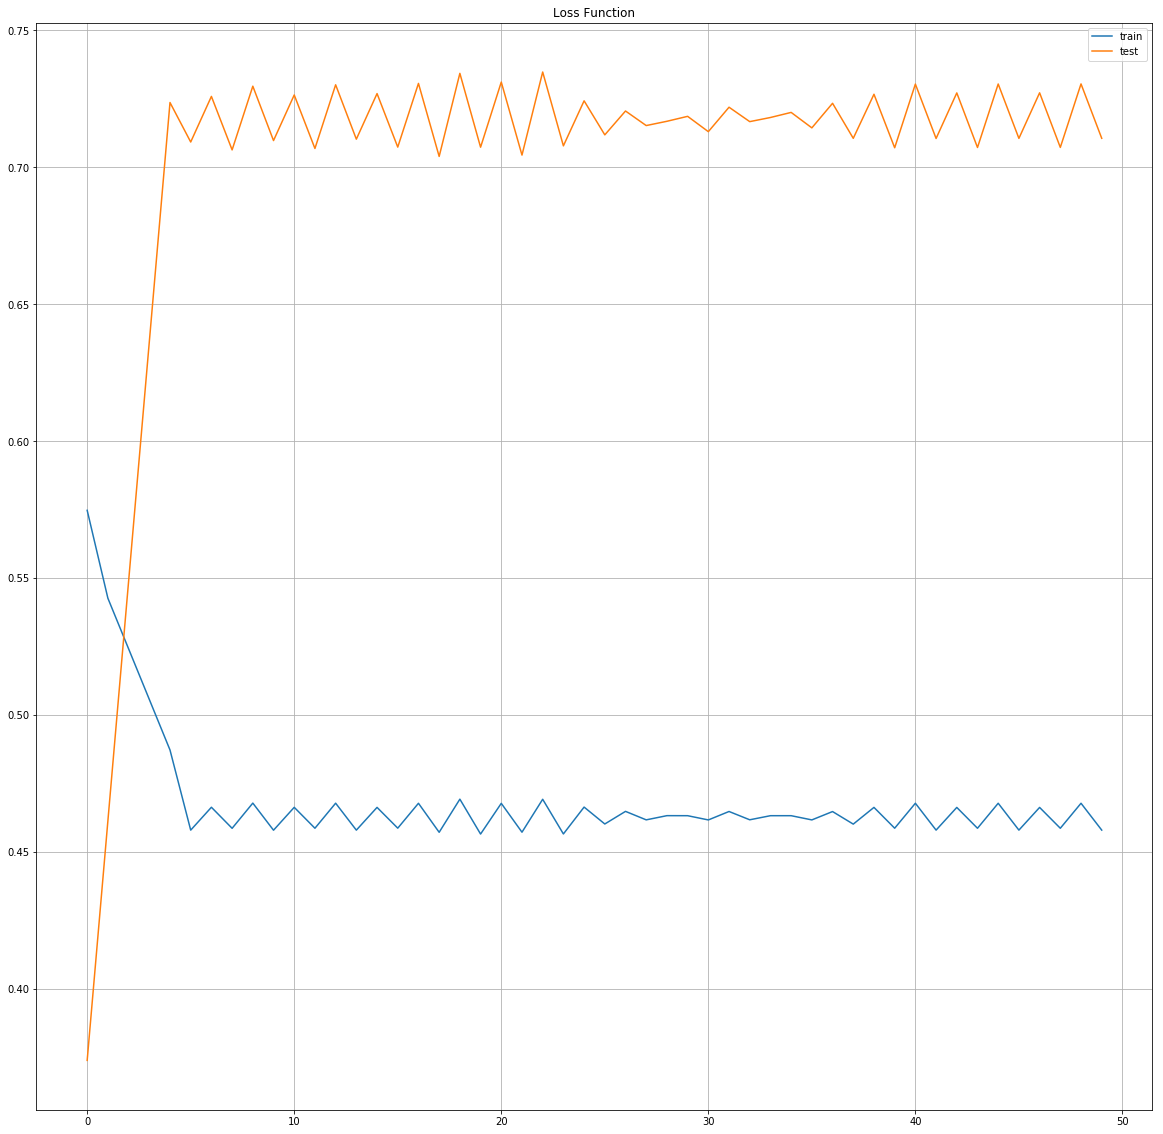

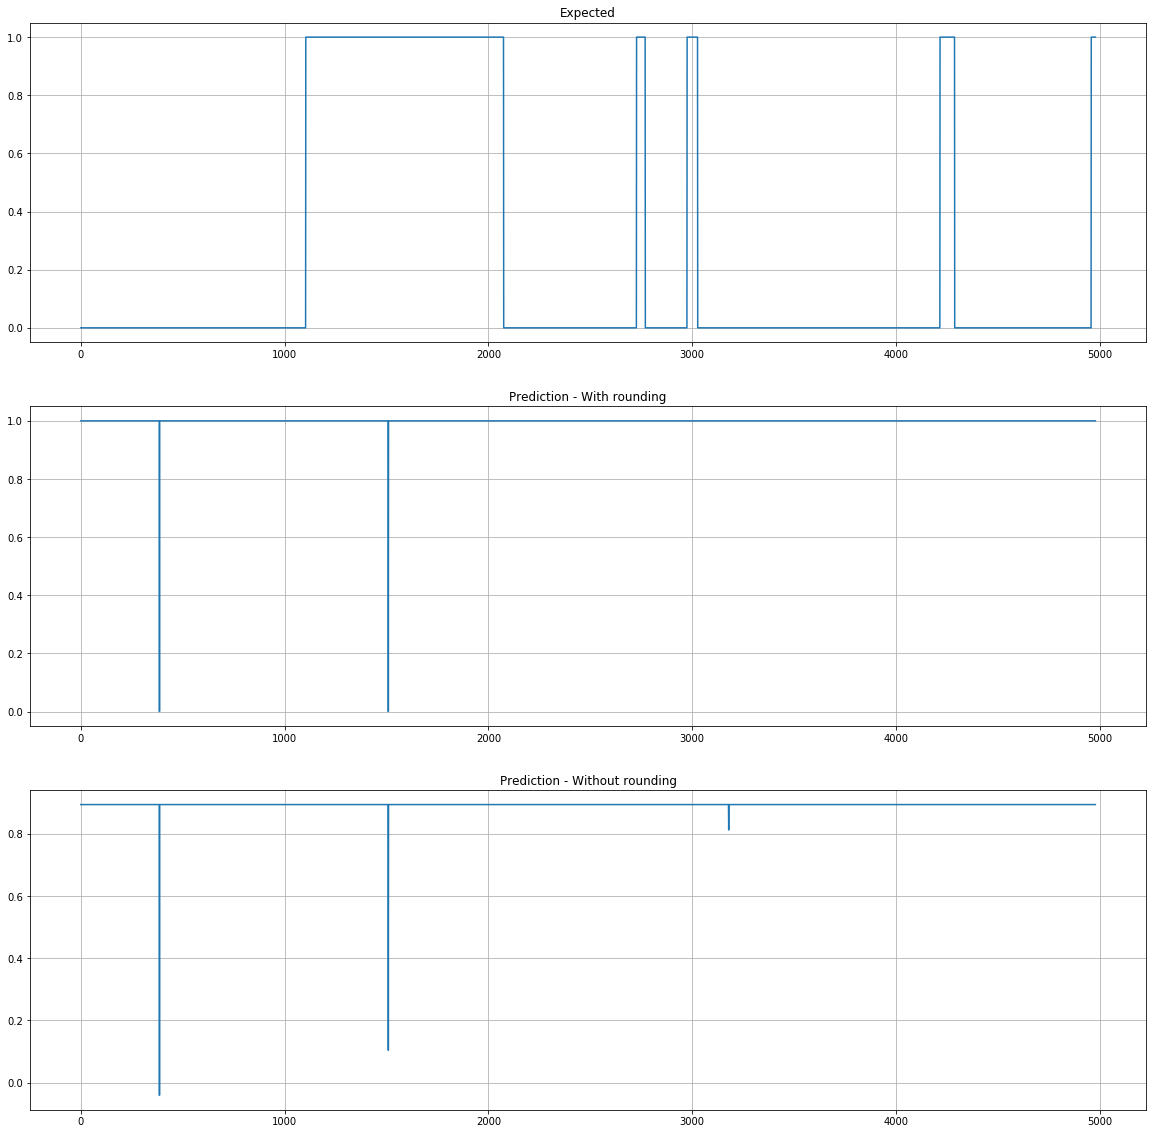

In [40]:
testID = 2
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

lagValue = 1
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

predictor.FitModel(epochCount=50
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


### Prediction
- Outliers not removed
- Data not normalized
- lagValue = 1
- epochCount = 1000
- batchSize = 50

TestID:  3
Train on 10000 samples, validate on 4979 samples
Epoch 1/1000
 - 1s - loss: 0.5578 - val_loss: 0.5983
Epoch 2/1000
 - 0s - loss: 0.4985 - val_loss: 0.7046
Epoch 3/1000
 - 0s - loss: 0.4656 - val_loss: 0.7058
Epoch 4/1000
 - 0s - loss: 0.4674 - val_loss: 0.7077
Epoch 5/1000
 - 0s - loss: 0.4673 - val_loss: 0.7100
Epoch 6/1000
 - 0s - loss: 0.4655 - val_loss: 0.7032
Epoch 7/1000
 - 0s - loss: 0.4692 - val_loss: 0.7141
Epoch 8/1000
 - 0s - loss: 0.4636 - val_loss: 0.6986
Epoch 9/1000
 - 0s - loss: 0.4710 - val_loss: 0.7182
Epoch 10/1000
 - 0s - loss: 0.4618 - val_loss: 0.6944
Epoch 11/1000
 - 0s - loss: 0.4728 - val_loss: 0.7227
Epoch 12/1000
 - 0s - loss: 0.4600 - val_loss: 0.6903
Epoch 13/1000
 - 0s - loss: 0.4747 - val_loss: 0.7271
Epoch 14/1000
 - 0s - loss: 0.4592 - val_loss: 0.6944
Epoch 15/1000
 - 0s - loss: 0.4728 - val_loss: 0.7233
Epoch 16/1000
 - 0s - loss: 0.4600 - val_loss: 0.6909
Epoch 17/1000
 - 0s - loss: 0.4731 - val_loss: 0.7189
Epoch 18/1000
 - 0s - loss: 0.4

Epoch 151/1000
 - 0s - loss: 0.4728 - val_loss: 0.7225
Epoch 152/1000
 - 0s - loss: 0.4600 - val_loss: 0.6901
Epoch 153/1000
 - 0s - loss: 0.4747 - val_loss: 0.7269
Epoch 154/1000
 - 0s - loss: 0.4592 - val_loss: 0.6942
Epoch 155/1000
 - 0s - loss: 0.4728 - val_loss: 0.7231
Epoch 156/1000
 - 0s - loss: 0.4600 - val_loss: 0.6907
Epoch 157/1000
 - 0s - loss: 0.4746 - val_loss: 0.7275
Epoch 158/1000
 - 0s - loss: 0.4592 - val_loss: 0.6948
Epoch 159/1000
 - 0s - loss: 0.4712 - val_loss: 0.7147
Epoch 160/1000
 - 0s - loss: 0.4637 - val_loss: 0.6997
Epoch 161/1000
 - 0s - loss: 0.4692 - val_loss: 0.7102
Epoch 162/1000
 - 0s - loss: 0.4655 - val_loss: 0.7038
Epoch 163/1000
 - 0s - loss: 0.4691 - val_loss: 0.7147
Epoch 164/1000
 - 0s - loss: 0.4636 - val_loss: 0.6992
Epoch 165/1000
 - 0s - loss: 0.4710 - val_loss: 0.7187
Epoch 166/1000
 - 0s - loss: 0.4618 - val_loss: 0.6945
Epoch 167/1000
 - 0s - loss: 0.4728 - val_loss: 0.7226
Epoch 168/1000
 - 0s - loss: 0.4600 - val_loss: 0.6903
Epoch 169/

Epoch 300/1000
 - 0s - loss: 0.4636 - val_loss: 0.6983
Epoch 301/1000
 - 0s - loss: 0.4710 - val_loss: 0.7178
Epoch 302/1000
 - 0s - loss: 0.4618 - val_loss: 0.6941
Epoch 303/1000
 - 0s - loss: 0.4728 - val_loss: 0.7224
Epoch 304/1000
 - 0s - loss: 0.4609 - val_loss: 0.6983
Epoch 305/1000
 - 0s - loss: 0.4710 - val_loss: 0.7184
Epoch 306/1000
 - 0s - loss: 0.4618 - val_loss: 0.6942
Epoch 307/1000
 - 0s - loss: 0.4728 - val_loss: 0.7224
Epoch 308/1000
 - 0s - loss: 0.4609 - val_loss: 0.6983
Epoch 309/1000
 - 0s - loss: 0.4710 - val_loss: 0.7185
Epoch 310/1000
 - 0s - loss: 0.4618 - val_loss: 0.6943
Epoch 311/1000
 - 0s - loss: 0.4728 - val_loss: 0.7224
Epoch 312/1000
 - 0s - loss: 0.4609 - val_loss: 0.6983
Epoch 313/1000
 - 0s - loss: 0.4710 - val_loss: 0.7185
Epoch 314/1000
 - 0s - loss: 0.4618 - val_loss: 0.6943
Epoch 315/1000
 - 0s - loss: 0.4728 - val_loss: 0.7225
Epoch 316/1000
 - 0s - loss: 0.4600 - val_loss: 0.6901
Epoch 317/1000
 - 0s - loss: 0.4747 - val_loss: 0.7269
Epoch 318/

Epoch 449/1000
 - 0s - loss: 0.4692 - val_loss: 0.7104
Epoch 450/1000
 - 0s - loss: 0.4655 - val_loss: 0.7039
Epoch 451/1000
 - 0s - loss: 0.4673 - val_loss: 0.7058
Epoch 452/1000
 - 0s - loss: 0.4673 - val_loss: 0.7080
Epoch 453/1000
 - 0s - loss: 0.4654 - val_loss: 0.7012
Epoch 454/1000
 - 0s - loss: 0.4692 - val_loss: 0.7121
Epoch 455/1000
 - 0s - loss: 0.4655 - val_loss: 0.7057
Epoch 456/1000
 - 0s - loss: 0.4673 - val_loss: 0.7075
Epoch 457/1000
 - 0s - loss: 0.4673 - val_loss: 0.7098
Epoch 458/1000
 - 0s - loss: 0.4655 - val_loss: 0.7029
Epoch 459/1000
 - 0s - loss: 0.4692 - val_loss: 0.7138
Epoch 460/1000
 - 0s - loss: 0.4636 - val_loss: 0.6983
Epoch 461/1000
 - 0s - loss: 0.4710 - val_loss: 0.7178
Epoch 462/1000
 - 0s - loss: 0.4618 - val_loss: 0.6941
Epoch 463/1000
 - 0s - loss: 0.4728 - val_loss: 0.7223
Epoch 464/1000
 - 0s - loss: 0.4609 - val_loss: 0.6982
Epoch 465/1000
 - 0s - loss: 0.4710 - val_loss: 0.7184
Epoch 466/1000
 - 0s - loss: 0.4618 - val_loss: 0.6942
Epoch 467/

Epoch 598/1000
 - 0s - loss: 0.4655 - val_loss: 0.7038
Epoch 599/1000
 - 0s - loss: 0.4691 - val_loss: 0.7147
Epoch 600/1000
 - 0s - loss: 0.4636 - val_loss: 0.6992
Epoch 601/1000
 - 0s - loss: 0.4710 - val_loss: 0.7187
Epoch 602/1000
 - 0s - loss: 0.4618 - val_loss: 0.6945
Epoch 603/1000
 - 0s - loss: 0.4728 - val_loss: 0.7226
Epoch 604/1000
 - 0s - loss: 0.4600 - val_loss: 0.6903
Epoch 605/1000
 - 0s - loss: 0.4747 - val_loss: 0.7271
Epoch 606/1000
 - 0s - loss: 0.4592 - val_loss: 0.6944
Epoch 607/1000
 - 0s - loss: 0.4728 - val_loss: 0.7232
Epoch 608/1000
 - 0s - loss: 0.4600 - val_loss: 0.6909
Epoch 609/1000
 - 0s - loss: 0.4746 - val_loss: 0.7277
Epoch 610/1000
 - 0s - loss: 0.4592 - val_loss: 0.6950
Epoch 611/1000
 - 0s - loss: 0.4711 - val_loss: 0.7149
Epoch 612/1000
 - 0s - loss: 0.4637 - val_loss: 0.6998
Epoch 613/1000
 - 0s - loss: 0.4692 - val_loss: 0.7104
Epoch 614/1000
 - 0s - loss: 0.4655 - val_loss: 0.7040
Epoch 615/1000
 - 0s - loss: 0.4673 - val_loss: 0.7058
Epoch 616/

Epoch 747/1000
 - 0s - loss: 0.4728 - val_loss: 0.7224
Epoch 748/1000
 - 0s - loss: 0.4609 - val_loss: 0.6983
Epoch 749/1000
 - 0s - loss: 0.4710 - val_loss: 0.7185
Epoch 750/1000
 - 0s - loss: 0.4618 - val_loss: 0.6943
Epoch 751/1000
 - 0s - loss: 0.4728 - val_loss: 0.7225
Epoch 752/1000
 - 0s - loss: 0.4600 - val_loss: 0.6901
Epoch 753/1000
 - 0s - loss: 0.4747 - val_loss: 0.7269
Epoch 754/1000
 - 0s - loss: 0.4592 - val_loss: 0.6942
Epoch 755/1000
 - 0s - loss: 0.4728 - val_loss: 0.7231
Epoch 756/1000
 - 0s - loss: 0.4600 - val_loss: 0.6907
Epoch 757/1000
 - 0s - loss: 0.4746 - val_loss: 0.7275
Epoch 758/1000
 - 0s - loss: 0.4592 - val_loss: 0.6948
Epoch 759/1000
 - 0s - loss: 0.4712 - val_loss: 0.7148
Epoch 760/1000
 - 0s - loss: 0.4637 - val_loss: 0.6997
Epoch 761/1000
 - 0s - loss: 0.4692 - val_loss: 0.7102
Epoch 762/1000
 - 0s - loss: 0.4655 - val_loss: 0.7038
Epoch 763/1000
 - 0s - loss: 0.4691 - val_loss: 0.7147
Epoch 764/1000
 - 0s - loss: 0.4636 - val_loss: 0.6992
Epoch 765/

Epoch 896/1000
 - 0s - loss: 0.4636 - val_loss: 0.6983
Epoch 897/1000
 - 0s - loss: 0.4710 - val_loss: 0.7178
Epoch 898/1000
 - 0s - loss: 0.4618 - val_loss: 0.6941
Epoch 899/1000
 - 0s - loss: 0.4728 - val_loss: 0.7223
Epoch 900/1000
 - 0s - loss: 0.4609 - val_loss: 0.6982
Epoch 901/1000
 - 0s - loss: 0.4710 - val_loss: 0.7184
Epoch 902/1000
 - 0s - loss: 0.4618 - val_loss: 0.6942
Epoch 903/1000
 - 0s - loss: 0.4728 - val_loss: 0.7224
Epoch 904/1000
 - 0s - loss: 0.4609 - val_loss: 0.6983
Epoch 905/1000
 - 0s - loss: 0.4710 - val_loss: 0.7185
Epoch 906/1000
 - 0s - loss: 0.4618 - val_loss: 0.6943
Epoch 907/1000
 - 0s - loss: 0.4728 - val_loss: 0.7224
Epoch 908/1000
 - 0s - loss: 0.4609 - val_loss: 0.6983
Epoch 909/1000
 - 0s - loss: 0.4710 - val_loss: 0.7185
Epoch 910/1000
 - 0s - loss: 0.4618 - val_loss: 0.6943
Epoch 911/1000
 - 0s - loss: 0.4728 - val_loss: 0.7225
Epoch 912/1000
 - 0s - loss: 0.4609 - val_loss: 0.6983
Epoch 913/1000
 - 0s - loss: 0.4710 - val_loss: 0.7185
Epoch 914/

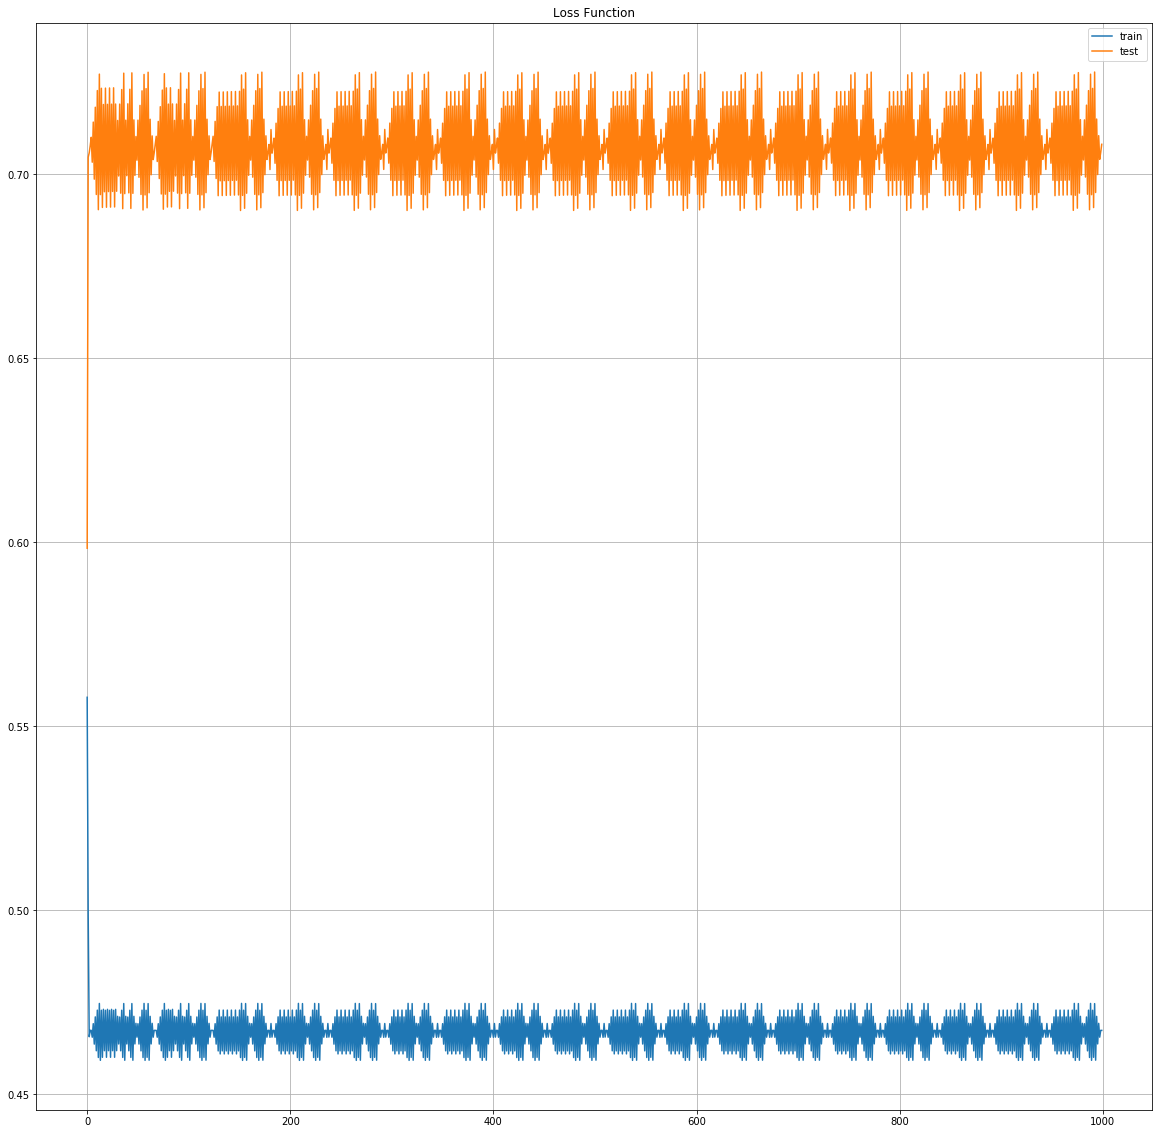

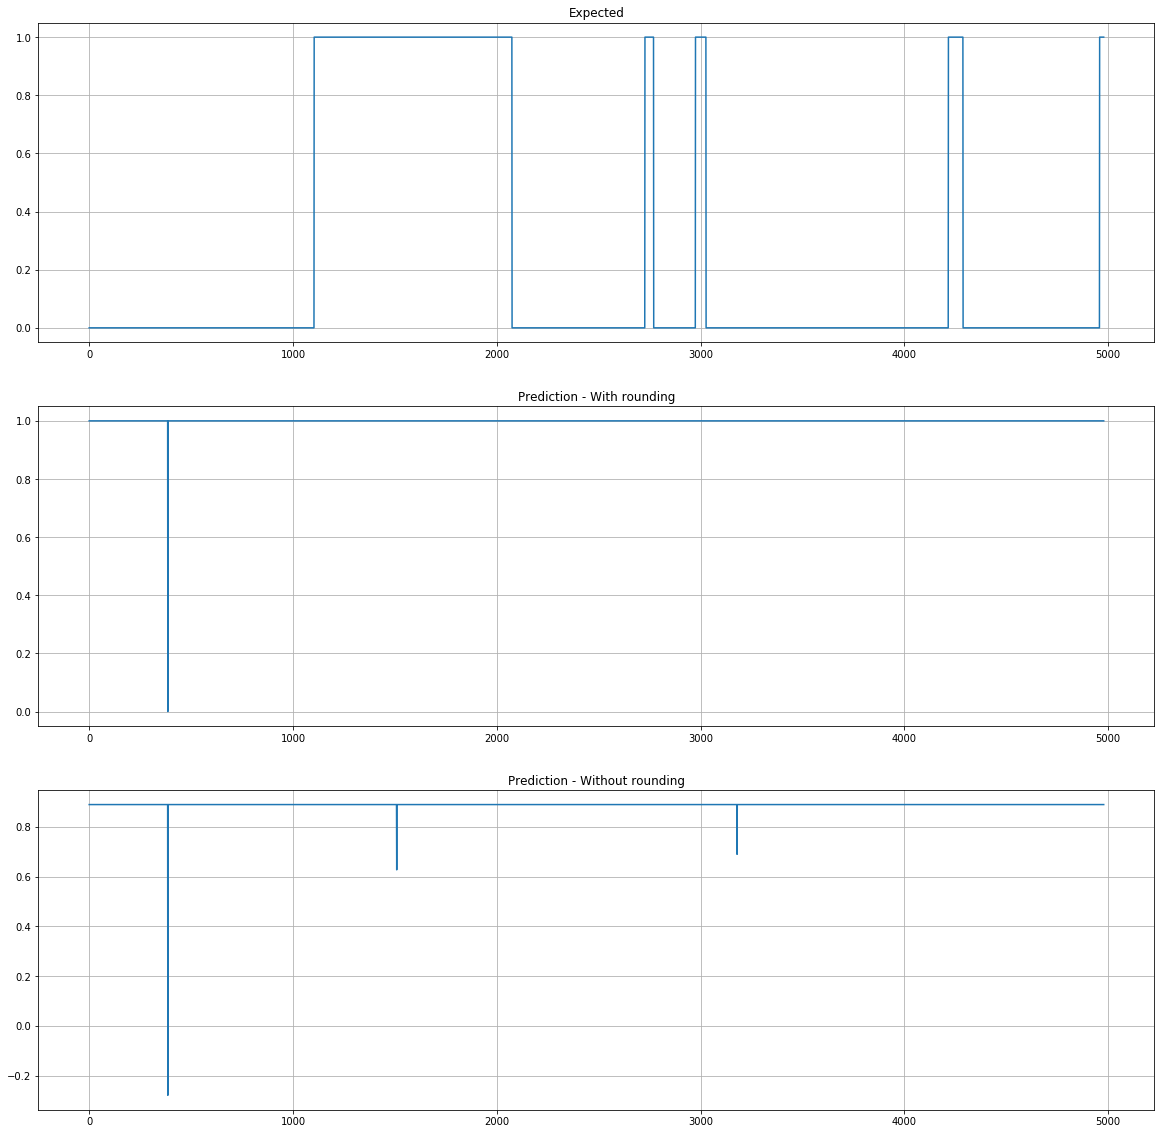

In [41]:
testID = 3
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

lagValue = 1
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

predictor.FitModel(epochCount=1000
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


### Prediction
- Outliers not removed
- Data not normalized
- lagValue = 1
- epochCount = 1000
- batchSize = 50
- lstmStackCount = 5

TestID:  4
Train on 10000 samples, validate on 4979 samples
Epoch 1/1000
 - 2s - loss: 0.5619 - val_loss: 0.3129
Epoch 2/1000
 - 1s - loss: 0.5562 - val_loss: 0.3366
Epoch 3/1000
 - 1s - loss: 0.5511 - val_loss: 0.3886
Epoch 4/1000
 - 1s - loss: 0.5454 - val_loss: 0.4420
Epoch 5/1000
 - 1s - loss: 0.5378 - val_loss: 0.5017
Epoch 6/1000
 - 1s - loss: 0.5299 - val_loss: 0.5751
Epoch 7/1000
 - 1s - loss: 0.5178 - val_loss: 0.6610
Epoch 8/1000
 - 1s - loss: 0.4909 - val_loss: 0.6766
Epoch 9/1000
 - 1s - loss: 0.4854 - val_loss: 0.6979
Epoch 10/1000
 - 1s - loss: 0.4733 - val_loss: 0.6806
Epoch 11/1000
 - 1s - loss: 0.4799 - val_loss: 0.7086
Epoch 12/1000
 - 1s - loss: 0.4686 - val_loss: 0.6887
Epoch 13/1000
 - 1s - loss: 0.4773 - val_loss: 0.7187
Epoch 14/1000
 - 1s - loss: 0.4632 - val_loss: 0.6860
Epoch 15/1000
 - 1s - loss: 0.4770 - val_loss: 0.7236
Epoch 16/1000
 - 1s - loss: 0.4616 - val_loss: 0.6948
Epoch 17/1000
 - 1s - loss: 0.4738 - val_loss: 0.7239
Epoch 18/1000
 - 1s - loss: 0.4

Epoch 151/1000
 - 1s - loss: 0.4540 - val_loss: 0.7347
Epoch 152/1000
 - 1s - loss: 0.4565 - val_loss: 0.7402
Epoch 153/1000
 - 1s - loss: 0.4538 - val_loss: 0.7334
Epoch 154/1000
 - 1s - loss: 0.4573 - val_loss: 0.7432
Epoch 155/1000
 - 1s - loss: 0.4529 - val_loss: 0.7322
Epoch 156/1000
 - 1s - loss: 0.4580 - val_loss: 0.7461
Epoch 157/1000
 - 1s - loss: 0.4520 - val_loss: 0.7311
Epoch 158/1000
 - 1s - loss: 0.4580 - val_loss: 0.7447
Epoch 159/1000
 - 2s - loss: 0.4519 - val_loss: 0.7302
Epoch 160/1000
 - 2s - loss: 0.4587 - val_loss: 0.7479
Epoch 161/1000
 - 2s - loss: 0.4511 - val_loss: 0.7295
Epoch 162/1000
 - 1s - loss: 0.4587 - val_loss: 0.7469
Epoch 163/1000
 - 1s - loss: 0.4514 - val_loss: 0.7325
Epoch 164/1000
 - 1s - loss: 0.4571 - val_loss: 0.7427
Epoch 165/1000
 - 1s - loss: 0.4535 - val_loss: 0.7360
Epoch 166/1000
 - 1s - loss: 0.4560 - val_loss: 0.7414
Epoch 167/1000
 - 1s - loss: 0.4533 - val_loss: 0.7349
Epoch 168/1000
 - 1s - loss: 0.4567 - val_loss: 0.7443
Epoch 169/

Epoch 300/1000
 - 1s - loss: 0.4488 - val_loss: 0.7449
Epoch 301/1000
 - 1s - loss: 0.4522 - val_loss: 0.7514
Epoch 302/1000
 - 1s - loss: 0.4495 - val_loss: 0.7452
Epoch 303/1000
 - 1s - loss: 0.4525 - val_loss: 0.7538
Epoch 304/1000
 - 1s - loss: 0.4487 - val_loss: 0.7450
Epoch 305/1000
 - 1s - loss: 0.4524 - val_loss: 0.7536
Epoch 306/1000
 - 1s - loss: 0.4488 - val_loss: 0.7450
Epoch 307/1000
 - 1s - loss: 0.4524 - val_loss: 0.7536
Epoch 308/1000
 - 1s - loss: 0.4486 - val_loss: 0.7451
Epoch 309/1000
 - 1s - loss: 0.4523 - val_loss: 0.7537
Epoch 310/1000
 - 1s - loss: 0.4487 - val_loss: 0.7451
Epoch 311/1000
 - 1s - loss: 0.4521 - val_loss: 0.7521
Epoch 312/1000
 - 1s - loss: 0.4497 - val_loss: 0.7481
Epoch 313/1000
 - 1s - loss: 0.4512 - val_loss: 0.7516
Epoch 314/1000
 - 1s - loss: 0.4496 - val_loss: 0.7479
Epoch 315/1000
 - 1s - loss: 0.4511 - val_loss: 0.7515
Epoch 316/1000
 - 1s - loss: 0.4495 - val_loss: 0.7479
Epoch 317/1000
 - 1s - loss: 0.4515 - val_loss: 0.7539
Epoch 318/

Epoch 449/1000
 - 1s - loss: 0.4485 - val_loss: 0.7613
Epoch 450/1000
 - 1s - loss: 0.4460 - val_loss: 0.7573
Epoch 451/1000
 - 1s - loss: 0.4476 - val_loss: 0.7599
Epoch 452/1000
 - 1s - loss: 0.4463 - val_loss: 0.7572
Epoch 453/1000
 - 1s - loss: 0.4471 - val_loss: 0.7572
Epoch 454/1000
 - 1s - loss: 0.4475 - val_loss: 0.7596
Epoch 455/1000
 - 1s - loss: 0.4464 - val_loss: 0.7570
Epoch 456/1000
 - 1s - loss: 0.4477 - val_loss: 0.7606
Epoch 457/1000
 - 1s - loss: 0.4462 - val_loss: 0.7568
Epoch 458/1000
 - 1s - loss: 0.4477 - val_loss: 0.7604
Epoch 459/1000
 - 1s - loss: 0.4461 - val_loss: 0.7566
Epoch 460/1000
 - 1s - loss: 0.4477 - val_loss: 0.7603
Epoch 461/1000
 - 1s - loss: 0.4461 - val_loss: 0.7567
Epoch 462/1000
 - 1s - loss: 0.4479 - val_loss: 0.7615
Epoch 463/1000
 - 1s - loss: 0.4459 - val_loss: 0.7578
Epoch 464/1000
 - 1s - loss: 0.4473 - val_loss: 0.7603
Epoch 465/1000
 - 1s - loss: 0.4463 - val_loss: 0.7579
Epoch 466/1000
 - 1s - loss: 0.4473 - val_loss: 0.7601
Epoch 467/

Epoch 598/1000
 - 2s - loss: 0.4465 - val_loss: 0.7608
Epoch 599/1000
 - 2s - loss: 0.4461 - val_loss: 0.7601
Epoch 600/1000
 - 1s - loss: 0.4463 - val_loss: 0.7603
Epoch 601/1000
 - 1s - loss: 0.4463 - val_loss: 0.7606
Epoch 602/1000
 - 1s - loss: 0.4459 - val_loss: 0.7588
Epoch 603/1000
 - 1s - loss: 0.4469 - val_loss: 0.7621
Epoch 604/1000
 - 1s - loss: 0.4454 - val_loss: 0.7583
Epoch 605/1000
 - 1s - loss: 0.4471 - val_loss: 0.7626
Epoch 606/1000
 - 1s - loss: 0.4453 - val_loss: 0.7588
Epoch 607/1000
 - 1s - loss: 0.4469 - val_loss: 0.7621
Epoch 608/1000
 - 2s - loss: 0.4454 - val_loss: 0.7584
Epoch 609/1000
 - 2s - loss: 0.4469 - val_loss: 0.7616
Epoch 610/1000
 - 2s - loss: 0.4456 - val_loss: 0.7589
Epoch 611/1000
 - 2s - loss: 0.4469 - val_loss: 0.7622
Epoch 612/1000
 - 1s - loss: 0.4454 - val_loss: 0.7584
Epoch 613/1000
 - 1s - loss: 0.4469 - val_loss: 0.7616
Epoch 614/1000
 - 1s - loss: 0.4456 - val_loss: 0.7589
Epoch 615/1000
 - 1s - loss: 0.4469 - val_loss: 0.7621
Epoch 616/

Epoch 747/1000
 - 1s - loss: 0.4454 - val_loss: 0.7583
Epoch 748/1000
 - 1s - loss: 0.4471 - val_loss: 0.7625
Epoch 749/1000
 - 1s - loss: 0.4453 - val_loss: 0.7588
Epoch 750/1000
 - 1s - loss: 0.4469 - val_loss: 0.7621
Epoch 751/1000
 - 2s - loss: 0.4454 - val_loss: 0.7583
Epoch 752/1000
 - 2s - loss: 0.4471 - val_loss: 0.7626
Epoch 753/1000
 - 2s - loss: 0.4453 - val_loss: 0.7588
Epoch 754/1000
 - 1s - loss: 0.4467 - val_loss: 0.7611
Epoch 755/1000
 - 1s - loss: 0.4458 - val_loss: 0.7594
Epoch 756/1000
 - 1s - loss: 0.4467 - val_loss: 0.7616
Epoch 757/1000
 - 1s - loss: 0.4456 - val_loss: 0.7588
Epoch 758/1000
 - 1s - loss: 0.4469 - val_loss: 0.7621
Epoch 759/1000
 - 1s - loss: 0.4454 - val_loss: 0.7584
Epoch 760/1000
 - 1s - loss: 0.4471 - val_loss: 0.7626
Epoch 761/1000
 - 1s - loss: 0.4453 - val_loss: 0.7588
Epoch 762/1000
 - 1s - loss: 0.4467 - val_loss: 0.7611
Epoch 763/1000
 - 1s - loss: 0.4458 - val_loss: 0.7594
Epoch 764/1000
 - 1s - loss: 0.4467 - val_loss: 0.7616
Epoch 765/

Epoch 896/1000
 - 1s - loss: 0.4465 - val_loss: 0.7606
Epoch 897/1000
 - 1s - loss: 0.4461 - val_loss: 0.7599
Epoch 898/1000
 - 1s - loss: 0.4463 - val_loss: 0.7601
Epoch 899/1000
 - 1s - loss: 0.4463 - val_loss: 0.7604
Epoch 900/1000
 - 1s - loss: 0.4460 - val_loss: 0.7596
Epoch 901/1000
 - 1s - loss: 0.4465 - val_loss: 0.7608
Epoch 902/1000
 - 1s - loss: 0.4461 - val_loss: 0.7601
Epoch 903/1000
 - 1s - loss: 0.4463 - val_loss: 0.7603
Epoch 904/1000
 - 1s - loss: 0.4463 - val_loss: 0.7606
Epoch 905/1000
 - 1s - loss: 0.4461 - val_loss: 0.7598
Epoch 906/1000
 - 1s - loss: 0.4465 - val_loss: 0.7610
Epoch 907/1000
 - 1s - loss: 0.4458 - val_loss: 0.7592
Epoch 908/1000
 - 1s - loss: 0.4467 - val_loss: 0.7615
Epoch 909/1000
 - 1s - loss: 0.4456 - val_loss: 0.7588
Epoch 910/1000
 - 1s - loss: 0.4469 - val_loss: 0.7620
Epoch 911/1000
 - 1s - loss: 0.4455 - val_loss: 0.7592
Epoch 912/1000
 - 1s - loss: 0.4467 - val_loss: 0.7616
Epoch 913/1000
 - 2s - loss: 0.4456 - val_loss: 0.7588
Epoch 914/

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Results:
Accuracy: 23.2777666198%
Precision: 5.41854418806%
Recall: 23.2777666198%
FMeasure: 8.79078902325%

Execution time: 1349.10736704secs


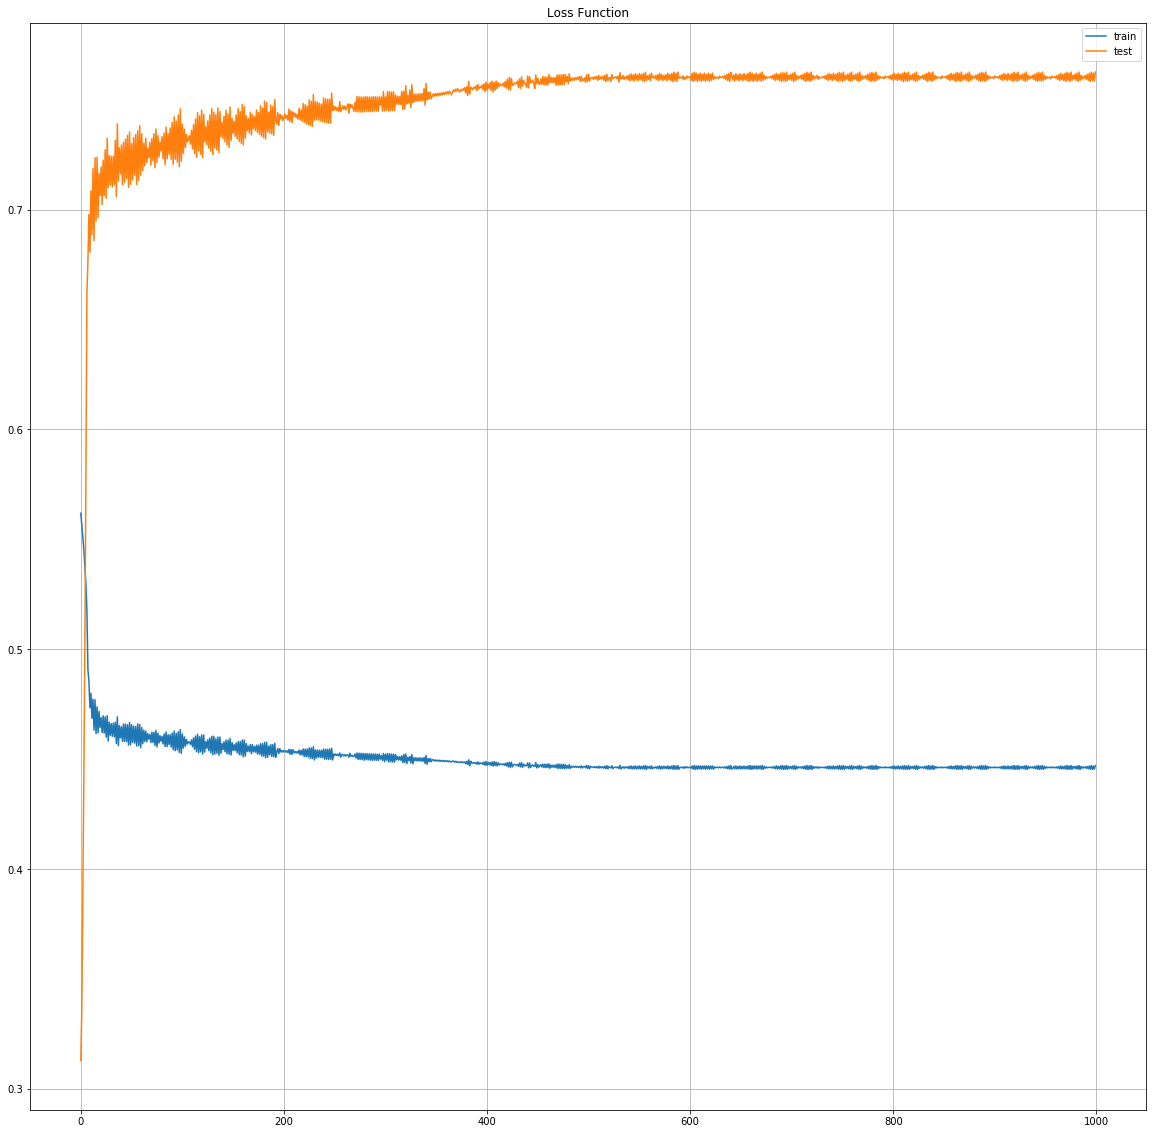

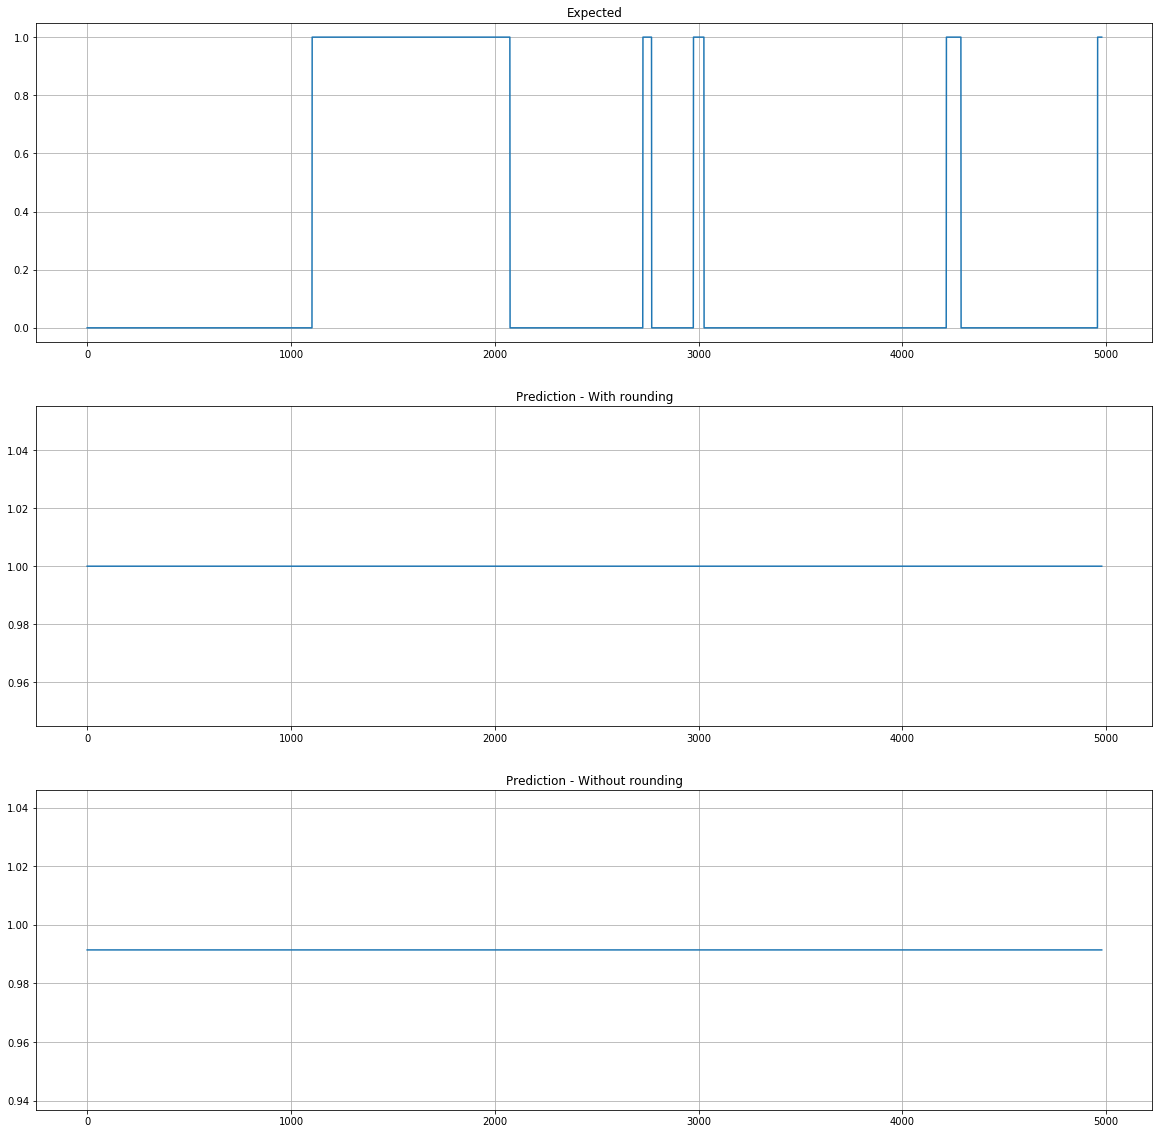

In [42]:
testID = 4
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

lagValue = 1
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=5)

predictor.FitModel(epochCount=1000
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


TestID:  5
Train on 10000 samples, validate on 4975 samples
Epoch 1/50
 - 1s - loss: 0.3954 - val_loss: 0.1603
Epoch 2/50
 - 0s - loss: 0.0785 - val_loss: 0.0727
Epoch 3/50
 - 0s - loss: 0.0397 - val_loss: 0.0481
Epoch 4/50
 - 0s - loss: 0.0270 - val_loss: 0.0497
Epoch 5/50
 - 0s - loss: 0.0279 - val_loss: 0.0386
Epoch 6/50
 - 0s - loss: 0.0240 - val_loss: 0.0217
Epoch 7/50
 - 0s - loss: 0.0231 - val_loss: 0.0454
Epoch 8/50
 - 0s - loss: 0.0251 - val_loss: 0.0211
Epoch 9/50
 - 0s - loss: 0.0183 - val_loss: 0.0475
Epoch 10/50
 - 0s - loss: 0.0186 - val_loss: 0.0439
Epoch 11/50
 - 0s - loss: 0.0160 - val_loss: 0.0296
Epoch 12/50
 - 0s - loss: 0.0123 - val_loss: 0.0171
Epoch 13/50
 - 0s - loss: 0.0107 - val_loss: 0.0185
Epoch 14/50
 - 0s - loss: 0.0201 - val_loss: 0.0230
Epoch 15/50
 - 0s - loss: 0.0254 - val_loss: 0.0265
Epoch 16/50
 - 0s - loss: 0.0163 - val_loss: 0.0157
Epoch 17/50
 - 0s - loss: 0.0101 - val_loss: 0.0194
Epoch 18/50
 - 0s - loss: 0.0117 - val_loss: 0.0105
Epoch 19/50
 

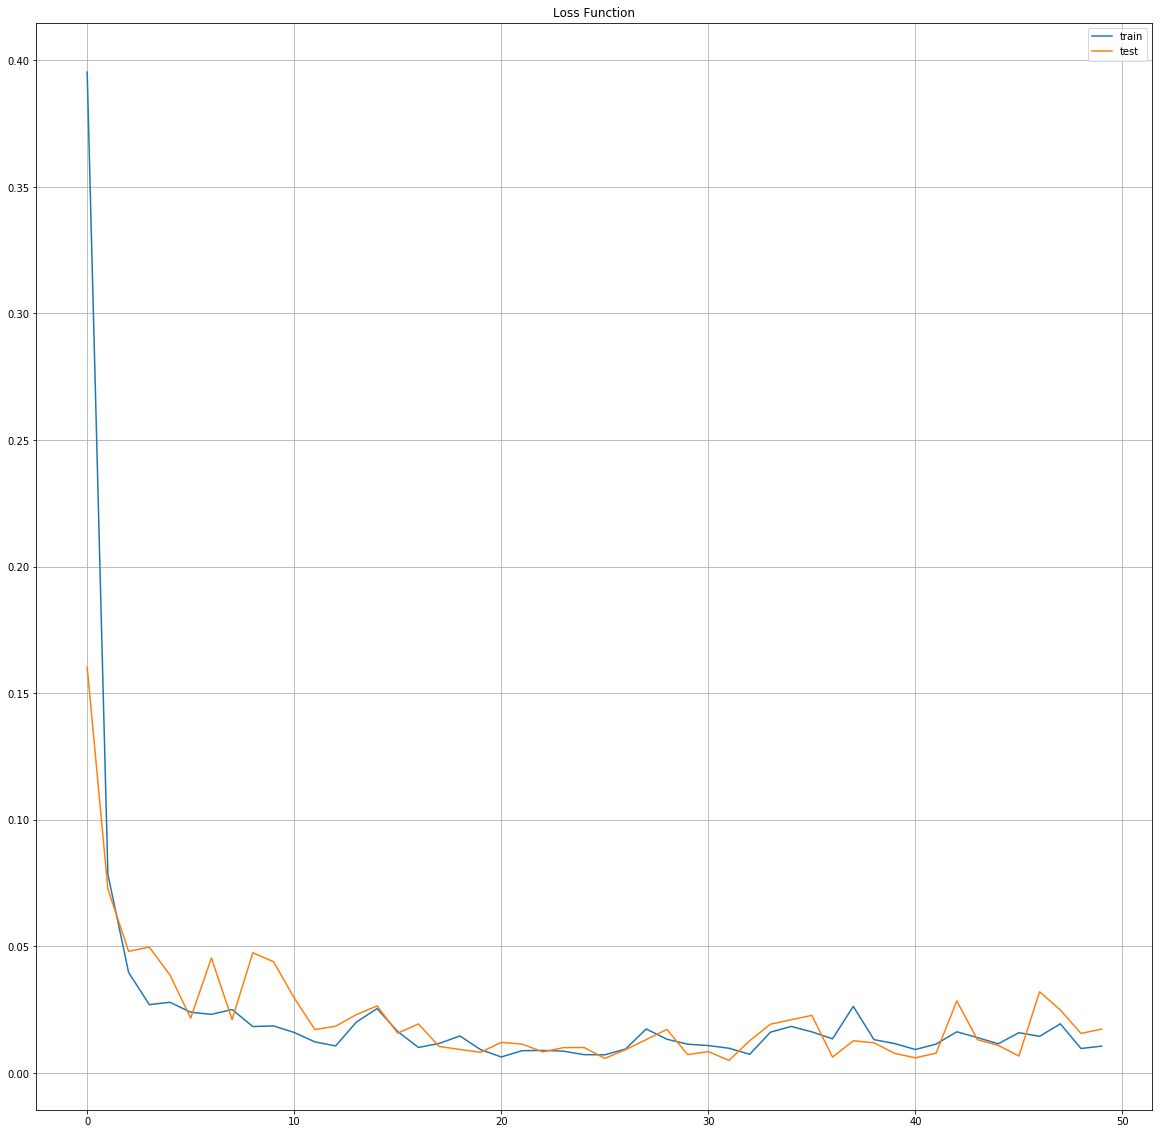

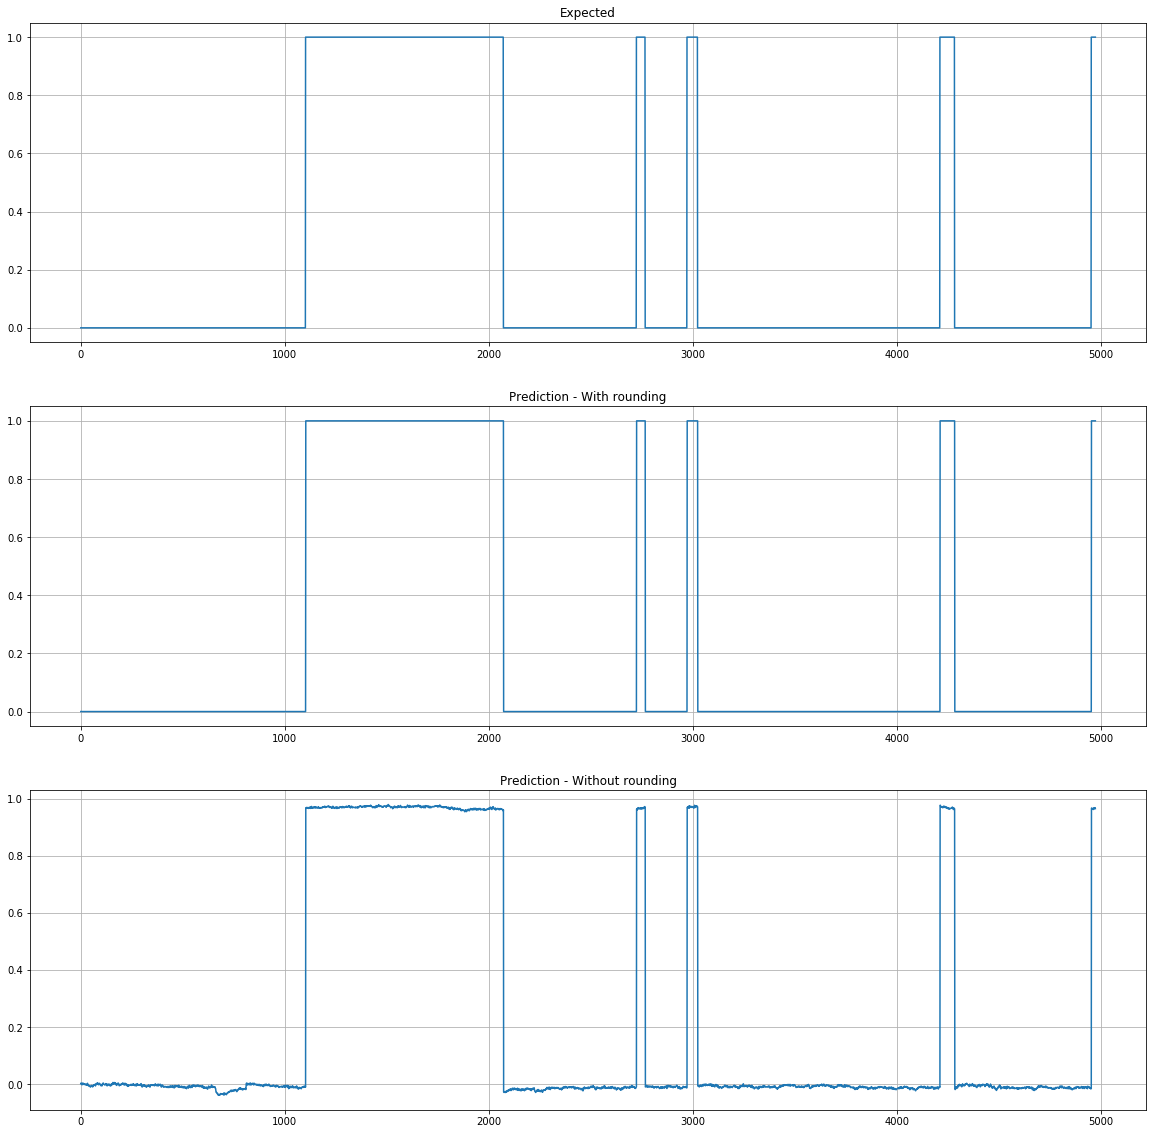

In [43]:
testID = 5
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

res = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

lagValue = 1
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=1)

predictor.FitModel(epochCount=50
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


TestID:  6
Train on 10000 samples, validate on 4975 samples
Epoch 1/1000
 - 1s - loss: 0.3615 - val_loss: 0.1391
Epoch 2/1000
 - 0s - loss: 0.0690 - val_loss: 0.0690
Epoch 3/1000
 - 0s - loss: 0.0382 - val_loss: 0.0528
Epoch 4/1000
 - 0s - loss: 0.0341 - val_loss: 0.0580
Epoch 5/1000
 - 0s - loss: 0.0320 - val_loss: 0.0338
Epoch 6/1000
 - 0s - loss: 0.0283 - val_loss: 0.0333
Epoch 7/1000
 - 0s - loss: 0.0208 - val_loss: 0.0263
Epoch 8/1000
 - 0s - loss: 0.0255 - val_loss: 0.0317
Epoch 9/1000
 - 0s - loss: 0.0145 - val_loss: 0.0284
Epoch 10/1000
 - 0s - loss: 0.0116 - val_loss: 0.0234
Epoch 11/1000
 - 0s - loss: 0.0171 - val_loss: 0.0153
Epoch 12/1000
 - 0s - loss: 0.0142 - val_loss: 0.0139
Epoch 13/1000
 - 0s - loss: 0.0168 - val_loss: 0.0216
Epoch 14/1000
 - 0s - loss: 0.0197 - val_loss: 0.0184
Epoch 15/1000
 - 0s - loss: 0.0135 - val_loss: 0.0113
Epoch 16/1000
 - 0s - loss: 0.0103 - val_loss: 0.0168
Epoch 17/1000
 - 0s - loss: 0.0215 - val_loss: 0.0474
Epoch 18/1000
 - 0s - loss: 0.0

Epoch 151/1000
 - 0s - loss: 0.0069 - val_loss: 0.0122
Epoch 152/1000
 - 0s - loss: 0.0100 - val_loss: 0.0086
Epoch 153/1000
 - 0s - loss: 0.0074 - val_loss: 0.0079
Epoch 154/1000
 - 0s - loss: 0.0083 - val_loss: 0.0117
Epoch 155/1000
 - 0s - loss: 0.0083 - val_loss: 0.0111
Epoch 156/1000
 - 0s - loss: 0.0060 - val_loss: 0.0092
Epoch 157/1000
 - 0s - loss: 0.0076 - val_loss: 0.0158
Epoch 158/1000
 - 0s - loss: 0.0098 - val_loss: 0.0111
Epoch 159/1000
 - 0s - loss: 0.0088 - val_loss: 0.0080
Epoch 160/1000
 - 0s - loss: 0.0068 - val_loss: 0.0058
Epoch 161/1000
 - 0s - loss: 0.0119 - val_loss: 0.0146
Epoch 162/1000
 - 0s - loss: 0.0102 - val_loss: 0.0177
Epoch 163/1000
 - 0s - loss: 0.0127 - val_loss: 0.0142
Epoch 164/1000
 - 0s - loss: 0.0067 - val_loss: 0.0121
Epoch 165/1000
 - 0s - loss: 0.0114 - val_loss: 0.0087
Epoch 166/1000
 - 0s - loss: 0.0076 - val_loss: 0.0101
Epoch 167/1000
 - 0s - loss: 0.0119 - val_loss: 0.0096
Epoch 168/1000
 - 0s - loss: 0.0068 - val_loss: 0.0110
Epoch 169/

Epoch 300/1000
 - 0s - loss: 0.0076 - val_loss: 0.0117
Epoch 301/1000
 - 0s - loss: 0.0079 - val_loss: 0.0134
Epoch 302/1000
 - 0s - loss: 0.0087 - val_loss: 0.0138
Epoch 303/1000
 - 0s - loss: 0.0091 - val_loss: 0.0128
Epoch 304/1000
 - 0s - loss: 0.0097 - val_loss: 0.0140
Epoch 305/1000
 - 0s - loss: 0.0103 - val_loss: 0.0169
Epoch 306/1000
 - 0s - loss: 0.0117 - val_loss: 0.0205
Epoch 307/1000
 - 0s - loss: 0.0156 - val_loss: 0.0207
Epoch 308/1000
 - 0s - loss: 0.0097 - val_loss: 0.0160
Epoch 309/1000
 - 0s - loss: 0.0082 - val_loss: 0.0102
Epoch 310/1000
 - 0s - loss: 0.0079 - val_loss: 0.0135
Epoch 311/1000
 - 0s - loss: 0.0071 - val_loss: 0.0107
Epoch 312/1000
 - 0s - loss: 0.0080 - val_loss: 0.0128
Epoch 313/1000
 - 0s - loss: 0.0102 - val_loss: 0.0114
Epoch 314/1000
 - 0s - loss: 0.0076 - val_loss: 0.0117
Epoch 315/1000
 - 0s - loss: 0.0096 - val_loss: 0.0143
Epoch 316/1000
 - 0s - loss: 0.0085 - val_loss: 0.0144
Epoch 317/1000
 - 0s - loss: 0.0076 - val_loss: 0.0122
Epoch 318/

Epoch 449/1000
 - 0s - loss: 0.0075 - val_loss: 0.0142
Epoch 450/1000
 - 0s - loss: 0.0078 - val_loss: 0.0130
Epoch 451/1000
 - 0s - loss: 0.0053 - val_loss: 0.0110
Epoch 452/1000
 - 0s - loss: 0.0111 - val_loss: 0.0193
Epoch 453/1000
 - 0s - loss: 0.0114 - val_loss: 0.0081
Epoch 454/1000
 - 0s - loss: 0.0082 - val_loss: 0.0131
Epoch 455/1000
 - 0s - loss: 0.0078 - val_loss: 0.0112
Epoch 456/1000
 - 0s - loss: 0.0064 - val_loss: 0.0100
Epoch 457/1000
 - 0s - loss: 0.0057 - val_loss: 0.0114
Epoch 458/1000
 - 0s - loss: 0.0109 - val_loss: 0.0197
Epoch 459/1000
 - 0s - loss: 0.0063 - val_loss: 0.0081
Epoch 460/1000
 - 0s - loss: 0.0062 - val_loss: 0.0090
Epoch 461/1000
 - 0s - loss: 0.0063 - val_loss: 0.0110
Epoch 462/1000
 - 0s - loss: 0.0067 - val_loss: 0.0087
Epoch 463/1000
 - 0s - loss: 0.0058 - val_loss: 0.0104
Epoch 464/1000
 - 0s - loss: 0.0054 - val_loss: 0.0087
Epoch 465/1000
 - 0s - loss: 0.0068 - val_loss: 0.0155
Epoch 466/1000
 - 0s - loss: 0.0066 - val_loss: 0.0143
Epoch 467/

Epoch 598/1000
 - 0s - loss: 0.0064 - val_loss: 0.0068
Epoch 599/1000
 - 0s - loss: 0.0052 - val_loss: 0.0103
Epoch 600/1000
 - 0s - loss: 0.0056 - val_loss: 0.0077
Epoch 601/1000
 - 0s - loss: 0.0057 - val_loss: 0.0064
Epoch 602/1000
 - 0s - loss: 0.0084 - val_loss: 0.0068
Epoch 603/1000
 - 0s - loss: 0.0063 - val_loss: 0.0095
Epoch 604/1000
 - 0s - loss: 0.0059 - val_loss: 0.0076
Epoch 605/1000
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 606/1000
 - 0s - loss: 0.0060 - val_loss: 0.0051
Epoch 607/1000
 - 0s - loss: 0.0059 - val_loss: 0.0058
Epoch 608/1000
 - 0s - loss: 0.0073 - val_loss: 0.0056
Epoch 609/1000
 - 0s - loss: 0.0055 - val_loss: 0.0041
Epoch 610/1000
 - 0s - loss: 0.0061 - val_loss: 0.0072
Epoch 611/1000
 - 0s - loss: 0.0056 - val_loss: 0.0056
Epoch 612/1000
 - 0s - loss: 0.0061 - val_loss: 0.0053
Epoch 613/1000
 - 0s - loss: 0.0082 - val_loss: 0.0058
Epoch 614/1000
 - 0s - loss: 0.0059 - val_loss: 0.0038
Epoch 615/1000
 - 0s - loss: 0.0045 - val_loss: 0.0046
Epoch 616/

Epoch 747/1000
 - 0s - loss: 0.0037 - val_loss: 0.0067
Epoch 748/1000
 - 0s - loss: 0.0073 - val_loss: 0.0085
Epoch 749/1000
 - 0s - loss: 0.0057 - val_loss: 0.0050
Epoch 750/1000
 - 0s - loss: 0.0039 - val_loss: 0.0049
Epoch 751/1000
 - 0s - loss: 0.0071 - val_loss: 0.0055
Epoch 752/1000
 - 0s - loss: 0.0053 - val_loss: 0.0043
Epoch 753/1000
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 754/1000
 - 0s - loss: 0.0035 - val_loss: 0.0055
Epoch 755/1000
 - 0s - loss: 0.0072 - val_loss: 0.0036
Epoch 756/1000
 - 0s - loss: 0.0054 - val_loss: 0.0033
Epoch 757/1000
 - 0s - loss: 0.0039 - val_loss: 0.0048
Epoch 758/1000
 - 0s - loss: 0.0059 - val_loss: 0.0057
Epoch 759/1000
 - 0s - loss: 0.0040 - val_loss: 0.0046
Epoch 760/1000
 - 0s - loss: 0.0049 - val_loss: 0.0037
Epoch 761/1000
 - 0s - loss: 0.0035 - val_loss: 0.0035
Epoch 762/1000
 - 0s - loss: 0.0035 - val_loss: 0.0037
Epoch 763/1000
 - 0s - loss: 0.0035 - val_loss: 0.0036
Epoch 764/1000
 - 0s - loss: 0.0063 - val_loss: 0.0061
Epoch 765/

Epoch 896/1000
 - 0s - loss: 0.0056 - val_loss: 0.0040
Epoch 897/1000
 - 0s - loss: 0.0053 - val_loss: 0.0044
Epoch 898/1000
 - 0s - loss: 0.0065 - val_loss: 0.0037
Epoch 899/1000
 - 0s - loss: 0.0051 - val_loss: 0.0041
Epoch 900/1000
 - 0s - loss: 0.0052 - val_loss: 0.0045
Epoch 901/1000
 - 0s - loss: 0.0036 - val_loss: 0.0051
Epoch 902/1000
 - 0s - loss: 0.0063 - val_loss: 0.0073
Epoch 903/1000
 - 0s - loss: 0.0076 - val_loss: 0.0040
Epoch 904/1000
 - 0s - loss: 0.0066 - val_loss: 0.0053
Epoch 905/1000
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 906/1000
 - 0s - loss: 0.0083 - val_loss: 0.0053
Epoch 907/1000
 - 0s - loss: 0.0063 - val_loss: 0.0037
Epoch 908/1000
 - 0s - loss: 0.0050 - val_loss: 0.0034
Epoch 909/1000
 - 0s - loss: 0.0056 - val_loss: 0.0038
Epoch 910/1000
 - 0s - loss: 0.0058 - val_loss: 0.0053
Epoch 911/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 912/1000
 - 0s - loss: 0.0062 - val_loss: 0.0091
Epoch 913/1000
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 914/

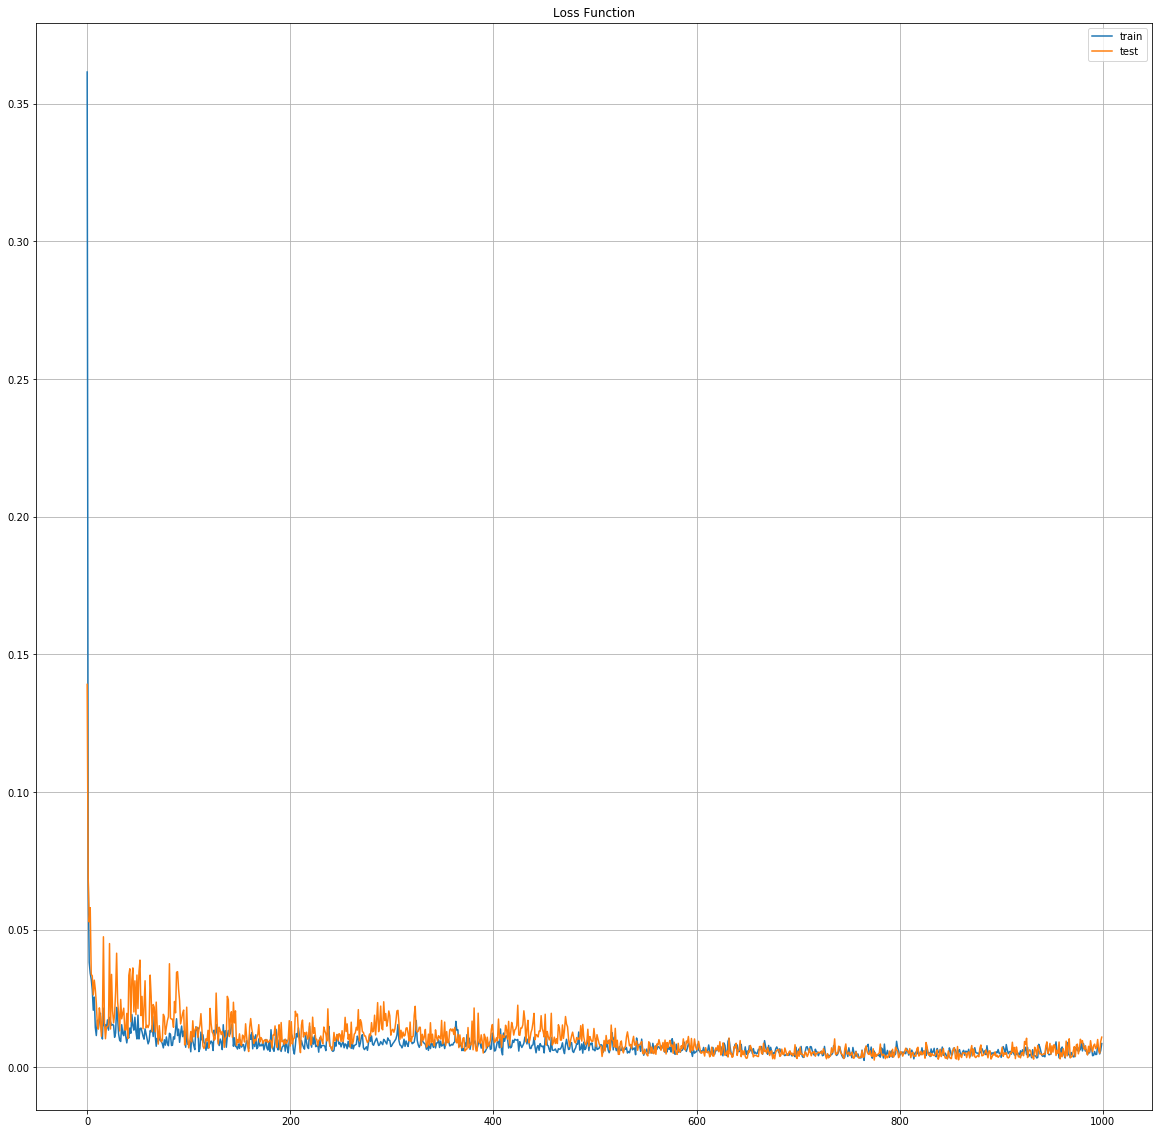

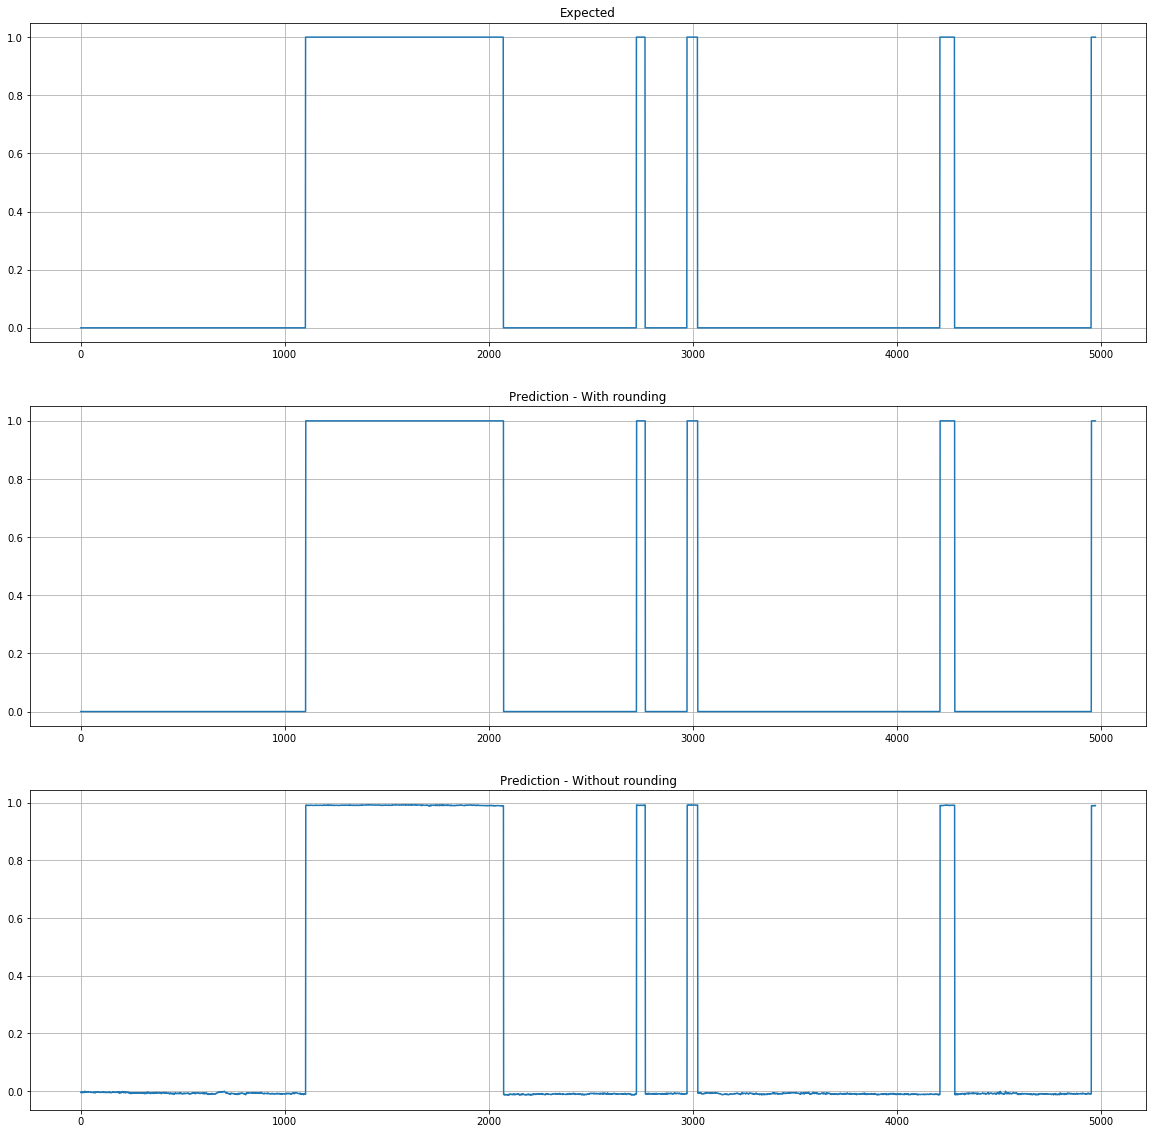

In [44]:
testID = 6
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

res = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

lagValue = 1
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=1)

predictor.FitModel(epochCount=1000
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


TestID:  7
Train on 10000 samples, validate on 4975 samples
Epoch 1/1000
 - 3s - loss: 0.3396 - val_loss: 0.0705
Epoch 2/1000
 - 1s - loss: 0.0416 - val_loss: 0.0727
Epoch 3/1000
 - 1s - loss: 0.0546 - val_loss: 0.0588
Epoch 4/1000
 - 1s - loss: 0.0306 - val_loss: 0.0521
Epoch 5/1000
 - 1s - loss: 0.0418 - val_loss: 0.0325
Epoch 6/1000
 - 1s - loss: 0.0215 - val_loss: 0.0317
Epoch 7/1000
 - 1s - loss: 0.0421 - val_loss: 0.0351
Epoch 8/1000
 - 1s - loss: 0.0326 - val_loss: 0.0318
Epoch 9/1000
 - 1s - loss: 0.0195 - val_loss: 0.0347
Epoch 10/1000
 - 1s - loss: 0.0302 - val_loss: 0.0217
Epoch 11/1000
 - 1s - loss: 0.0142 - val_loss: 0.0229
Epoch 12/1000
 - 1s - loss: 0.0244 - val_loss: 0.0155
Epoch 13/1000
 - 1s - loss: 0.0222 - val_loss: 0.0203
Epoch 14/1000
 - 1s - loss: 0.0227 - val_loss: 0.0122
Epoch 15/1000
 - 1s - loss: 0.0188 - val_loss: 0.0165
Epoch 16/1000
 - 1s - loss: 0.0183 - val_loss: 0.0123
Epoch 17/1000
 - 1s - loss: 0.0206 - val_loss: 0.0090
Epoch 18/1000
 - 1s - loss: 0.0

Epoch 151/1000
 - 1s - loss: 0.0062 - val_loss: 0.0086
Epoch 152/1000
 - 1s - loss: 0.0068 - val_loss: 0.0029
Epoch 153/1000
 - 1s - loss: 0.0070 - val_loss: 0.0042
Epoch 154/1000
 - 1s - loss: 0.0040 - val_loss: 0.0038
Epoch 155/1000
 - 1s - loss: 0.0046 - val_loss: 0.0027
Epoch 156/1000
 - 1s - loss: 0.0041 - val_loss: 0.0040
Epoch 157/1000
 - 1s - loss: 0.0034 - val_loss: 0.0080
Epoch 158/1000
 - 1s - loss: 0.0044 - val_loss: 0.0088
Epoch 159/1000
 - 1s - loss: 0.0090 - val_loss: 0.0087
Epoch 160/1000
 - 1s - loss: 0.0062 - val_loss: 0.0054
Epoch 161/1000
 - 1s - loss: 0.0064 - val_loss: 0.0063
Epoch 162/1000
 - 1s - loss: 0.0080 - val_loss: 0.0026
Epoch 163/1000
 - 1s - loss: 0.0056 - val_loss: 0.0034
Epoch 164/1000
 - 1s - loss: 0.0052 - val_loss: 0.0054
Epoch 165/1000
 - 1s - loss: 0.0053 - val_loss: 0.0050
Epoch 166/1000
 - 1s - loss: 0.0036 - val_loss: 0.0041
Epoch 167/1000
 - 1s - loss: 0.0039 - val_loss: 0.0035
Epoch 168/1000
 - 1s - loss: 0.0079 - val_loss: 0.0147
Epoch 169/

Epoch 300/1000
 - 1s - loss: 0.0073 - val_loss: 0.0046
Epoch 301/1000
 - 1s - loss: 0.0043 - val_loss: 0.0041
Epoch 302/1000
 - 1s - loss: 0.0043 - val_loss: 0.0043
Epoch 303/1000
 - 1s - loss: 0.0035 - val_loss: 0.0034
Epoch 304/1000
 - 1s - loss: 0.0052 - val_loss: 0.0064
Epoch 305/1000
 - 1s - loss: 0.0042 - val_loss: 0.0056
Epoch 306/1000
 - 1s - loss: 0.0060 - val_loss: 0.0035
Epoch 307/1000
 - 1s - loss: 0.0026 - val_loss: 0.0032
Epoch 308/1000
 - 1s - loss: 0.0072 - val_loss: 0.0035
Epoch 309/1000
 - 1s - loss: 0.0035 - val_loss: 0.0029
Epoch 310/1000
 - 1s - loss: 0.0072 - val_loss: 0.0051
Epoch 311/1000
 - 1s - loss: 0.0061 - val_loss: 0.0053
Epoch 312/1000
 - 1s - loss: 0.0078 - val_loss: 0.0031
Epoch 313/1000
 - 1s - loss: 0.0035 - val_loss: 0.0034
Epoch 314/1000
 - 2s - loss: 0.0030 - val_loss: 0.0030
Epoch 315/1000
 - 2s - loss: 0.0069 - val_loss: 0.0031
Epoch 316/1000
 - 2s - loss: 0.0031 - val_loss: 0.0036
Epoch 317/1000
 - 1s - loss: 0.0029 - val_loss: 0.0028
Epoch 318/

Epoch 449/1000
 - 1s - loss: 0.0071 - val_loss: 0.0033
Epoch 450/1000
 - 1s - loss: 0.0029 - val_loss: 0.0025
Epoch 451/1000
 - 1s - loss: 0.0025 - val_loss: 0.0064
Epoch 452/1000
 - 1s - loss: 0.0049 - val_loss: 0.0020
Epoch 453/1000
 - 1s - loss: 0.0023 - val_loss: 0.0022
Epoch 454/1000
 - 1s - loss: 0.0038 - val_loss: 0.0050
Epoch 455/1000
 - 1s - loss: 0.0043 - val_loss: 0.0233
Epoch 456/1000
 - 1s - loss: 0.0043 - val_loss: 0.0030
Epoch 457/1000
 - 1s - loss: 0.0057 - val_loss: 0.0028
Epoch 458/1000
 - 1s - loss: 0.0053 - val_loss: 0.0030
Epoch 459/1000
 - 1s - loss: 0.0024 - val_loss: 0.0029
Epoch 460/1000
 - 1s - loss: 0.0027 - val_loss: 0.0046
Epoch 461/1000
 - 1s - loss: 0.0061 - val_loss: 0.0042
Epoch 462/1000
 - 1s - loss: 0.0038 - val_loss: 0.0027
Epoch 463/1000
 - 1s - loss: 0.0039 - val_loss: 0.0049
Epoch 464/1000
 - 1s - loss: 0.0063 - val_loss: 0.0039
Epoch 465/1000
 - 1s - loss: 0.0043 - val_loss: 0.0038
Epoch 466/1000
 - 1s - loss: 0.0055 - val_loss: 0.0032
Epoch 467/

Epoch 598/1000
 - 2s - loss: 0.0044 - val_loss: 0.0036
Epoch 599/1000
 - 2s - loss: 0.0028 - val_loss: 0.0032
Epoch 600/1000
 - 2s - loss: 0.0038 - val_loss: 0.0040
Epoch 601/1000
 - 2s - loss: 0.0042 - val_loss: 0.0023
Epoch 602/1000
 - 1s - loss: 0.0056 - val_loss: 0.0036
Epoch 603/1000
 - 1s - loss: 0.0030 - val_loss: 0.0064
Epoch 604/1000
 - 1s - loss: 0.0029 - val_loss: 0.0024
Epoch 605/1000
 - 1s - loss: 0.0034 - val_loss: 0.0030
Epoch 606/1000
 - 1s - loss: 0.0033 - val_loss: 0.0049
Epoch 607/1000
 - 1s - loss: 0.0052 - val_loss: 0.0025
Epoch 608/1000
 - 1s - loss: 0.0026 - val_loss: 0.0046
Epoch 609/1000
 - 1s - loss: 0.0058 - val_loss: 0.0029
Epoch 610/1000
 - 1s - loss: 0.0060 - val_loss: 0.0057
Epoch 611/1000
 - 1s - loss: 0.0065 - val_loss: 0.0044
Epoch 612/1000
 - 1s - loss: 0.0037 - val_loss: 0.0045
Epoch 613/1000
 - 1s - loss: 0.0049 - val_loss: 0.0047
Epoch 614/1000
 - 1s - loss: 0.0056 - val_loss: 0.0039
Epoch 615/1000
 - 1s - loss: 0.0040 - val_loss: 0.0039
Epoch 616/

Epoch 747/1000
 - 1s - loss: 0.0029 - val_loss: 0.0034
Epoch 748/1000
 - 1s - loss: 0.0059 - val_loss: 0.0043
Epoch 749/1000
 - 1s - loss: 0.0055 - val_loss: 0.0035
Epoch 750/1000
 - 1s - loss: 0.0036 - val_loss: 0.0024
Epoch 751/1000
 - 1s - loss: 0.0031 - val_loss: 0.0046
Epoch 752/1000
 - 1s - loss: 0.0054 - val_loss: 0.0041
Epoch 753/1000
 - 1s - loss: 0.0051 - val_loss: 0.0026
Epoch 754/1000
 - 2s - loss: 0.0026 - val_loss: 0.0040
Epoch 755/1000
 - 2s - loss: 0.0037 - val_loss: 0.0027
Epoch 756/1000
 - 2s - loss: 0.0032 - val_loss: 0.0030
Epoch 757/1000
 - 1s - loss: 0.0026 - val_loss: 0.0056
Epoch 758/1000
 - 1s - loss: 0.0036 - val_loss: 0.0054
Epoch 759/1000
 - 1s - loss: 0.0054 - val_loss: 0.0036
Epoch 760/1000
 - 1s - loss: 0.0042 - val_loss: 0.0056
Epoch 761/1000
 - 1s - loss: 0.0033 - val_loss: 0.0039
Epoch 762/1000
 - 1s - loss: 0.0048 - val_loss: 0.0033
Epoch 763/1000
 - 1s - loss: 0.0029 - val_loss: 0.0043
Epoch 764/1000
 - 1s - loss: 0.0050 - val_loss: 0.0022
Epoch 765/

Epoch 896/1000
 - 2s - loss: 0.0027 - val_loss: 0.0020
Epoch 897/1000
 - 2s - loss: 0.0026 - val_loss: 0.0053
Epoch 898/1000
 - 1s - loss: 0.0060 - val_loss: 0.0025
Epoch 899/1000
 - 1s - loss: 0.0050 - val_loss: 0.0029
Epoch 900/1000
 - 1s - loss: 0.0028 - val_loss: 0.0025
Epoch 901/1000
 - 1s - loss: 0.0028 - val_loss: 0.0057
Epoch 902/1000
 - 1s - loss: 0.0038 - val_loss: 0.0028
Epoch 903/1000
 - 1s - loss: 0.0026 - val_loss: 0.0030
Epoch 904/1000
 - 1s - loss: 0.0051 - val_loss: 0.0035
Epoch 905/1000
 - 1s - loss: 0.0028 - val_loss: 0.0038
Epoch 906/1000
 - 1s - loss: 0.0049 - val_loss: 0.0028
Epoch 907/1000
 - 1s - loss: 0.0023 - val_loss: 0.0029
Epoch 908/1000
 - 1s - loss: 0.0024 - val_loss: 0.0056
Epoch 909/1000
 - 1s - loss: 0.0043 - val_loss: 0.0024
Epoch 910/1000
 - 1s - loss: 0.0031 - val_loss: 0.0049
Epoch 911/1000
 - 1s - loss: 0.0048 - val_loss: 0.0038
Epoch 912/1000
 - 1s - loss: 0.0024 - val_loss: 0.0029
Epoch 913/1000
 - 2s - loss: 0.0024 - val_loss: 0.0056
Epoch 914/

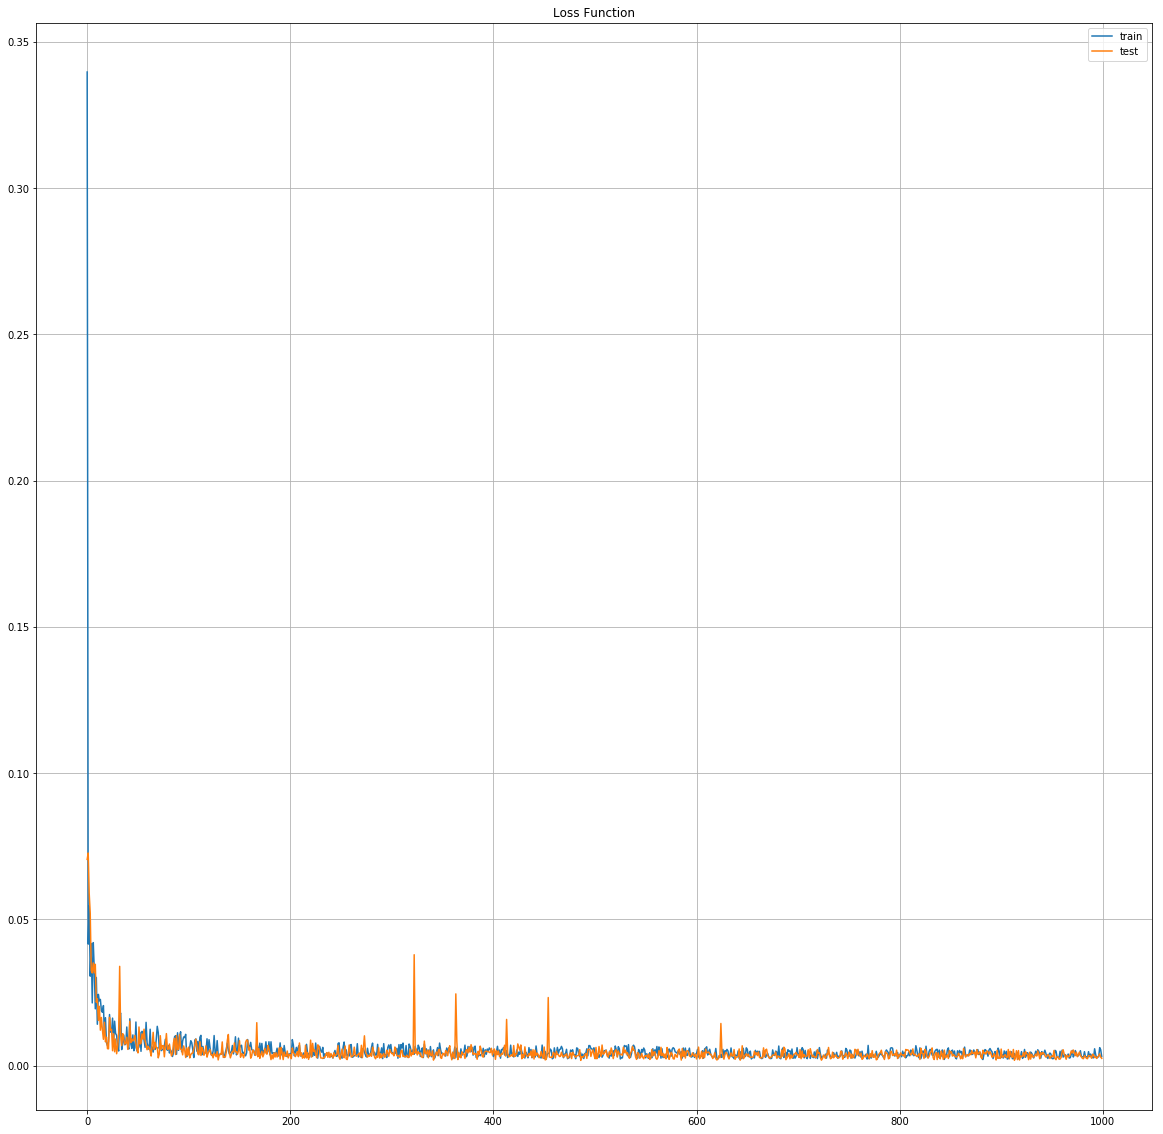

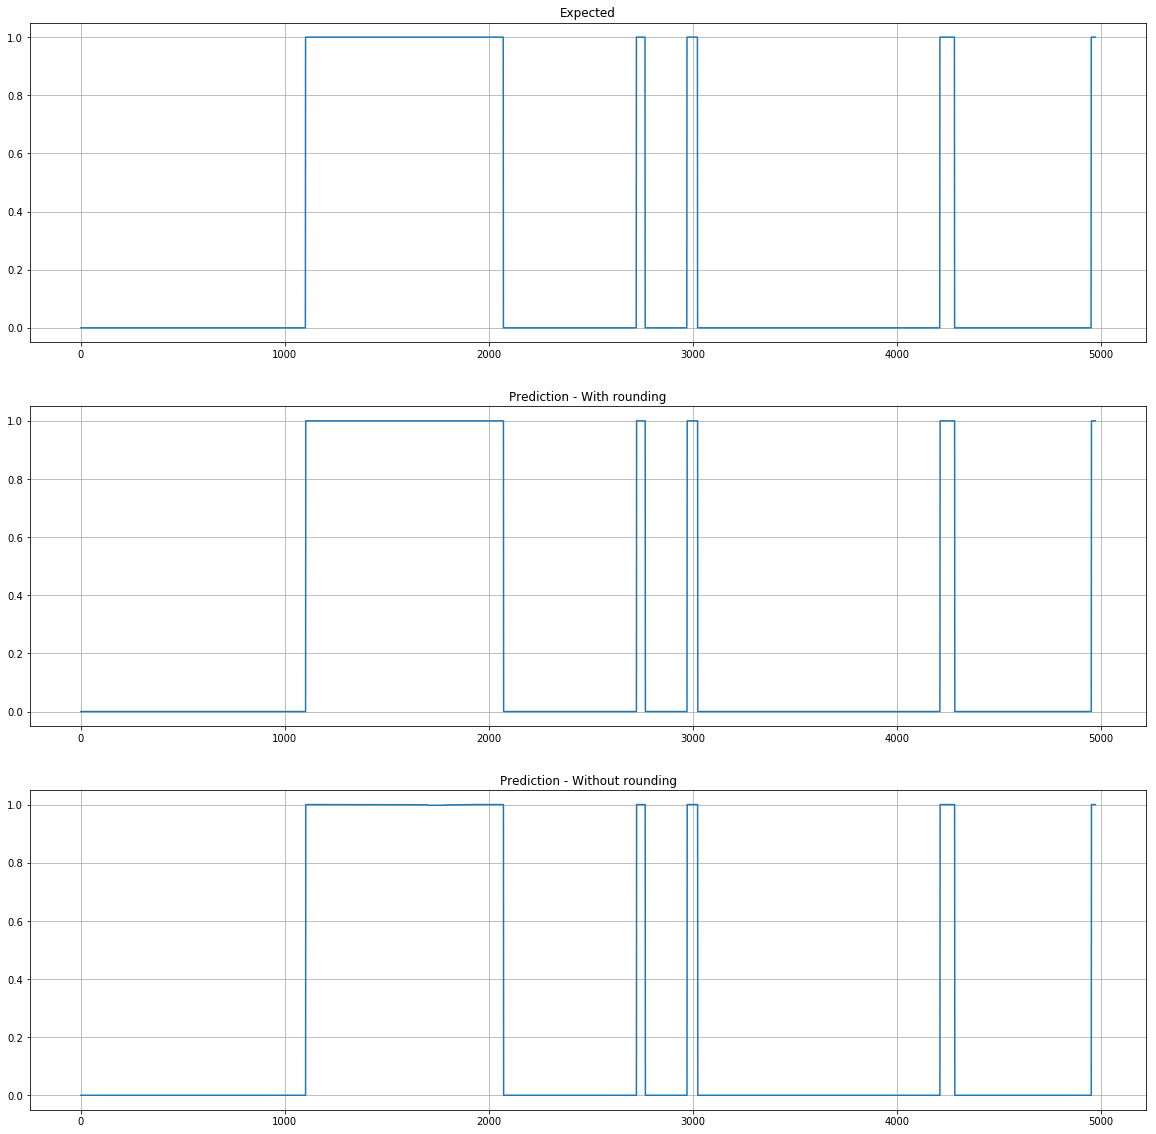

In [45]:
testID = 7
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

res = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

lagValue = 1
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=5)

predictor.FitModel(epochCount=1000
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


TestID:  8
Train on 10000 samples, validate on 4975 samples
Epoch 1/50
 - 2s - loss: 0.5556 - val_loss: 0.2434
Epoch 2/50
 - 0s - loss: 0.5533 - val_loss: 0.2502
Epoch 3/50
 - 0s - loss: 0.5413 - val_loss: 0.2561
Epoch 4/50
 - 0s - loss: 0.3567 - val_loss: 0.4403
Epoch 5/50
 - 0s - loss: 0.1748 - val_loss: 0.1179
Epoch 6/50
 - 0s - loss: 0.0610 - val_loss: 0.0323
Epoch 7/50
 - 0s - loss: 0.0204 - val_loss: 0.0276
Epoch 8/50
 - 0s - loss: 0.0265 - val_loss: 0.0239
Epoch 9/50
 - 0s - loss: 0.0177 - val_loss: 0.0236
Epoch 10/50
 - 0s - loss: 0.0166 - val_loss: 0.0229
Epoch 11/50
 - 0s - loss: 0.0159 - val_loss: 0.0225
Epoch 12/50
 - 0s - loss: 0.0145 - val_loss: 0.0218
Epoch 13/50
 - 0s - loss: 0.0220 - val_loss: 0.0202
Epoch 14/50
 - 0s - loss: 0.0211 - val_loss: 0.0199
Epoch 15/50
 - 0s - loss: 0.0216 - val_loss: 0.0215
Epoch 16/50
 - 0s - loss: 0.0190 - val_loss: 0.0189
Epoch 17/50
 - 0s - loss: 0.0212 - val_loss: 0.0276
Epoch 18/50
 - 0s - loss: 0.0225 - val_loss: 0.0207
Epoch 19/50
 

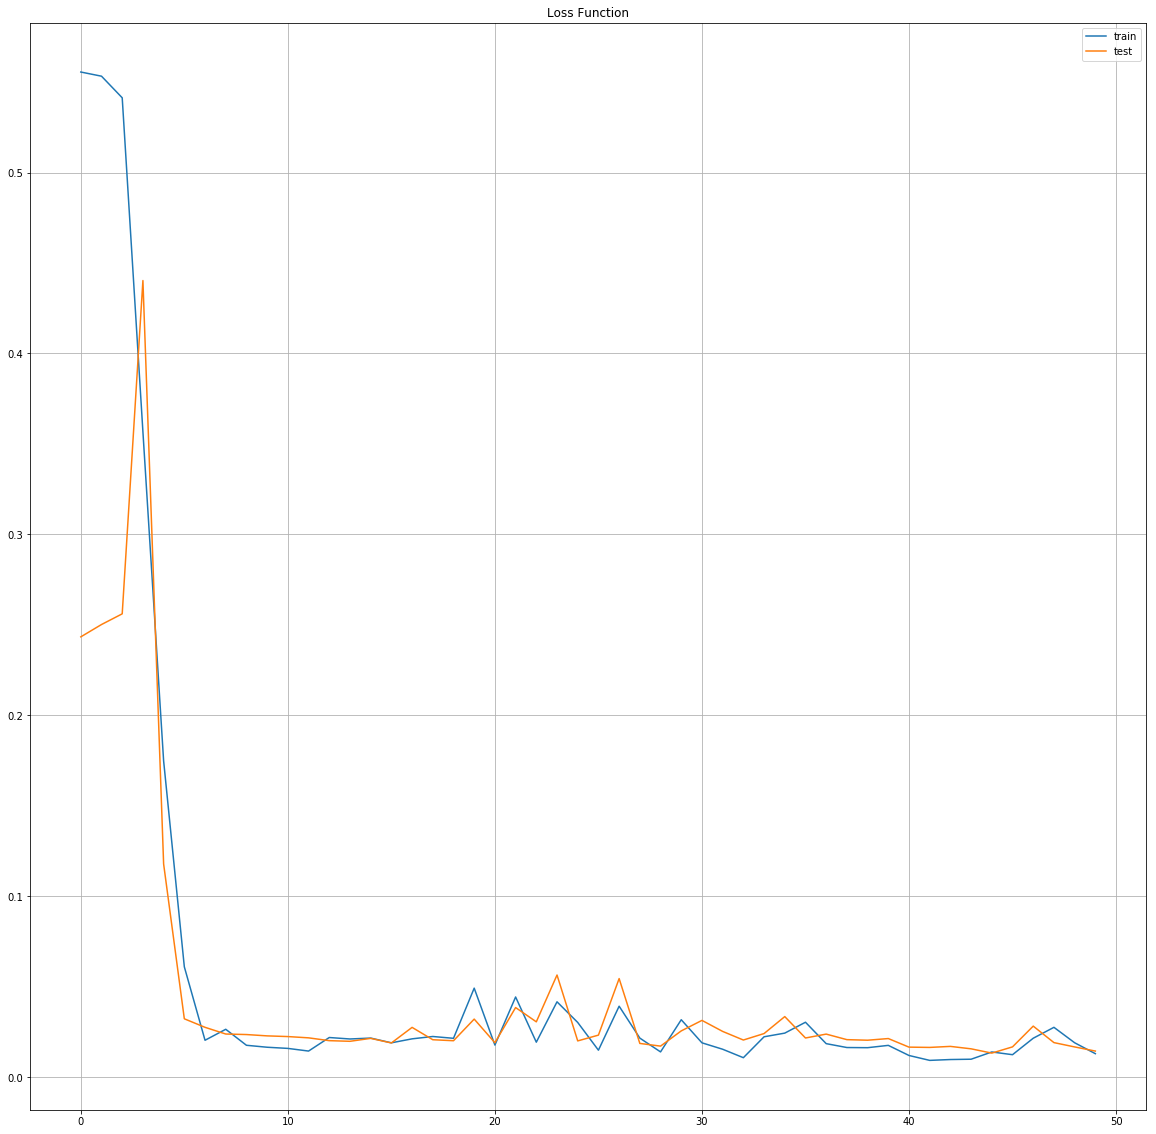

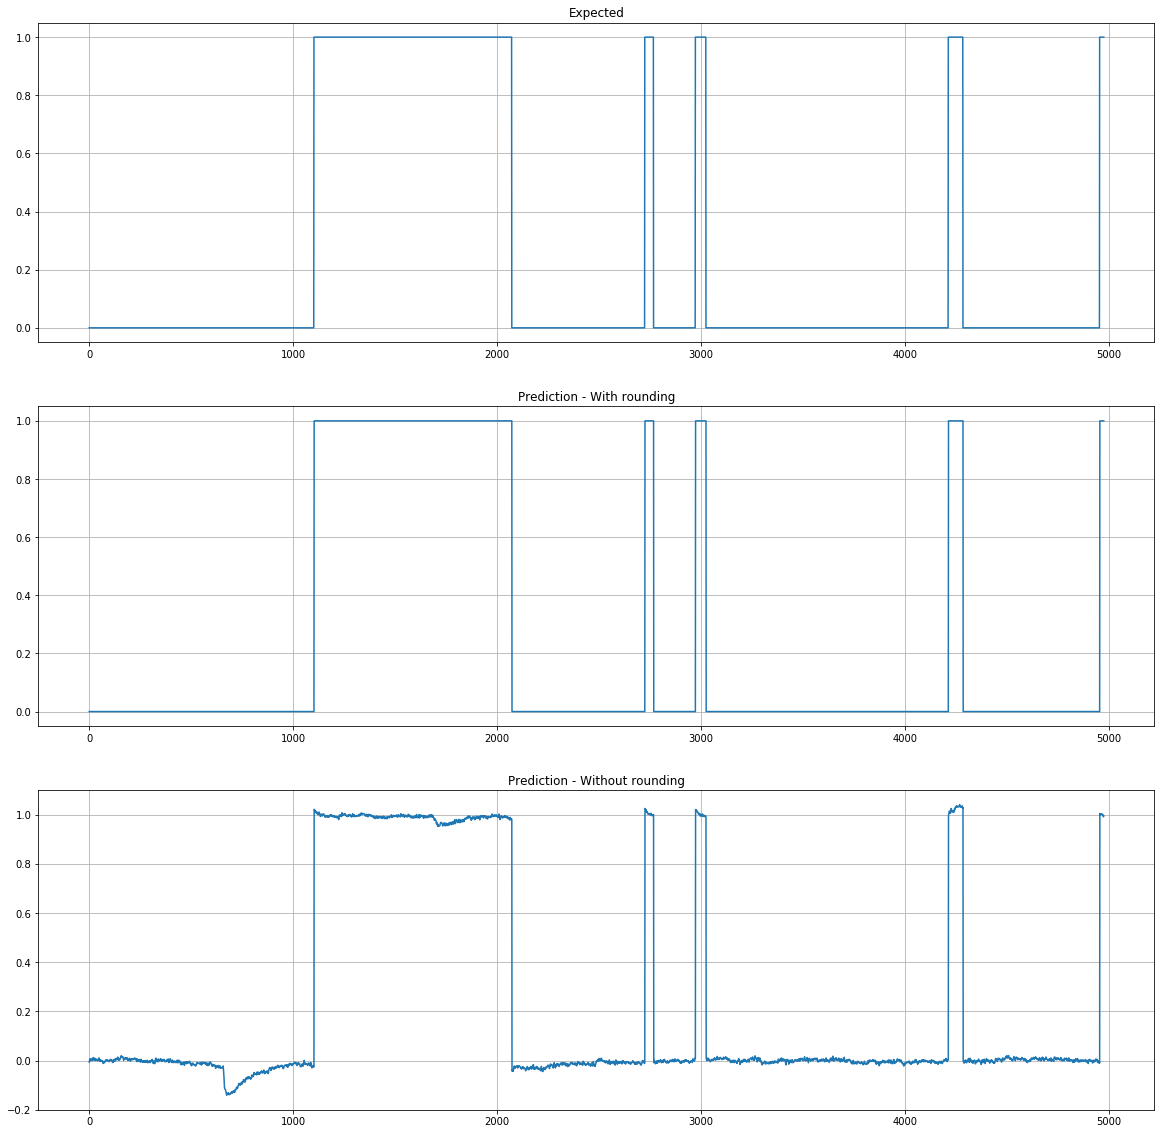

In [46]:
testID = 8
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

res = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

lagValue = 1
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=5)

predictor.FitModel(epochCount=50
           , batchSize=500
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


TestID:  9
Train on 10000 samples, validate on 4975 samples
Epoch 1/1000
 - 2s - loss: 0.5555 - val_loss: 0.2432
Epoch 2/1000
 - 0s - loss: 0.5526 - val_loss: 0.2506
Epoch 3/1000
 - 0s - loss: 0.5339 - val_loss: 0.2602
Epoch 4/1000
 - 0s - loss: 0.2969 - val_loss: 0.2161
Epoch 5/1000
 - 0s - loss: 0.1476 - val_loss: 0.0849
Epoch 6/1000
 - 0s - loss: 0.0687 - val_loss: 0.0701
Epoch 7/1000
 - 0s - loss: 0.0358 - val_loss: 0.0332
Epoch 8/1000
 - 0s - loss: 0.0216 - val_loss: 0.0283
Epoch 9/1000
 - 0s - loss: 0.0219 - val_loss: 0.0253
Epoch 10/1000
 - 0s - loss: 0.0222 - val_loss: 0.0322
Epoch 11/1000
 - 0s - loss: 0.0204 - val_loss: 0.0453
Epoch 12/1000
 - 0s - loss: 0.0400 - val_loss: 0.0270
Epoch 13/1000
 - 0s - loss: 0.0217 - val_loss: 0.0297
Epoch 14/1000
 - 0s - loss: 0.0170 - val_loss: 0.0287
Epoch 15/1000
 - 0s - loss: 0.0186 - val_loss: 0.0281
Epoch 16/1000
 - 0s - loss: 0.0196 - val_loss: 0.0268
Epoch 17/1000
 - 0s - loss: 0.0165 - val_loss: 0.0346
Epoch 18/1000
 - 0s - loss: 0.0

Epoch 151/1000
 - 0s - loss: 0.0118 - val_loss: 0.0128
Epoch 152/1000
 - 0s - loss: 0.0125 - val_loss: 0.0061
Epoch 153/1000
 - 0s - loss: 0.0060 - val_loss: 0.0043
Epoch 154/1000
 - 0s - loss: 0.0119 - val_loss: 0.0118
Epoch 155/1000
 - 0s - loss: 0.0127 - val_loss: 0.0076
Epoch 156/1000
 - 0s - loss: 0.0099 - val_loss: 0.0085
Epoch 157/1000
 - 0s - loss: 0.0093 - val_loss: 0.0232
Epoch 158/1000
 - 0s - loss: 0.0254 - val_loss: 0.0340
Epoch 159/1000
 - 0s - loss: 0.0249 - val_loss: 0.0349
Epoch 160/1000
 - 0s - loss: 0.0245 - val_loss: 0.0147
Epoch 161/1000
 - 0s - loss: 0.0106 - val_loss: 0.0103
Epoch 162/1000
 - 0s - loss: 0.0123 - val_loss: 0.0224
Epoch 163/1000
 - 0s - loss: 0.0180 - val_loss: 0.0237
Epoch 164/1000
 - 0s - loss: 0.0239 - val_loss: 0.0301
Epoch 165/1000
 - 0s - loss: 0.0116 - val_loss: 0.0085
Epoch 166/1000
 - 0s - loss: 0.0088 - val_loss: 0.0136
Epoch 167/1000
 - 0s - loss: 0.0126 - val_loss: 0.0086
Epoch 168/1000
 - 0s - loss: 0.0062 - val_loss: 0.0119
Epoch 169/

Epoch 300/1000
 - 0s - loss: 0.0108 - val_loss: 0.0135
Epoch 301/1000
 - 0s - loss: 0.0105 - val_loss: 0.0238
Epoch 302/1000
 - 0s - loss: 0.0091 - val_loss: 0.0075
Epoch 303/1000
 - 0s - loss: 0.0084 - val_loss: 0.0100
Epoch 304/1000
 - 0s - loss: 0.0084 - val_loss: 0.0120
Epoch 305/1000
 - 0s - loss: 0.0063 - val_loss: 0.0108
Epoch 306/1000
 - 0s - loss: 0.0100 - val_loss: 0.0108
Epoch 307/1000
 - 0s - loss: 0.0137 - val_loss: 0.0158
Epoch 308/1000
 - 0s - loss: 0.0110 - val_loss: 0.0047
Epoch 309/1000
 - 0s - loss: 0.0070 - val_loss: 0.0143
Epoch 310/1000
 - 0s - loss: 0.0096 - val_loss: 0.0047
Epoch 311/1000
 - 0s - loss: 0.0122 - val_loss: 0.0220
Epoch 312/1000
 - 0s - loss: 0.0324 - val_loss: 0.0470
Epoch 313/1000
 - 0s - loss: 0.0191 - val_loss: 0.0215
Epoch 314/1000
 - 0s - loss: 0.0231 - val_loss: 0.0235
Epoch 315/1000
 - 0s - loss: 0.0180 - val_loss: 0.0287
Epoch 316/1000
 - 0s - loss: 0.0097 - val_loss: 0.0092
Epoch 317/1000
 - 0s - loss: 0.0088 - val_loss: 0.0048
Epoch 318/

Epoch 449/1000
 - 0s - loss: 0.0094 - val_loss: 0.0056
Epoch 450/1000
 - 0s - loss: 0.0091 - val_loss: 0.0060
Epoch 451/1000
 - 0s - loss: 0.0064 - val_loss: 0.0045
Epoch 452/1000
 - 0s - loss: 0.0055 - val_loss: 0.0092
Epoch 453/1000
 - 0s - loss: 0.0056 - val_loss: 0.0036
Epoch 454/1000
 - 0s - loss: 0.0038 - val_loss: 0.0039
Epoch 455/1000
 - 0s - loss: 0.0045 - val_loss: 0.0085
Epoch 456/1000
 - 0s - loss: 0.0071 - val_loss: 0.0071
Epoch 457/1000
 - 0s - loss: 0.0079 - val_loss: 0.0190
Epoch 458/1000
 - 0s - loss: 0.0086 - val_loss: 0.0091
Epoch 459/1000
 - 1s - loss: 0.0095 - val_loss: 0.0052
Epoch 460/1000
 - 1s - loss: 0.0094 - val_loss: 0.0076
Epoch 461/1000
 - 1s - loss: 0.0065 - val_loss: 0.0080
Epoch 462/1000
 - 1s - loss: 0.0113 - val_loss: 0.0172
Epoch 463/1000
 - 1s - loss: 0.0096 - val_loss: 0.0069
Epoch 464/1000
 - 1s - loss: 0.0076 - val_loss: 0.0096
Epoch 465/1000
 - 1s - loss: 0.0093 - val_loss: 0.0103
Epoch 466/1000
 - 1s - loss: 0.0094 - val_loss: 0.0079
Epoch 467/

Epoch 598/1000
 - 1s - loss: 0.0051 - val_loss: 0.0034
Epoch 599/1000
 - 0s - loss: 0.0058 - val_loss: 0.0046
Epoch 600/1000
 - 0s - loss: 0.0052 - val_loss: 0.0060
Epoch 601/1000
 - 0s - loss: 0.0051 - val_loss: 0.0065
Epoch 602/1000
 - 0s - loss: 0.0072 - val_loss: 0.0053
Epoch 603/1000
 - 0s - loss: 0.0075 - val_loss: 0.0050
Epoch 604/1000
 - 0s - loss: 0.0071 - val_loss: 0.0067
Epoch 605/1000
 - 0s - loss: 0.0071 - val_loss: 0.0134
Epoch 606/1000
 - 0s - loss: 0.0076 - val_loss: 0.0062
Epoch 607/1000
 - 0s - loss: 0.0069 - val_loss: 0.0072
Epoch 608/1000
 - 0s - loss: 0.0065 - val_loss: 0.0046
Epoch 609/1000
 - 0s - loss: 0.0060 - val_loss: 0.0066
Epoch 610/1000
 - 0s - loss: 0.0072 - val_loss: 0.0044
Epoch 611/1000
 - 0s - loss: 0.0070 - val_loss: 0.0048
Epoch 612/1000
 - 0s - loss: 0.0049 - val_loss: 0.0037
Epoch 613/1000
 - 0s - loss: 0.0034 - val_loss: 0.0034
Epoch 614/1000
 - 0s - loss: 0.0039 - val_loss: 0.0107
Epoch 615/1000
 - 0s - loss: 0.0092 - val_loss: 0.0198
Epoch 616/

Epoch 747/1000
 - 0s - loss: 0.0042 - val_loss: 0.0041
Epoch 748/1000
 - 0s - loss: 0.0039 - val_loss: 0.0035
Epoch 749/1000
 - 0s - loss: 0.0041 - val_loss: 0.0049
Epoch 750/1000
 - 0s - loss: 0.0069 - val_loss: 0.0096
Epoch 751/1000
 - 0s - loss: 0.0068 - val_loss: 0.0152
Epoch 752/1000
 - 0s - loss: 0.0070 - val_loss: 0.0054
Epoch 753/1000
 - 0s - loss: 0.0038 - val_loss: 0.0032
Epoch 754/1000
 - 0s - loss: 0.0039 - val_loss: 0.0057
Epoch 755/1000
 - 0s - loss: 0.0048 - val_loss: 0.0036
Epoch 756/1000
 - 0s - loss: 0.0041 - val_loss: 0.0051
Epoch 757/1000
 - 0s - loss: 0.0059 - val_loss: 0.0048
Epoch 758/1000
 - 0s - loss: 0.0060 - val_loss: 0.0047
Epoch 759/1000
 - 0s - loss: 0.0060 - val_loss: 0.0048
Epoch 760/1000
 - 0s - loss: 0.0048 - val_loss: 0.0045
Epoch 761/1000
 - 0s - loss: 0.0058 - val_loss: 0.0100
Epoch 762/1000
 - 0s - loss: 0.0060 - val_loss: 0.0118
Epoch 763/1000
 - 1s - loss: 0.0060 - val_loss: 0.0126
Epoch 764/1000
 - 1s - loss: 0.0055 - val_loss: 0.0136
Epoch 765/

Epoch 896/1000
 - 1s - loss: 0.0049 - val_loss: 0.0053
Epoch 897/1000
 - 1s - loss: 0.0069 - val_loss: 0.0112
Epoch 898/1000
 - 0s - loss: 0.0111 - val_loss: 0.0069
Epoch 899/1000
 - 0s - loss: 0.0052 - val_loss: 0.0124
Epoch 900/1000
 - 0s - loss: 0.0070 - val_loss: 0.0042
Epoch 901/1000
 - 0s - loss: 0.0050 - val_loss: 0.0025
Epoch 902/1000
 - 0s - loss: 0.0027 - val_loss: 0.0039
Epoch 903/1000
 - 0s - loss: 0.0043 - val_loss: 0.0059
Epoch 904/1000
 - 0s - loss: 0.0055 - val_loss: 0.0056
Epoch 905/1000
 - 0s - loss: 0.0046 - val_loss: 0.0042
Epoch 906/1000
 - 0s - loss: 0.0044 - val_loss: 0.0097
Epoch 907/1000
 - 0s - loss: 0.0044 - val_loss: 0.0035
Epoch 908/1000
 - 0s - loss: 0.0033 - val_loss: 0.0029
Epoch 909/1000
 - 0s - loss: 0.0037 - val_loss: 0.0043
Epoch 910/1000
 - 0s - loss: 0.0041 - val_loss: 0.0053
Epoch 911/1000
 - 0s - loss: 0.0061 - val_loss: 0.0064
Epoch 912/1000
 - 0s - loss: 0.0038 - val_loss: 0.0040
Epoch 913/1000
 - 0s - loss: 0.0039 - val_loss: 0.0044
Epoch 914/

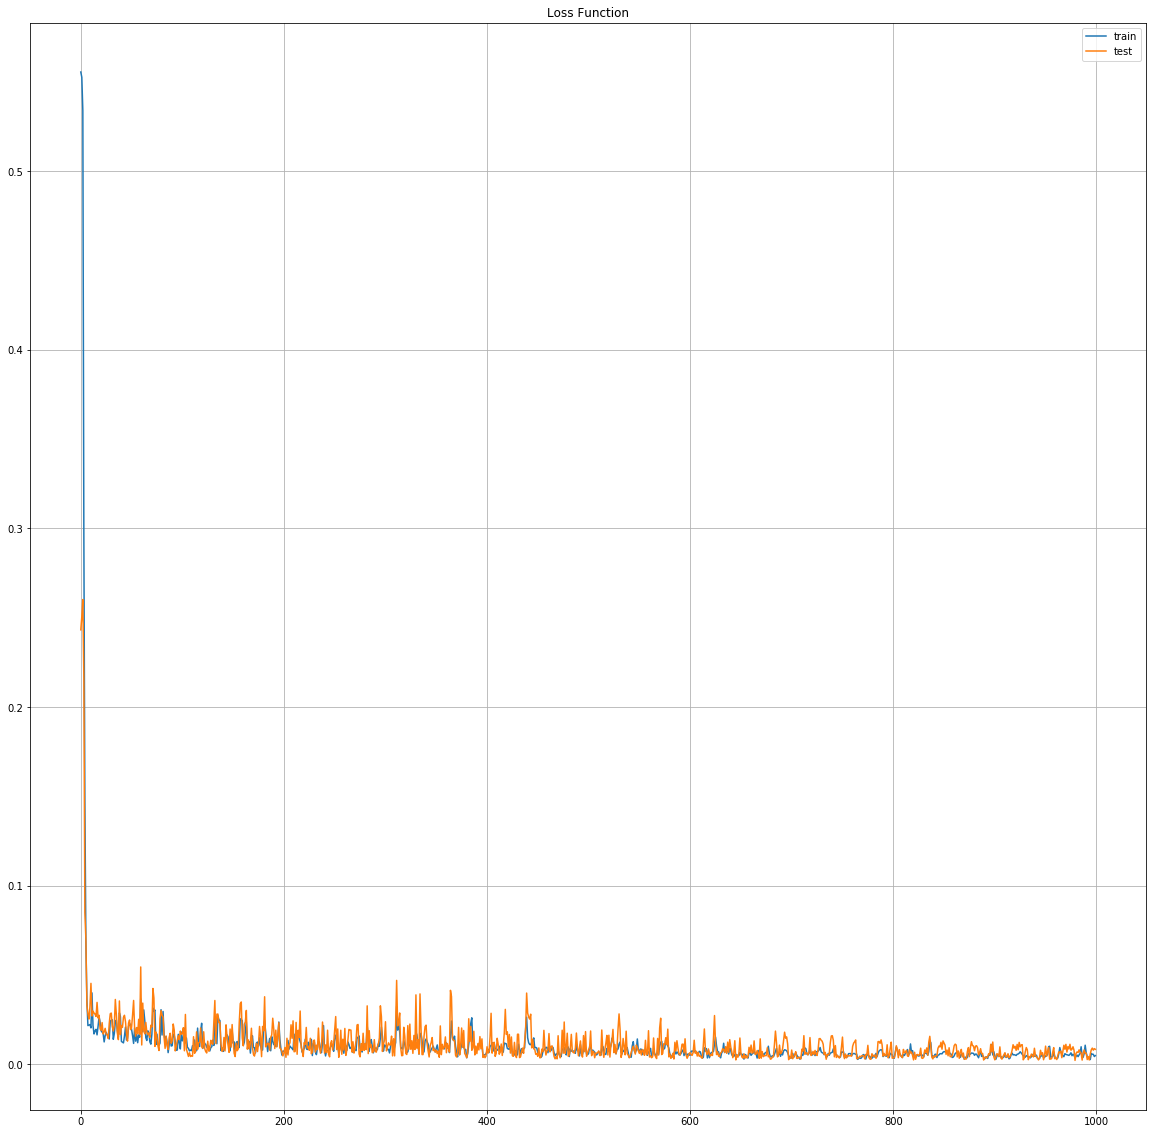

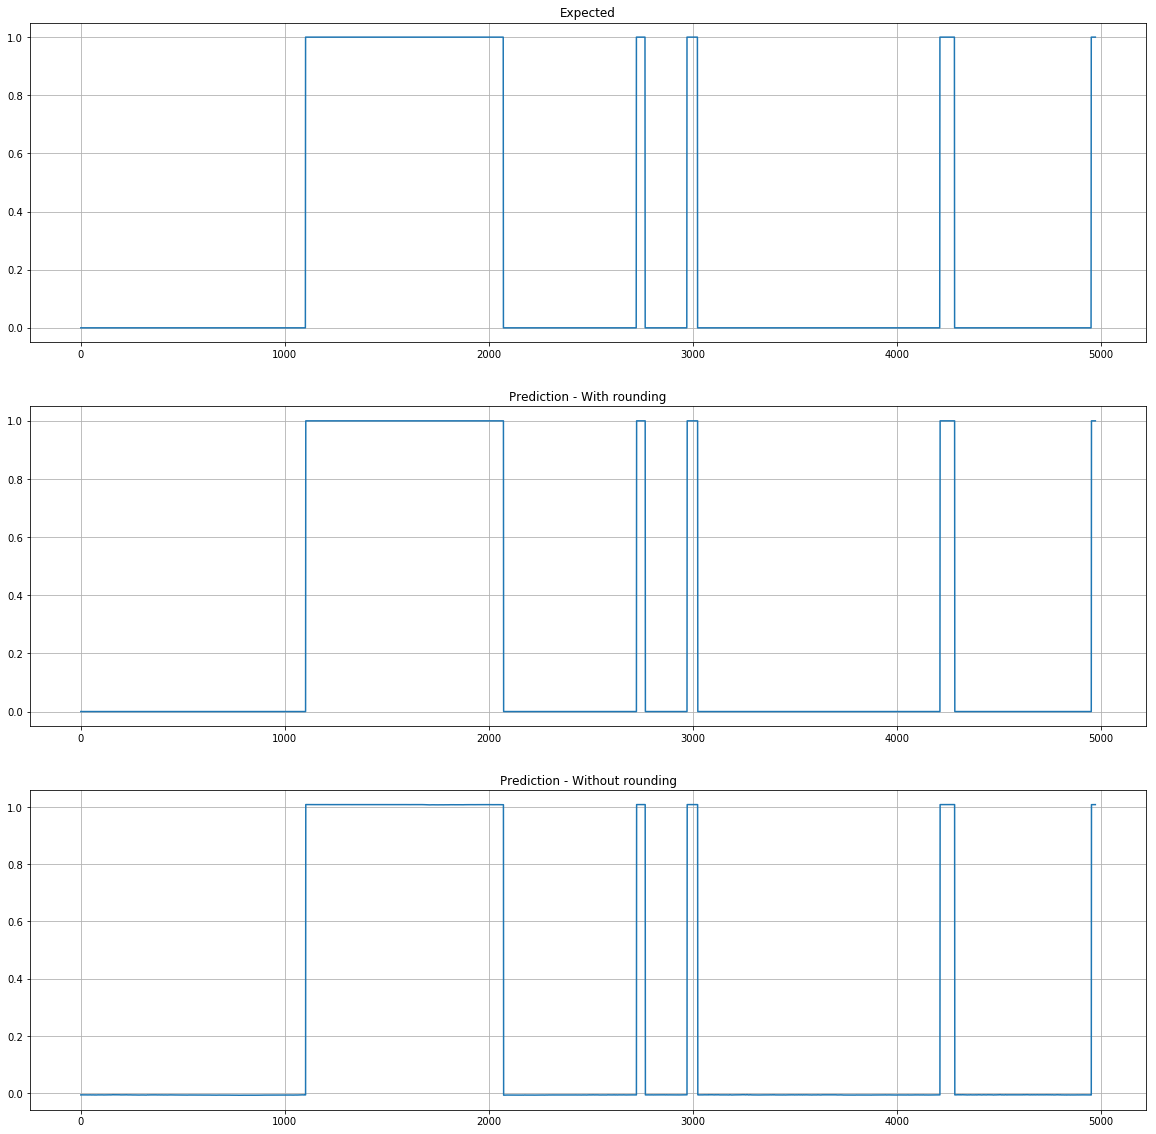

In [47]:
testID = 9
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

res = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

lagValue = 1
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=5)

predictor.FitModel(epochCount=1000
           , batchSize=500
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


TestID:  10
Train on 10000 samples, validate on 4970 samples
Epoch 1/50
 - 3s - loss: 0.7379 - val_loss: 0.6563
Epoch 2/50
 - 1s - loss: 0.4802 - val_loss: 0.5954
Epoch 3/50
 - 1s - loss: 0.5085 - val_loss: 0.6453
Epoch 4/50
 - 1s - loss: 0.4864 - val_loss: 0.5935
Epoch 5/50
 - 1s - loss: 0.5125 - val_loss: 0.6627
Epoch 6/50
 - 1s - loss: 0.4825 - val_loss: 0.5907
Epoch 7/50
 - 2s - loss: 0.5127 - val_loss: 0.6593
Epoch 8/50
 - 1s - loss: 0.4823 - val_loss: 0.5872
Epoch 9/50
 - 1s - loss: 0.5130 - val_loss: 0.6558
Epoch 10/50
 - 1s - loss: 0.4841 - val_loss: 0.6005
Epoch 11/50
 - 1s - loss: 0.5083 - val_loss: 0.6508
Epoch 12/50
 - 1s - loss: 0.4866 - val_loss: 0.5987
Epoch 13/50
 - 1s - loss: 0.5084 - val_loss: 0.6473
Epoch 14/50
 - 1s - loss: 0.4865 - val_loss: 0.5952
Epoch 15/50
 - 1s - loss: 0.5124 - val_loss: 0.6645
Epoch 16/50
 - 1s - loss: 0.4822 - val_loss: 0.6073
Epoch 17/50
 - 1s - loss: 0.5040 - val_loss: 0.6387
Epoch 18/50
 - 1s - loss: 0.4909 - val_loss: 0.6067
Epoch 19/50


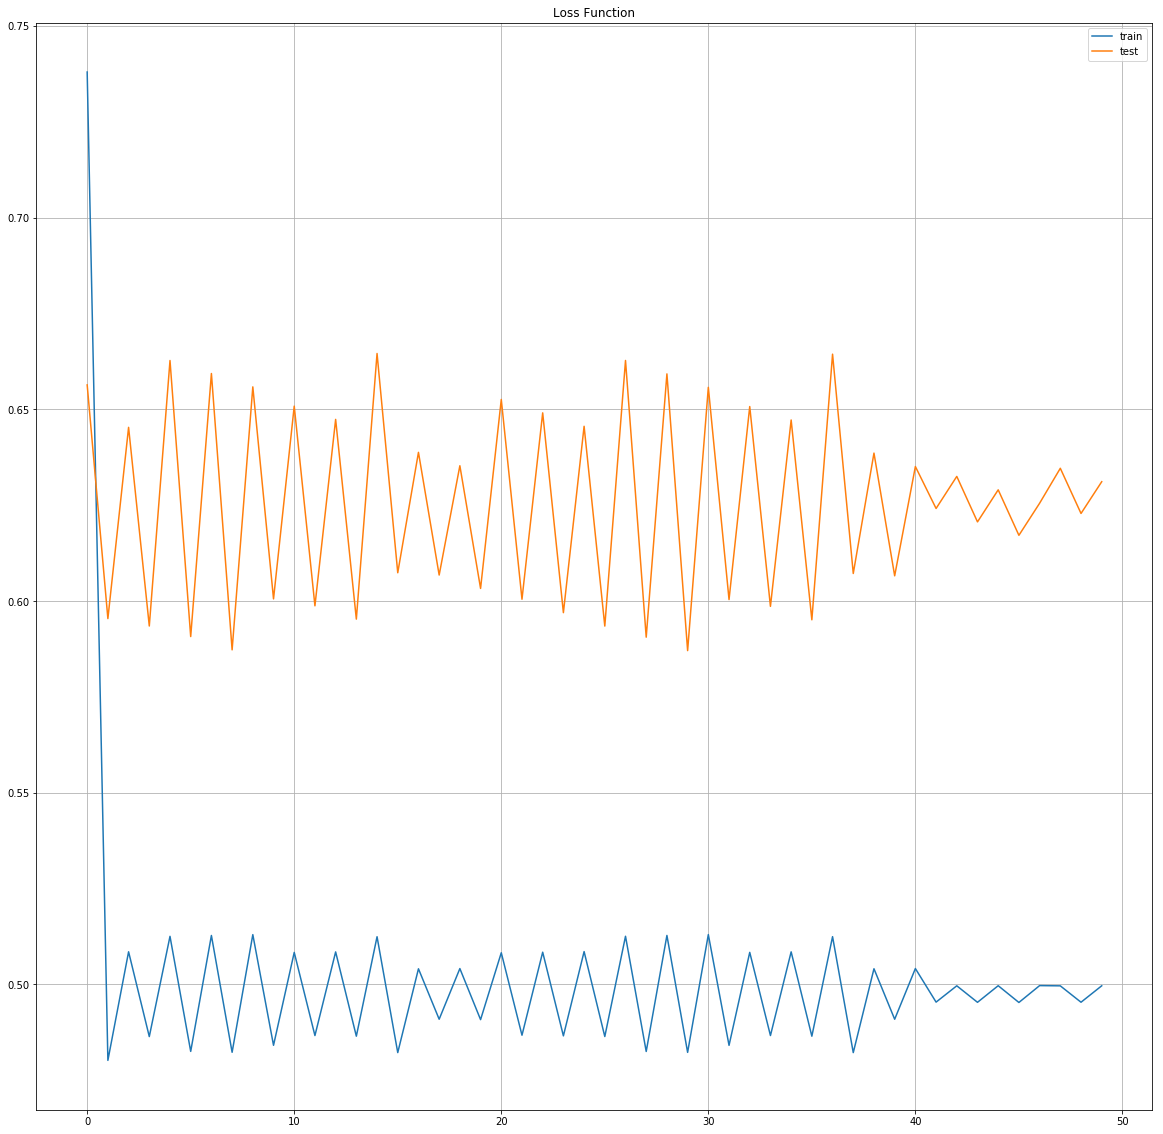

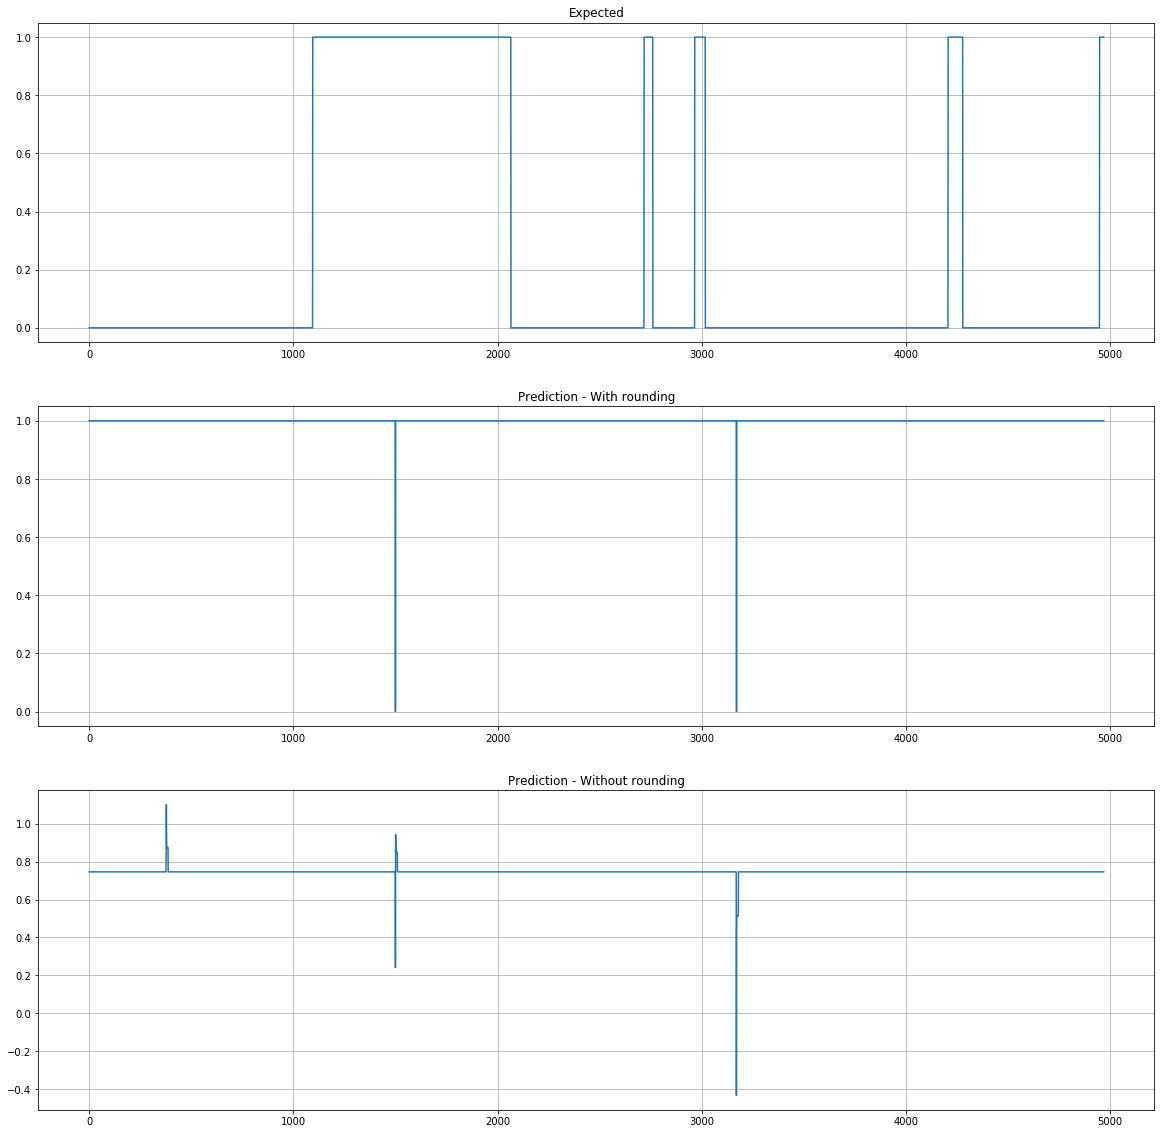

In [48]:
testID = 10
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

lagValue = 10
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=1)

predictor.FitModel(epochCount=50
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


TestID:  11
Train on 10000 samples, validate on 4970 samples
Epoch 1/1000
 - 3s - loss: 0.5933 - val_loss: 0.4149
Epoch 2/1000
 - 1s - loss: 0.5372 - val_loss: 0.5203
Epoch 3/1000
 - 1s - loss: 0.5149 - val_loss: 0.6260
Epoch 4/1000
 - 1s - loss: 0.4925 - val_loss: 0.7323
Epoch 5/1000
 - 1s - loss: 0.4585 - val_loss: 0.7119
Epoch 6/1000
 - 1s - loss: 0.4639 - val_loss: 0.7002
Epoch 7/1000
 - 1s - loss: 0.4694 - val_loss: 0.7124
Epoch 8/1000
 - 1s - loss: 0.4637 - val_loss: 0.6985
Epoch 9/1000
 - 1s - loss: 0.4693 - val_loss: 0.7106
Epoch 10/1000
 - 1s - loss: 0.4636 - val_loss: 0.6967
Epoch 11/1000
 - 2s - loss: 0.4710 - val_loss: 0.7179
Epoch 12/1000
 - 1s - loss: 0.4618 - val_loss: 0.6953
Epoch 13/1000
 - 1s - loss: 0.4710 - val_loss: 0.7161
Epoch 14/1000
 - 1s - loss: 0.4616 - val_loss: 0.6935
Epoch 15/1000
 - 1s - loss: 0.4710 - val_loss: 0.7144
Epoch 16/1000
 - 1s - loss: 0.4614 - val_loss: 0.6918
Epoch 17/1000
 - 1s - loss: 0.4726 - val_loss: 0.7215
Epoch 18/1000
 - 1s - loss: 0.

Epoch 151/1000
 - 1s - loss: 0.4705 - val_loss: 0.7173
Epoch 152/1000
 - 1s - loss: 0.4613 - val_loss: 0.6949
Epoch 153/1000
 - 1s - loss: 0.4705 - val_loss: 0.7175
Epoch 154/1000
 - 1s - loss: 0.4613 - val_loss: 0.6950
Epoch 155/1000
 - 1s - loss: 0.4705 - val_loss: 0.7176
Epoch 156/1000
 - 2s - loss: 0.4613 - val_loss: 0.6952
Epoch 157/1000
 - 3s - loss: 0.4705 - val_loss: 0.7178
Epoch 158/1000
 - 2s - loss: 0.4613 - val_loss: 0.6953
Epoch 159/1000
 - 2s - loss: 0.4705 - val_loss: 0.7180
Epoch 160/1000
 - 2s - loss: 0.4613 - val_loss: 0.6955
Epoch 161/1000
 - 1s - loss: 0.4705 - val_loss: 0.7181
Epoch 162/1000
 - 1s - loss: 0.4613 - val_loss: 0.6957
Epoch 163/1000
 - 2s - loss: 0.4705 - val_loss: 0.7183
Epoch 164/1000
 - 2s - loss: 0.4601 - val_loss: 0.6939
Epoch 165/1000
 - 2s - loss: 0.4705 - val_loss: 0.7173
Epoch 166/1000
 - 1s - loss: 0.4613 - val_loss: 0.6949
Epoch 167/1000
 - 1s - loss: 0.4705 - val_loss: 0.7175
Epoch 168/1000
 - 1s - loss: 0.4613 - val_loss: 0.6950
Epoch 169/

Epoch 300/1000
 - 1s - loss: 0.4613 - val_loss: 0.6955
Epoch 301/1000
 - 1s - loss: 0.4705 - val_loss: 0.7181
Epoch 302/1000
 - 1s - loss: 0.4613 - val_loss: 0.6957
Epoch 303/1000
 - 1s - loss: 0.4705 - val_loss: 0.7183
Epoch 304/1000
 - 1s - loss: 0.4601 - val_loss: 0.6940
Epoch 305/1000
 - 1s - loss: 0.4705 - val_loss: 0.7173
Epoch 306/1000
 - 1s - loss: 0.4613 - val_loss: 0.6949
Epoch 307/1000
 - 2s - loss: 0.4705 - val_loss: 0.7175
Epoch 308/1000
 - 3s - loss: 0.4613 - val_loss: 0.6950
Epoch 309/1000
 - 2s - loss: 0.4705 - val_loss: 0.7177
Epoch 310/1000
 - 2s - loss: 0.4613 - val_loss: 0.6952
Epoch 311/1000
 - 2s - loss: 0.4705 - val_loss: 0.7178
Epoch 312/1000
 - 1s - loss: 0.4613 - val_loss: 0.6954
Epoch 313/1000
 - 1s - loss: 0.4705 - val_loss: 0.7180
Epoch 314/1000
 - 1s - loss: 0.4613 - val_loss: 0.6955
Epoch 315/1000
 - 2s - loss: 0.4705 - val_loss: 0.7181
Epoch 316/1000
 - 2s - loss: 0.4613 - val_loss: 0.6957
Epoch 317/1000
 - 1s - loss: 0.4705 - val_loss: 0.7183
Epoch 318/

Epoch 449/1000
 - 1s - loss: 0.4705 - val_loss: 0.7177
Epoch 450/1000
 - 1s - loss: 0.4613 - val_loss: 0.6952
Epoch 451/1000
 - 1s - loss: 0.4705 - val_loss: 0.7178
Epoch 452/1000
 - 1s - loss: 0.4613 - val_loss: 0.6954
Epoch 453/1000
 - 1s - loss: 0.4705 - val_loss: 0.7180
Epoch 454/1000
 - 1s - loss: 0.4613 - val_loss: 0.6955
Epoch 455/1000
 - 1s - loss: 0.4705 - val_loss: 0.7181
Epoch 456/1000
 - 1s - loss: 0.4613 - val_loss: 0.6957
Epoch 457/1000
 - 1s - loss: 0.4705 - val_loss: 0.7183
Epoch 458/1000
 - 1s - loss: 0.4601 - val_loss: 0.6940
Epoch 459/1000
 - 1s - loss: 0.4705 - val_loss: 0.7173
Epoch 460/1000
 - 1s - loss: 0.4613 - val_loss: 0.6949
Epoch 461/1000
 - 1s - loss: 0.4705 - val_loss: 0.7175
Epoch 462/1000
 - 1s - loss: 0.4613 - val_loss: 0.6950
Epoch 463/1000
 - 1s - loss: 0.4705 - val_loss: 0.7177
Epoch 464/1000
 - 1s - loss: 0.4613 - val_loss: 0.6952
Epoch 465/1000
 - 1s - loss: 0.4705 - val_loss: 0.7178
Epoch 466/1000
 - 1s - loss: 0.4613 - val_loss: 0.6954
Epoch 467/

Epoch 598/1000
 - 1s - loss: 0.4601 - val_loss: 0.6940
Epoch 599/1000
 - 1s - loss: 0.4705 - val_loss: 0.7173
Epoch 600/1000
 - 1s - loss: 0.4613 - val_loss: 0.6949
Epoch 601/1000
 - 2s - loss: 0.4705 - val_loss: 0.7175
Epoch 602/1000
 - 3s - loss: 0.4613 - val_loss: 0.6950
Epoch 603/1000
 - 2s - loss: 0.4705 - val_loss: 0.7177
Epoch 604/1000
 - 2s - loss: 0.4613 - val_loss: 0.6952
Epoch 605/1000
 - 2s - loss: 0.4705 - val_loss: 0.7178
Epoch 606/1000
 - 1s - loss: 0.4613 - val_loss: 0.6954
Epoch 607/1000
 - 1s - loss: 0.4705 - val_loss: 0.7180
Epoch 608/1000
 - 2s - loss: 0.4613 - val_loss: 0.6955
Epoch 609/1000
 - 2s - loss: 0.4705 - val_loss: 0.7181
Epoch 610/1000
 - 2s - loss: 0.4613 - val_loss: 0.6957
Epoch 611/1000
 - 1s - loss: 0.4705 - val_loss: 0.7183
Epoch 612/1000
 - 1s - loss: 0.4601 - val_loss: 0.6940
Epoch 613/1000
 - 1s - loss: 0.4705 - val_loss: 0.7173
Epoch 614/1000
 - 2s - loss: 0.4613 - val_loss: 0.6949
Epoch 615/1000
 - 2s - loss: 0.4705 - val_loss: 0.7175
Epoch 616/

Epoch 747/1000
 - 2s - loss: 0.4705 - val_loss: 0.7180
Epoch 748/1000
 - 2s - loss: 0.4613 - val_loss: 0.6955
Epoch 749/1000
 - 1s - loss: 0.4705 - val_loss: 0.7182
Epoch 750/1000
 - 1s - loss: 0.4613 - val_loss: 0.6957
Epoch 751/1000
 - 1s - loss: 0.4705 - val_loss: 0.7183
Epoch 752/1000
 - 2s - loss: 0.4601 - val_loss: 0.6940
Epoch 753/1000
 - 2s - loss: 0.4705 - val_loss: 0.7173
Epoch 754/1000
 - 1s - loss: 0.4613 - val_loss: 0.6949
Epoch 755/1000
 - 1s - loss: 0.4705 - val_loss: 0.7175
Epoch 756/1000
 - 2s - loss: 0.4613 - val_loss: 0.6950
Epoch 757/1000
 - 2s - loss: 0.4705 - val_loss: 0.7177
Epoch 758/1000
 - 2s - loss: 0.4613 - val_loss: 0.6952
Epoch 759/1000
 - 1s - loss: 0.4705 - val_loss: 0.7178
Epoch 760/1000
 - 1s - loss: 0.4613 - val_loss: 0.6954
Epoch 761/1000
 - 1s - loss: 0.4705 - val_loss: 0.7180
Epoch 762/1000
 - 2s - loss: 0.4613 - val_loss: 0.6955
Epoch 763/1000
 - 2s - loss: 0.4705 - val_loss: 0.7182
Epoch 764/1000
 - 2s - loss: 0.4613 - val_loss: 0.6957
Epoch 765/

Epoch 896/1000
 - 1s - loss: 0.4613 - val_loss: 0.6950
Epoch 897/1000
 - 1s - loss: 0.4705 - val_loss: 0.7177
Epoch 898/1000
 - 1s - loss: 0.4613 - val_loss: 0.6952
Epoch 899/1000
 - 2s - loss: 0.4705 - val_loss: 0.7178
Epoch 900/1000
 - 2s - loss: 0.4613 - val_loss: 0.6954
Epoch 901/1000
 - 2s - loss: 0.4705 - val_loss: 0.7180
Epoch 902/1000
 - 1s - loss: 0.4613 - val_loss: 0.6955
Epoch 903/1000
 - 1s - loss: 0.4705 - val_loss: 0.7182
Epoch 904/1000
 - 1s - loss: 0.4613 - val_loss: 0.6957
Epoch 905/1000
 - 2s - loss: 0.4705 - val_loss: 0.7183
Epoch 906/1000
 - 2s - loss: 0.4601 - val_loss: 0.6940
Epoch 907/1000
 - 1s - loss: 0.4705 - val_loss: 0.7173
Epoch 908/1000
 - 2s - loss: 0.4613 - val_loss: 0.6949
Epoch 909/1000
 - 2s - loss: 0.4705 - val_loss: 0.7175
Epoch 910/1000
 - 2s - loss: 0.4613 - val_loss: 0.6950
Epoch 911/1000
 - 2s - loss: 0.4705 - val_loss: 0.7177
Epoch 912/1000
 - 2s - loss: 0.4613 - val_loss: 0.6952
Epoch 913/1000
 - 1s - loss: 0.4705 - val_loss: 0.7178
Epoch 914/

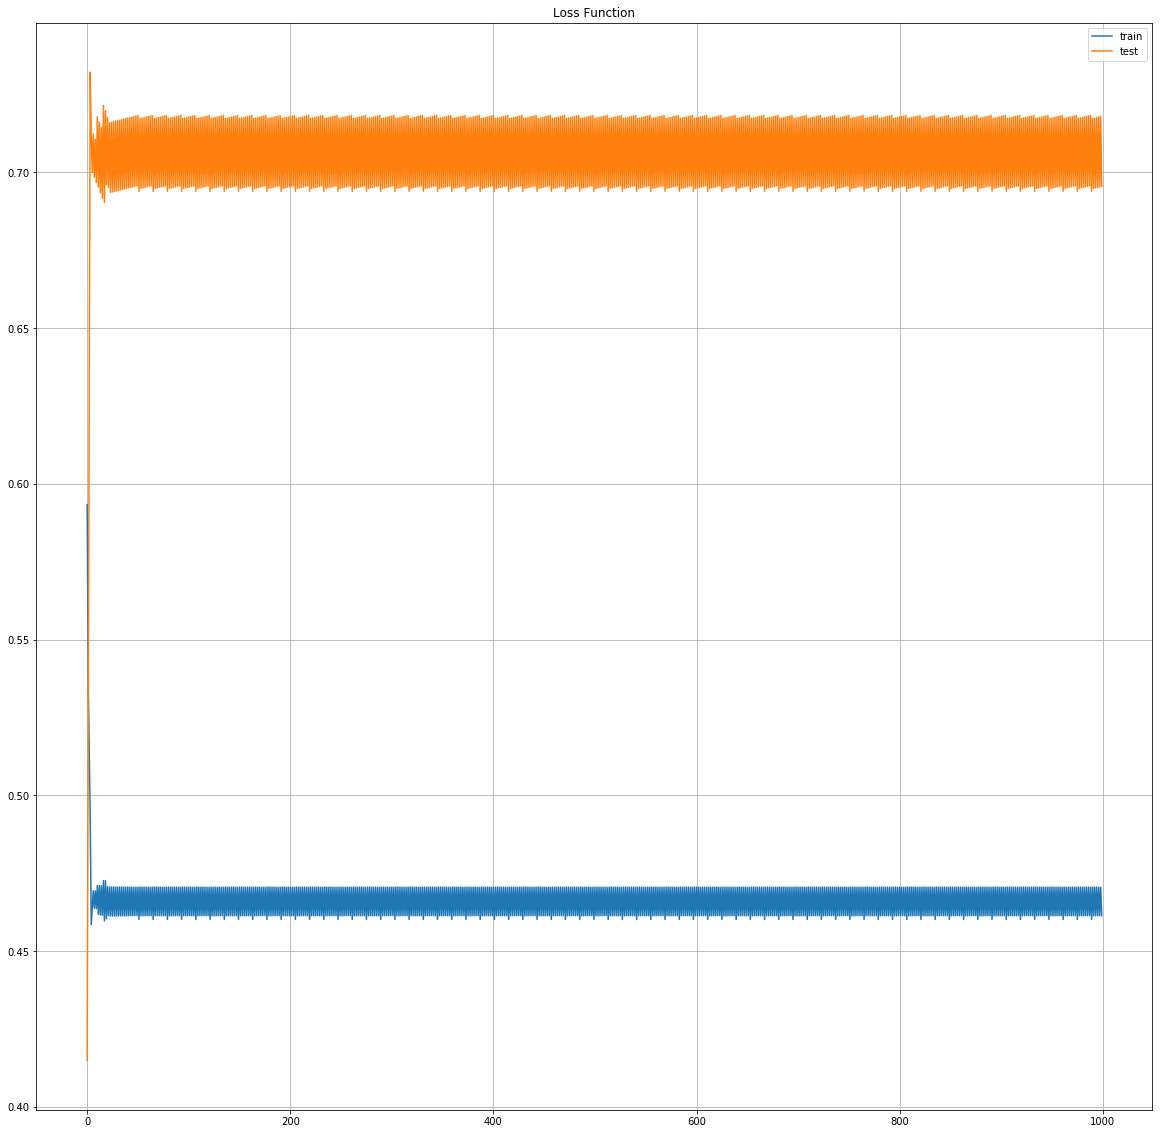

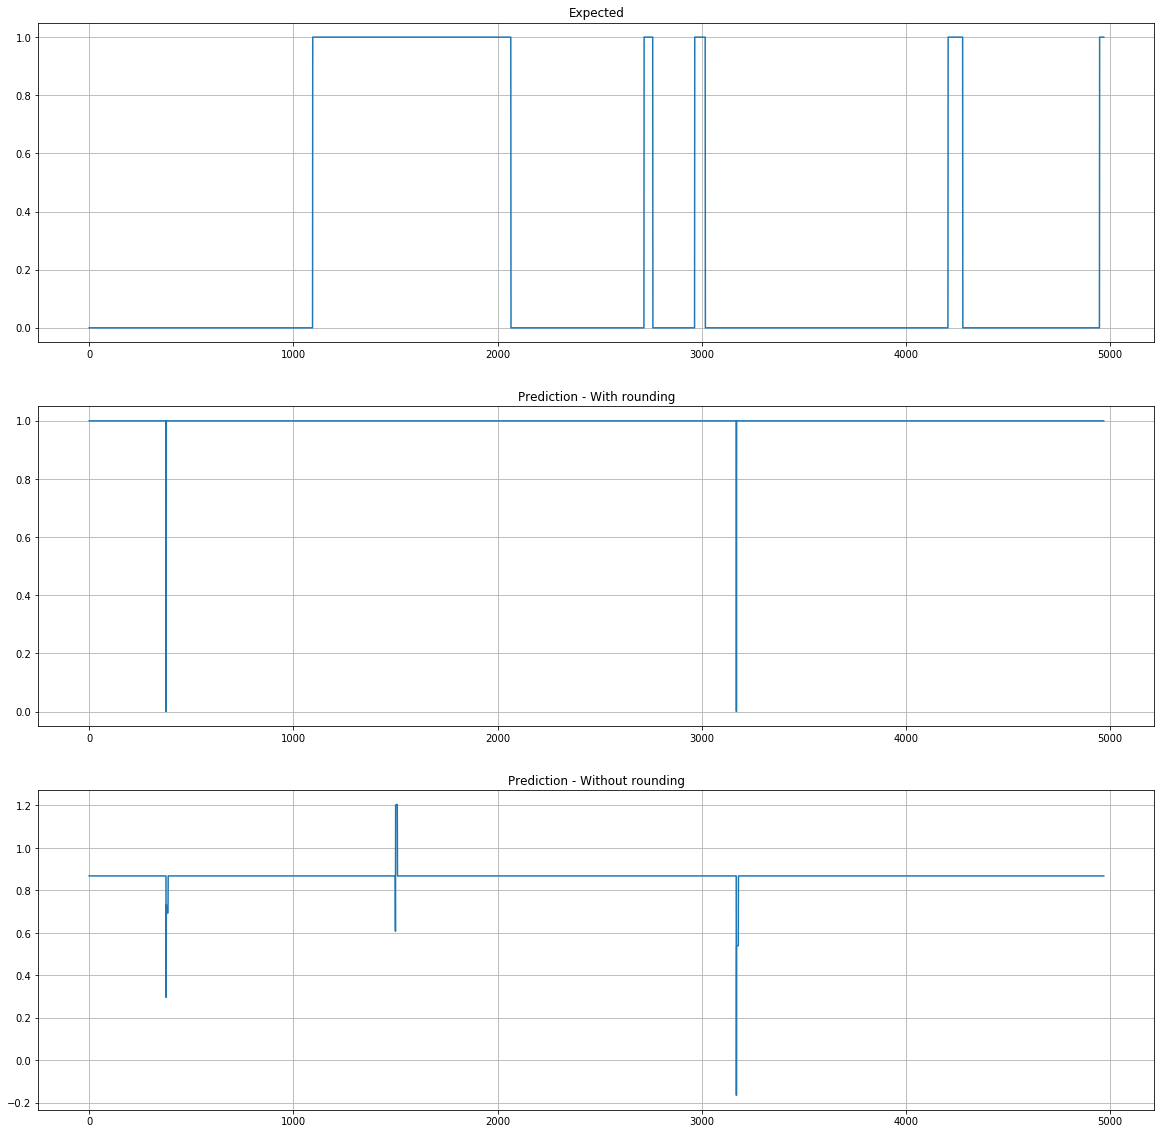

In [49]:
testID = 11
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

lagValue = 10
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=1)

predictor.FitModel(epochCount=1000
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


TestID:  12
Train on 10000 samples, validate on 4970 samples
Epoch 1/1000
 - 8s - loss: 0.5455 - val_loss: 0.3051
Epoch 2/1000
 - 9s - loss: 0.5653 - val_loss: 0.3216
Epoch 3/1000
 - 6s - loss: 0.5543 - val_loss: 0.3578
Epoch 4/1000
 - 5s - loss: 0.5500 - val_loss: 0.3962
Epoch 5/1000
 - 8s - loss: 0.5463 - val_loss: 0.4352
Epoch 6/1000
 - 8s - loss: 0.5415 - val_loss: 0.4747
Epoch 7/1000
 - 7s - loss: 0.5410 - val_loss: 0.5155
Epoch 8/1000
 - 10s - loss: 0.5325 - val_loss: 0.5639
Epoch 9/1000
 - 7s - loss: 0.5247 - val_loss: 0.6312
Epoch 10/1000
 - 6s - loss: 0.5014 - val_loss: 0.6259
Epoch 11/1000
 - 5s - loss: 0.5097 - val_loss: 0.7047
Epoch 12/1000
 - 8s - loss: 0.4730 - val_loss: 0.6297
Epoch 13/1000
 - 7s - loss: 0.4997 - val_loss: 0.7095
Epoch 14/1000
 - 7s - loss: 0.4668 - val_loss: 0.6542
Epoch 15/1000
 - 9s - loss: 0.4925 - val_loss: 0.7325
Epoch 16/1000
 - 7s - loss: 0.4641 - val_loss: 0.6944
Epoch 17/1000
 - 7s - loss: 0.4736 - val_loss: 0.7012
Epoch 18/1000
 - 8s - loss: 0

Epoch 151/1000
 - 6s - loss: 0.4504 - val_loss: 0.7495
Epoch 152/1000
 - 6s - loss: 0.4493 - val_loss: 0.7473
Epoch 153/1000
 - 5s - loss: 0.4503 - val_loss: 0.7503
Epoch 154/1000
 - 8s - loss: 0.4486 - val_loss: 0.7455
Epoch 155/1000
 - 7s - loss: 0.4509 - val_loss: 0.7510
Epoch 156/1000
 - 7s - loss: 0.4481 - val_loss: 0.7451
Epoch 157/1000
 - 7s - loss: 0.4506 - val_loss: 0.7493
Epoch 158/1000
 - 7s - loss: 0.4492 - val_loss: 0.7473
Epoch 159/1000
 - 7s - loss: 0.4502 - val_loss: 0.7503
Epoch 160/1000
 - 5s - loss: 0.4491 - val_loss: 0.7482
Epoch 161/1000
 - 5s - loss: 0.4497 - val_loss: 0.7486
Epoch 162/1000
 - 9s - loss: 0.4496 - val_loss: 0.7491
Epoch 163/1000
 - 5s - loss: 0.4496 - val_loss: 0.7495
Epoch 164/1000
 - 5s - loss: 0.4491 - val_loss: 0.7474
Epoch 165/1000
 - 9s - loss: 0.4501 - val_loss: 0.7503
Epoch 166/1000
 - 5s - loss: 0.4491 - val_loss: 0.7483
Epoch 167/1000
 - 6s - loss: 0.4496 - val_loss: 0.7486
Epoch 168/1000
 - 5s - loss: 0.4496 - val_loss: 0.7491
Epoch 169/

Epoch 300/1000
 - 7s - loss: 0.4488 - val_loss: 0.7556
Epoch 301/1000
 - 6s - loss: 0.4467 - val_loss: 0.7504
Epoch 302/1000
 - 5s - loss: 0.4492 - val_loss: 0.7569
Epoch 303/1000
 - 9s - loss: 0.4464 - val_loss: 0.7498
Epoch 304/1000
 - 6s - loss: 0.4492 - val_loss: 0.7562
Epoch 305/1000
 - 7s - loss: 0.4465 - val_loss: 0.7508
Epoch 306/1000
 - 5s - loss: 0.4488 - val_loss: 0.7554
Epoch 307/1000
 - 8s - loss: 0.4467 - val_loss: 0.7503
Epoch 308/1000
 - 7s - loss: 0.4492 - val_loss: 0.7567
Epoch 309/1000
 - 5s - loss: 0.4463 - val_loss: 0.7497
Epoch 310/1000
 - 7s - loss: 0.4492 - val_loss: 0.7561
Epoch 311/1000
 - 7s - loss: 0.4465 - val_loss: 0.7507
Epoch 312/1000
 - 7s - loss: 0.4488 - val_loss: 0.7553
Epoch 313/1000
 - 7s - loss: 0.4467 - val_loss: 0.7502
Epoch 314/1000
 - 7s - loss: 0.4492 - val_loss: 0.7566
Epoch 315/1000
 - 7s - loss: 0.4465 - val_loss: 0.7512
Epoch 316/1000
 - 6s - loss: 0.4487 - val_loss: 0.7558
Epoch 317/1000
 - 5s - loss: 0.4467 - val_loss: 0.7507
Epoch 318/

Epoch 449/1000
 - 9s - loss: 0.4463 - val_loss: 0.7518
Epoch 450/1000
 - 9s - loss: 0.4484 - val_loss: 0.7561
Epoch 451/1000
 - 7s - loss: 0.4465 - val_loss: 0.7513
Epoch 452/1000
 - 7s - loss: 0.4488 - val_loss: 0.7574
Epoch 453/1000
 - 7s - loss: 0.4461 - val_loss: 0.7508
Epoch 454/1000
 - 8s - loss: 0.4488 - val_loss: 0.7569
Epoch 455/1000
 - 7s - loss: 0.4463 - val_loss: 0.7518
Epoch 456/1000
 - 13s - loss: 0.4484 - val_loss: 0.7562
Epoch 457/1000
 - 12s - loss: 0.4465 - val_loss: 0.7514
Epoch 458/1000
 - 11s - loss: 0.4488 - val_loss: 0.7575
Epoch 459/1000
 - 12s - loss: 0.4461 - val_loss: 0.7509
Epoch 460/1000
 - 11s - loss: 0.4488 - val_loss: 0.7569
Epoch 461/1000
 - 12s - loss: 0.4462 - val_loss: 0.7518
Epoch 462/1000
 - 11s - loss: 0.4484 - val_loss: 0.7562
Epoch 463/1000
 - 12s - loss: 0.4464 - val_loss: 0.7514
Epoch 464/1000
 - 11s - loss: 0.4488 - val_loss: 0.7575
Epoch 465/1000
 - 11s - loss: 0.4461 - val_loss: 0.7509
Epoch 466/1000
 - 9s - loss: 0.4488 - val_loss: 0.7569


Epoch 598/1000
 - 7s - loss: 0.4467 - val_loss: 0.7526
Epoch 599/1000
 - 5s - loss: 0.4482 - val_loss: 0.7568
Epoch 600/1000
 - 5s - loss: 0.4463 - val_loss: 0.7522
Epoch 601/1000
 - 7s - loss: 0.4482 - val_loss: 0.7563
Epoch 602/1000
 - 5s - loss: 0.4463 - val_loss: 0.7519
Epoch 603/1000
 - 5s - loss: 0.4485 - val_loss: 0.7577
Epoch 604/1000
 - 5s - loss: 0.4459 - val_loss: 0.7515
Epoch 605/1000
 - 7s - loss: 0.4485 - val_loss: 0.7572
Epoch 606/1000
 - 8s - loss: 0.4461 - val_loss: 0.7524
Epoch 607/1000
 - 7s - loss: 0.4481 - val_loss: 0.7566
Epoch 608/1000
 - 5s - loss: 0.4463 - val_loss: 0.7521
Epoch 609/1000
 - 5s - loss: 0.4484 - val_loss: 0.7578
Epoch 610/1000
 - 5s - loss: 0.4459 - val_loss: 0.7517
Epoch 611/1000
 - 8s - loss: 0.4485 - val_loss: 0.7573
Epoch 612/1000
 - 7s - loss: 0.4460 - val_loss: 0.7526
Epoch 613/1000
 - 5s - loss: 0.4481 - val_loss: 0.7567
Epoch 614/1000
 - 8s - loss: 0.4462 - val_loss: 0.7522
Epoch 615/1000
 - 8s - loss: 0.4484 - val_loss: 0.7580
Epoch 616/

Epoch 747/1000
 - 7s - loss: 0.4482 - val_loss: 0.7578
Epoch 748/1000
 - 6s - loss: 0.4459 - val_loss: 0.7533
Epoch 749/1000
 - 6s - loss: 0.4478 - val_loss: 0.7572
Epoch 750/1000
 - 5s - loss: 0.4460 - val_loss: 0.7530
Epoch 751/1000
 - 8s - loss: 0.4481 - val_loss: 0.7584
Epoch 752/1000
 - 7s - loss: 0.4457 - val_loss: 0.7526
Epoch 753/1000
 - 5s - loss: 0.4481 - val_loss: 0.7580
Epoch 754/1000
 - 8s - loss: 0.4459 - val_loss: 0.7535
Epoch 755/1000
 - 7s - loss: 0.4478 - val_loss: 0.7574
Epoch 756/1000
 - 5s - loss: 0.4460 - val_loss: 0.7532
Epoch 757/1000
 - 8s - loss: 0.4478 - val_loss: 0.7570
Epoch 758/1000
 - 7s - loss: 0.4464 - val_loss: 0.7545
Epoch 759/1000
 - 5s - loss: 0.4474 - val_loss: 0.7566
Epoch 760/1000
 - 5s - loss: 0.4464 - val_loss: 0.7540
Epoch 761/1000
 - 7s - loss: 0.4474 - val_loss: 0.7562
Epoch 762/1000
 - 7s - loss: 0.4467 - val_loss: 0.7553
Epoch 763/1000
 - 6s - loss: 0.4471 - val_loss: 0.7558
Epoch 764/1000
 - 6s - loss: 0.4467 - val_loss: 0.7548
Epoch 765/

Epoch 896/1000
 - 7s - loss: 0.4462 - val_loss: 0.7546
Epoch 897/1000
 - 5s - loss: 0.4475 - val_loss: 0.7582
Epoch 898/1000
 - 5s - loss: 0.4459 - val_loss: 0.7542
Epoch 899/1000
 - 7s - loss: 0.4475 - val_loss: 0.7578
Epoch 900/1000
 - 8s - loss: 0.4459 - val_loss: 0.7539
Epoch 901/1000
 - 6s - loss: 0.4478 - val_loss: 0.7590
Epoch 902/1000
 - 7s - loss: 0.4456 - val_loss: 0.7535
Epoch 903/1000
 - 8s - loss: 0.4478 - val_loss: 0.7586
Epoch 904/1000
 - 5s - loss: 0.4457 - val_loss: 0.7544
Epoch 905/1000
 - 5s - loss: 0.4475 - val_loss: 0.7581
Epoch 906/1000
 - 5s - loss: 0.4459 - val_loss: 0.7542
Epoch 907/1000
 - 9s - loss: 0.4475 - val_loss: 0.7578
Epoch 908/1000
 - 6s - loss: 0.4458 - val_loss: 0.7538
Epoch 909/1000
 - 5s - loss: 0.4478 - val_loss: 0.7589
Epoch 910/1000
 - 5s - loss: 0.4455 - val_loss: 0.7535
Epoch 911/1000
 - 8s - loss: 0.4478 - val_loss: 0.7586
Epoch 912/1000
 - 7s - loss: 0.4457 - val_loss: 0.7543
Epoch 913/1000
 - 8s - loss: 0.4475 - val_loss: 0.7581
Epoch 914/

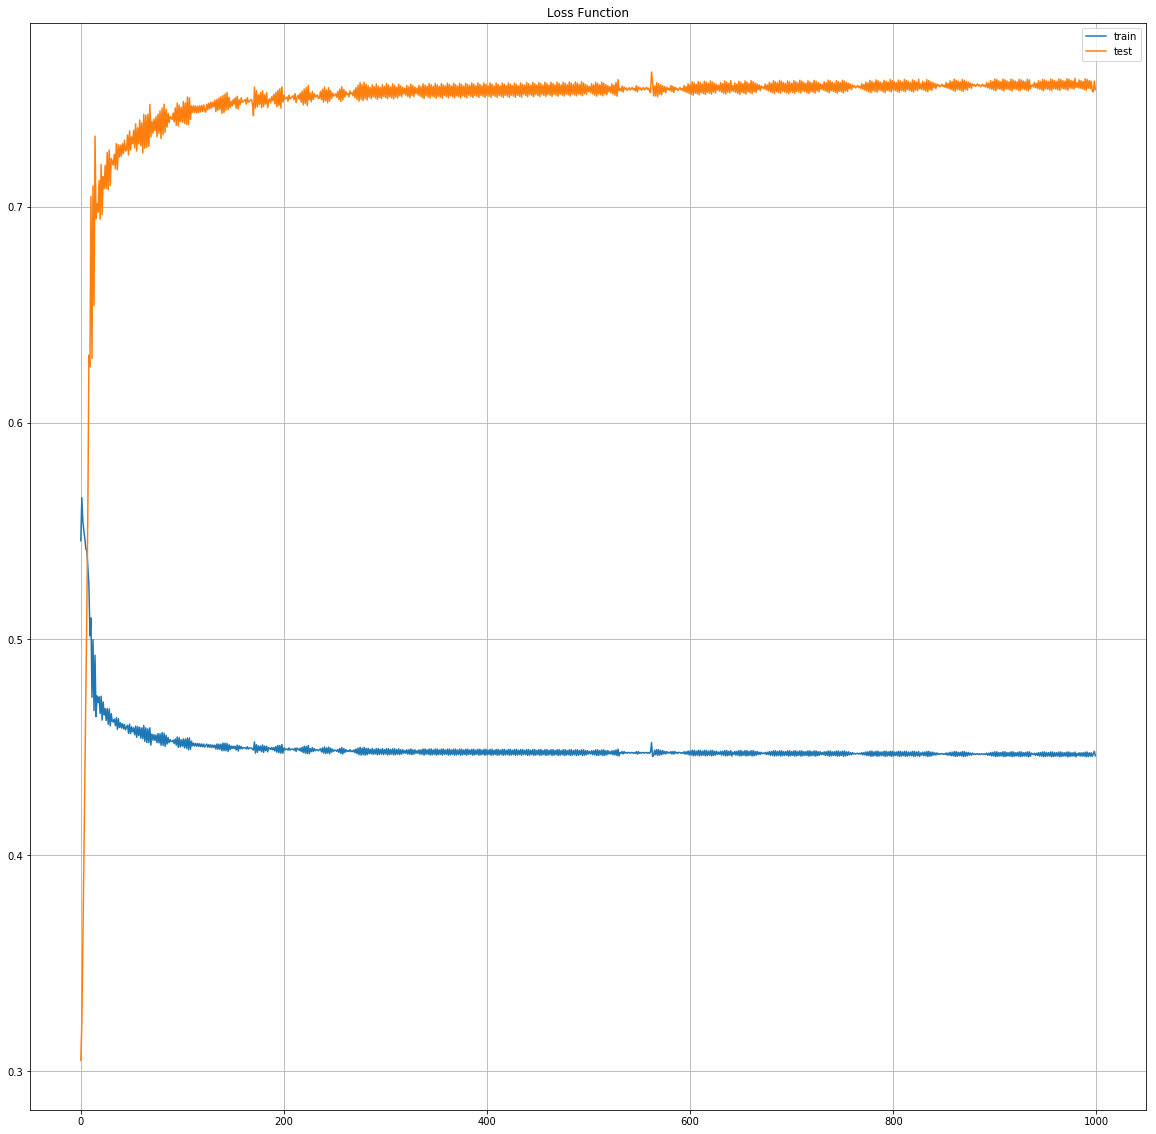

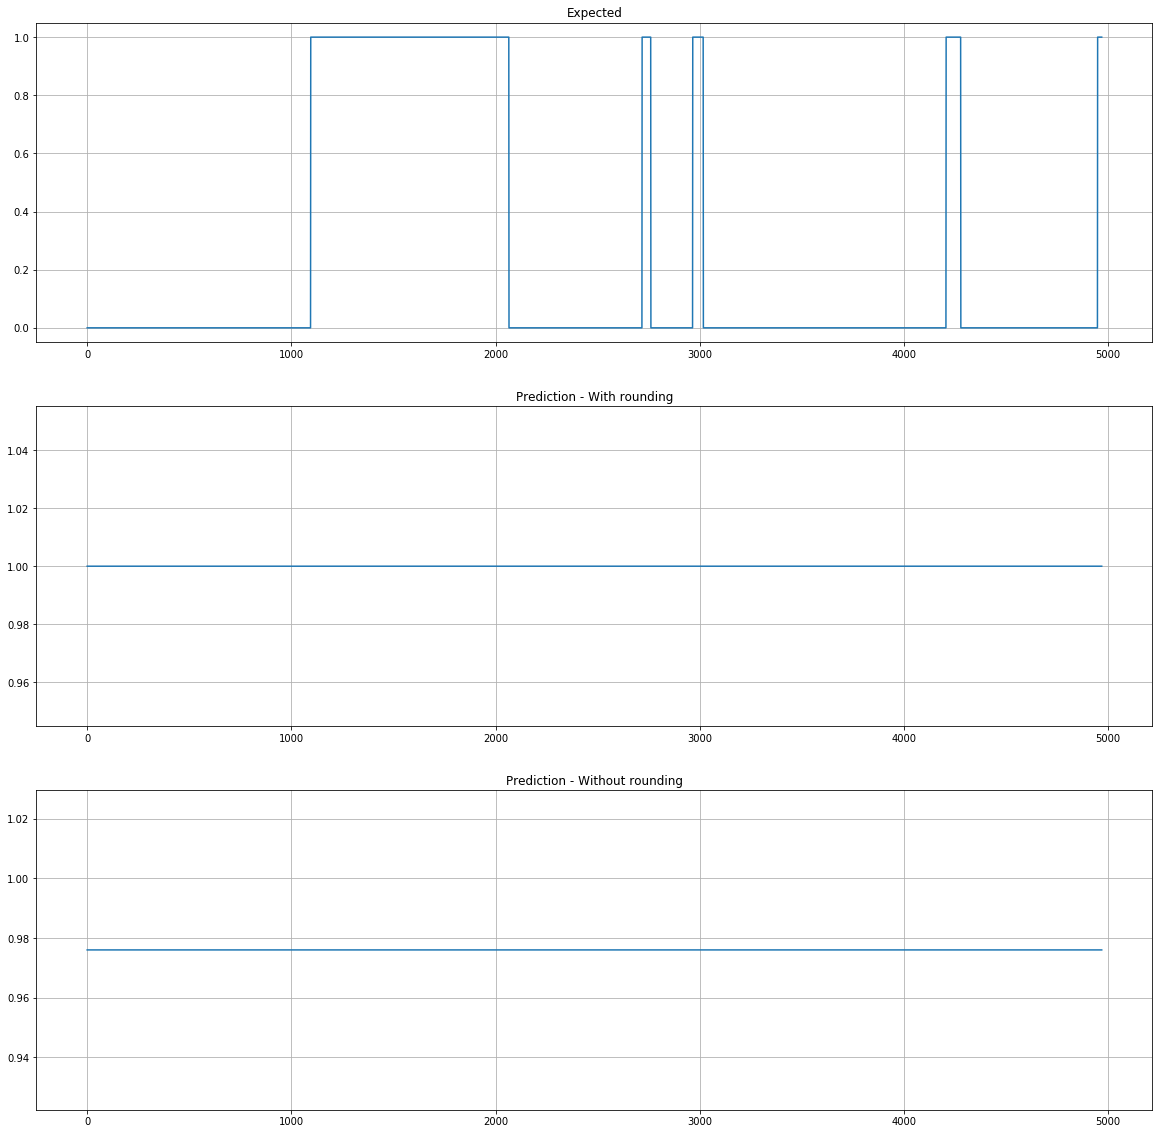

In [50]:
testID = 12
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

lagValue = 10
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=5)

predictor.FitModel(epochCount=1000
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)


TestID:  130
Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 3s - loss: 0.3338 - val_loss: 0.1101
Epoch 2/100
 - 0s - loss: 0.0599 - val_loss: 0.0438
Epoch 3/100
 - 0s - loss: 0.0429 - val_loss: 0.0772
Epoch 4/100
 - 0s - loss: 0.0290 - val_loss: 0.0181
Epoch 5/100
 - 0s - loss: 0.0228 - val_loss: 0.0125
Epoch 6/100
 - 0s - loss: 0.0179 - val_loss: 0.0239
Epoch 7/100
 - 0s - loss: 0.0183 - val_loss: 0.0246
Epoch 8/100
 - 0s - loss: 0.0162 - val_loss: 0.0216
Epoch 9/100
 - 0s - loss: 0.0120 - val_loss: 0.0154
Epoch 10/100
 - 0s - loss: 0.0117 - val_loss: 0.0148
Epoch 11/100
 - 0s - loss: 0.0111 - val_loss: 0.0099
Epoch 12/100
 - 0s - loss: 0.0081 - val_loss: 0.0081
Epoch 13/100
 - 0s - loss: 0.0098 - val_loss: 0.0204
Epoch 14/100
 - 0s - loss: 0.0153 - val_loss: 0.0089
Epoch 15/100
 - 0s - loss: 0.0125 - val_loss: 0.0066
Epoch 16/100
 - 0s - loss: 0.0143 - val_loss: 0.0075
Epoch 17/100
 - 0s - loss: 0.0066 - val_loss: 0.0079
Epoch 18/100
 - 0s - loss: 0.0156 - val_loss: 

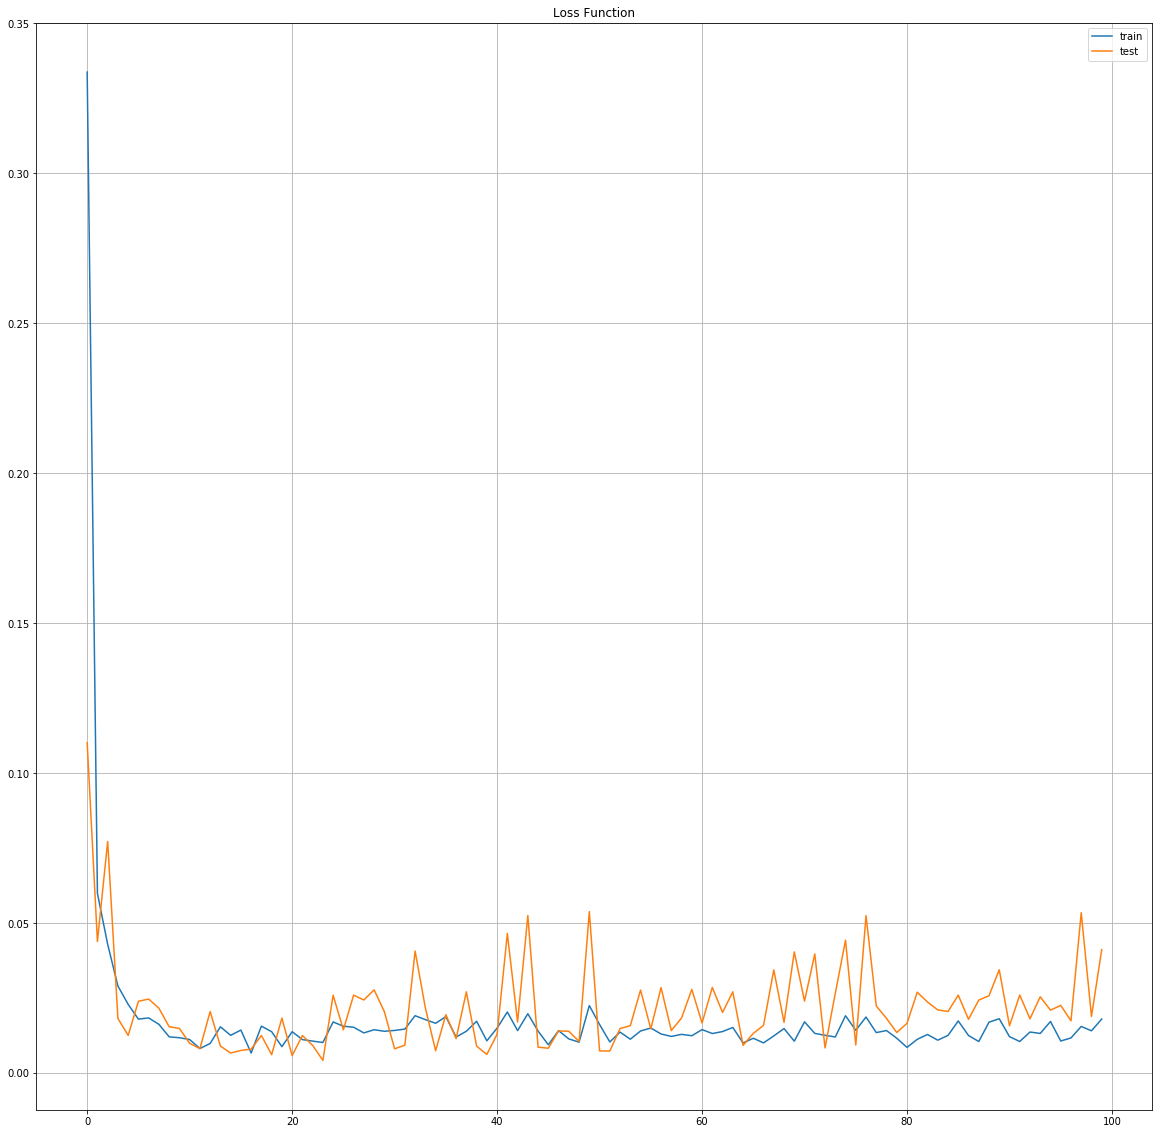

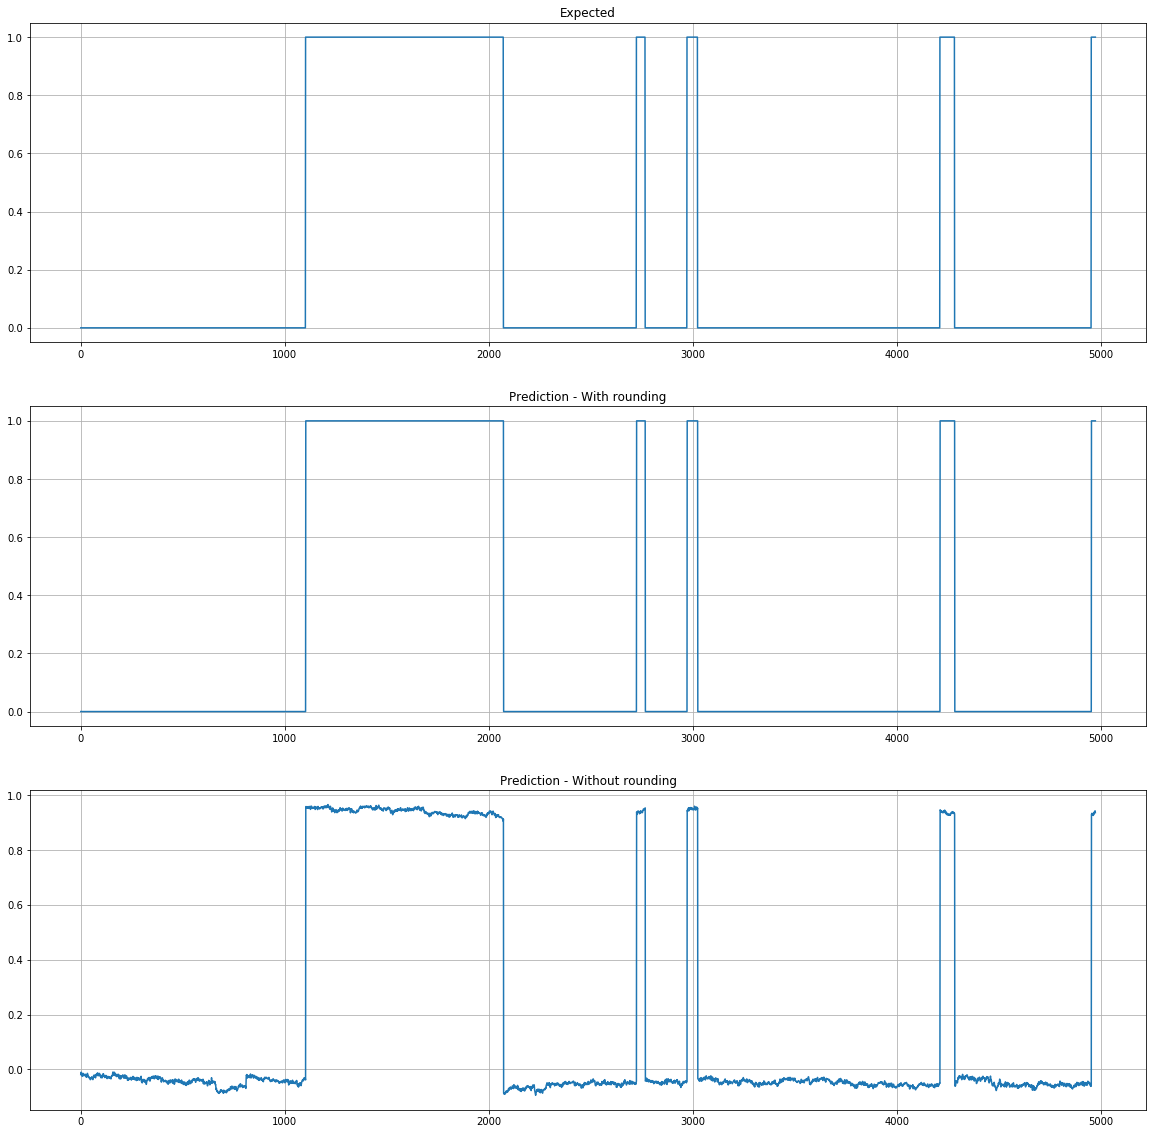

In [60]:
testID = 130
print "TestID: ", testID

resultsFilename = 'TestResults.txt'

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

res = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

lagValue = 1
predictor.CompileModel(lagCount=lagValue
               , neuronCount=50
               , dropOut=0.0
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture'
               , lstmStackCount=1)

predictor.FitModel(epochCount=100
           , batchSize=50
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)
